In [1]:
library(ggplot2)
library("survival")
library("survminer")

Loading required package: ggpubr



In [2]:
datasets = readRDS("/home/ncpsb//new_mnt/Other/jx/web/data/fast_explore/data/Refence_datasets_with_therapy.rds")
datasets_mu = readRDS("/home/ncpsb//new_mnt/Other/jx/web/data/fast_explore/data/Refence_datasets_mutation_with_therapy.rds")
datasets_overview = read.csv("/home/ncpsb//new_mnt/Other/jx/web/data/fast_explore/data/datasets_overview.csv",quote = "")
datasets_names = read.csv("/home/ncpsb//new_mnt/Other/jx/web/data/fast_explore/data/dataset_name.csv",header = F,row.names = 1)

ref_single_OS = readRDS("/home/ncpsb//new_mnt/Other/jx/web/data/fast_explore/result_data/ref_OS_total_survival.rds")
ref_single_PFS = readRDS("/home/ncpsb//new_mnt/Other/jx/web/data/fast_explore/result_data/ref_PFS_total_survival.rds")

In [3]:
colnames(datasets_names) = "Cohort_name"
datasets_overview = cbind(datasets_names,datasets_overview)

In [4]:
datasets_overview$OS = FALSE
datasets_overview$PFS = FALSE
datasets_overview$RECIST = FALSE
datasets_overview$RESPONSE = FALSE
datasets_overview$TMB = FALSE
datasets_overview$RNA = FALSE
for(i in rownames(datasets_overview)){
    if( "OS_TIME" %in% colnames(datasets[[i]]) ){datasets_overview[i,"OS"] = TRUE}
    if( "PFS_TIME" %in% colnames(datasets[[i]]) ){datasets_overview[i,"PFS"] = TRUE}
    if( "RECIST" %in% colnames(datasets[[i]]) ){datasets_overview[i,"RECIST"] = TRUE}
    if( "RESPONSE" %in% colnames(datasets[[i]]) ){datasets_overview[i,"RESPONSE"] = TRUE}
    if( "TMB" %in% colnames(datasets[[i]]) ){datasets_overview[i,"TMB"] = TRUE}
}

datasets_overview[c("dataset2","dataset6","dataset8","dataset10","dataset11","dataset12","dataset13","dataset14","dataset20"),"RNA"] = TRUE

In [6]:
datasets_names$Cohort_name = gsub(pattern = "[0-9]*\\. (.*).*\\(.*","\\1",datasets_names$Cohort_name)
datasets_overview$Cohort_name = datasets_names$Cohort_name

In [7]:
dataset_meta = read.csv("/home/ncpsb/new_mnt/Other/jx/web/data/fast_explore/data/dataset_name.csv",header = F)
dataset_name = dataset_meta$V2
names(dataset_name) = dataset_meta$V1

dataset_name = gsub(pattern = "[0-9]*\\. (.*).*\\(.*","\\1",dataset_name)

In [8]:
datasets_overview

Cohort_name                                     Cohort            
dataset1.1 Samstein et al, Bladder Cancer                  Samstein et al    
dataset1.2 Samstein et al, Breast Cancer                   Samstein et al    
dataset1.3 Samstein et al, Colorectal Cancer               Samstein et al    
dataset1.4 Samstein et al, Esophagogastric Cancer          Samstein et al    
dataset1.5 Samstein et al, Glioma                          Samstein et al    
dataset1.6 Samstein et al, Head and Neck Cancer            Samstein et al    
dataset1.7 Samstein et al, Melanoma                        Samstein et al    
dataset1.8 Samstein et al, NSCLC                           Samstein et al    
dataset1.9 Samstein et al, Renal Cell Carcinoma            Samstein et al    
dataset1   Samstein et al, Pan-cancer                      Samstein et al    
dataset2   Van Allen et al, Melanoma                       Van Allen et al.  
dataset3.1 Miao et al, Bladder Cancer                      Miao et al.       
dataset3.2 Miao et al, Melanoma                            Miao et al.       
dataset3.3 Miao et al, NSCLC                               Miao et al.       
dataset3   Miao et al, Microsatellite-stable solid tumors  Miao et al.       
dataset4   Janjigian et al, Esophagogastric Cancer         Janjigian et al.  
dataset5   Rizvi et al, NSCLC                              Rizvi et al.(2018)
dataset6   Pender, Pan-cancer                              Pender et al.     
dataset7   Hellmann, et al. NSCLC                          Hellmann et al.   
dataset8   Hugo, et al. Melanoma                           Hugo et al.       
dataset9   Jiao, et al, Gastrointestinal cancer            Jiao et al.       
dataset10  Snyder, et al. Melanoma                         Snyder et al.     
dataset11  Mariathasan, et al. Urothelial cancer           Mariathasan et al.
dataset12  Braun, et al. Clear cell renal cell carcinoma   Braun et al.      
dataset13  Motzer, et al, renal cell carcinoma             Motzer et al.     
dataset14  Miao et al, Clear cell renal cell carcinoma     Miao et al.       
dataset15  Zhao et al. Glioblastoma                        Zhao et al.       
dataset16  Rizvi et al.(2015) NSCLC                        Rizvi et al.(2015)
dataset17  Harding et al. Hepatocellular carcinoma         Harding et al.    
dataset18  Anagnostou et al. Melanoma                      Anagnostou et al. 
dataset19  Anagnostou et al. NSCLC                         Anagnostou et al. 
dataset20  Riaz et al. Melanoma                            Riaz et al.       
dataset21  Liu et al. Melanoma                             Liu et al.        
dataset22  Bai et al. Gastric cancer                       Bai et al.        
dataset23  Lu et al.  Neuroendocrine neoplasms             Lu et al.         
dataset24  Wang et al. Gastrointestinal cancer             Wang et al.       
           Cancer_type                        Cohort_size
dataset1.1 Bladder Cancer                      215       
dataset1.2 Breast Cancer                        44       
dataset1.3 Colorectal Cancer                   110       
dataset1.4 Esophagogastric Cancer              126       
dataset1.5 Glioblastoma                        117       
dataset1.6 Head and Neck Cancer                139       
dataset1.7 Melanoma                            320       
dataset1.8 Non-small cell lung cancer          350       
dataset1.9 Kidney Cancer                       151       
dataset1   Pan-cancer                         1661       
dataset2   Melanoma                            110       
dataset3.1 Bladder Cancer                       27       
dataset3.2 Melanoma                            151       
dataset3.3 Non-small cell lung cancer           56       
dataset3   Microsatellite-stable solid tumors  249       
dataset4   Esophagogastric Cancer               40       
dataset5   Non-small cell lung cancer          240       
dataset6   Pan-cancer                           98       
dataset7   Non-small ce

# Figure 1

### OS部分

In [9]:
ref_single_significant_OS = list()

for(i in names(ref_single_OS)){
        tmp_data = ref_single_OS[[i]]
        less_num = floor(unique(rowSums(tmp_data[,c("Patient(Mutation)","Patient(Wildtype)")])) * 0.05) 
        if(less_num <3){less_num = 3}
        tmp_data = tmp_data[ tmp_data$`Patient(Mutation)` >= less_num & tmp_data$`Patient(Wildtype)` >= less_num,]

        if(nrow(tmp_data) != 0){
            tmp_data$dataset = i
            tmp_data$Cancer_type = datasets_overview[i,"Cancer_type"]
            tmp_data$Cancer_type2 = datasets_overview[i,"Cancer_type2"]
            tmp_data$gene = rownames(tmp_data)
        }  
        ref_single_significant_OS[[i]] = tmp_data
}

In [10]:

OS_combind = vector()
for(i in names(ref_single_significant_OS)){
    if(!i %in%  c("dataset5","dataset7","dataset13","dataset16","dataset1","dataset3","dataset6") & nrow(ref_single_significant_OS[[i]]) != 0){
        OS_combind = rbind(OS_combind,ref_single_significant_OS[[i]])
    }
    
}

In [11]:
OS_combind$RS = -log(x = OS_combind$`Wald_test(OS)`,20) * log10(OS_combind$`HR(OS)`)

In [13]:
OS_combind = OS_combind[ OS_combind$gene != "Unknown",]
OS_combind$gene[ OS_combind$gene == '"ANKHD1,ANKHD1-EIF4EBP3"'] = "ANKHD1"
OS_combind$gene[ OS_combind$gene == '"HNRNPCL1,HNRNPCL3,HNRNPCL4"'] = "HNRNPCL1"
OS_combind$gene[ OS_combind$gene == '"OR8U1,OR8U8"'] = "OR8U1"
OS_combind$gene[ OS_combind$gene == '"P2RY11,PPAN-P2RY11"'] = "P2RY11"
OS_combind$gene[ OS_combind$gene == '"POTEB,POTEB2,POTEB3"'] = "POTEB"

In [14]:
RS_matrix_OS = reshape2::dcast(data = OS_combind[,c("dataset","RS","gene")],formula = gene~dataset,value.var = "RS",fill = 0)
rownames(RS_matrix_OS) = RS_matrix_OS$gene
RS_matrix_OS$gene = NULL

In [15]:
for(i in unique(datasets_overview$Cancer_type2)){
    tmp_datasets = rownames(datasets_overview)[ datasets_overview$Cancer_type2 %in% i]
    tmp_datasets = intersect(tmp_datasets,colnames(RS_matrix_OS))
    RS_matrix_OS[[i]] = apply(X = RS_matrix_OS[tmp_datasets],1,function(x){
        meanscore = mean(x[x !=0 ])
        meanscore2 = ifelse(sign(meanscore) == 1, meanscore*sum(x > 0 ),
                          ifelse(sign(meanscore) == -1,meanscore*sum(x < 0 ),0))
        
        return(meanscore2)
    })
    RS_matrix_OS[[i]][is.na(RS_matrix_OS[[i]])] = 0
}

In [16]:
RS_matrix_OS$MultiTumor_ALL_pan = apply(RS_matrix_OS[,unique(datasets_overview$Cancer_type2)],1,function(x){
    meanscore = mean(x)
    ifelse(sign(meanscore) == 1,meanscore*sum(x>0),meanscore*sum(x<0))
})

RS_matrix_OS$MultiTumor_ALL_pan_clean = apply(RS_matrix_OS[,setdiff(unique(datasets_overview$Cancer_type2),c("Pan-cancer","Microsatellite-stable solid tumors"))],1,function(x){
    meanscore = mean(x)
    ifelse(sign(meanscore) == 1,meanscore*sum(x>0),meanscore*sum(x<0))
})

In [17]:
RS_matrix_OS = RS_matrix_OS[ order(RS_matrix_OS$MultiTumor_ALL_pan_clean,decreasing = F),]

In [18]:
P_matrix_OS = reshape2::dcast(data = OS_combind[,c("dataset","Wald_test(OS)","gene")],formula = dataset~gene,value.var = "Wald_test(OS)",fill = 0)
rownames(P_matrix_OS) = P_matrix_OS$dataset
P_matrix_OS$dataset = NULL

m = apply(P_matrix_OS,2,function(x){sum(x != 0 & x < 0.05)})[ rownames(RS_matrix_OS)]
m[is.na(m)] = 0
RS_matrix_OS$Sig.Num = m

### PFS部分

In [19]:
ref_single_significant_PFS = list()

for(i in names(ref_single_PFS)){
        tmp_data = ref_single_PFS[[i]]
        less_num = floor(unique(rowSums(tmp_data[,c("Patient(Mutation)","Patient(Wildtype)")])) * 0.05) 
        if(less_num <3){less_num = 3}
        tmp_data = tmp_data[ tmp_data$`Patient(Mutation)` >= less_num & tmp_data$`Patient(Wildtype)` >= less_num,]
        if(nrow(tmp_data) != 0){
            tmp_data$dataset = i
            tmp_data$Cancer_type = datasets_overview[i,"Cancer_type"]
            tmp_data$Cancer_type2 = datasets_overview[i,"Cancer_type2"]
            tmp_data$gene = rownames(tmp_data)
        }  
        ref_single_significant_PFS[[i]] = tmp_data
}

In [20]:
PFS_combind = vector()
for(i in names(ref_single_significant_PFS)){
    if(!i %in%  c("dataset1.1","dataset1.2","dataset1.3","dataset1.4","dataset1.5","dataset1.6","dataset1.7","dataset1.8","dataset1.9",
                        "dataset1","dataset8","dataset10","dataset11","dataset1","dataset3","dataset6") & nrow(ref_single_significant_PFS[[i]]) != 0){
        PFS_combind = rbind(PFS_combind,ref_single_significant_PFS[[i]])
    }
    
}

In [21]:
PFS_combind$RS = -log(x = PFS_combind$`Wald_test(PFS)`,20) * log10(PFS_combind$`HR(PFS)`)

In [23]:
PFS_combind = PFS_combind[ PFS_combind$gene != "Unknown",]
PFS_combind$gene[ PFS_combind$gene == '"ANKHD1,ANKHD1-EIF4EBP3"'] = "ANKHD1"
PFS_combind$gene[ PFS_combind$gene == '"HNRNPCL1,HNRNPCL3,HNRNPCL4"'] = "HNRNPCL1"
PFS_combind$gene[ PFS_combind$gene == '"OR8U1,OR8U8"'] = "OR8U1"
PFS_combind$gene[ PFS_combind$gene == '"P2RY11,PPAN-P2RY11"'] = "P2RY11"
PFS_combind$gene[ PFS_combind$gene == '"POTEB,POTEB2,POTEB3"'] = "POTEB"

In [24]:
RS_matrix_PFS = reshape2::dcast(data = PFS_combind[,c("dataset","RS","gene")],formula = gene~dataset,value.var = "RS",fill = 0)
rownames(RS_matrix_PFS) = RS_matrix_PFS$gene
RS_matrix_PFS$gene = NULL

In [25]:
for(i in unique(datasets_overview$Cancer_type2)){
    tmp_datasets = rownames(datasets_overview)[ datasets_overview$Cancer_type2 %in% i]
    tmp_datasets = intersect(tmp_datasets,colnames(RS_matrix_PFS))
    RS_matrix_PFS[[i]] = apply(X = RS_matrix_PFS[tmp_datasets],1,function(x){
        meanscore = mean(x[x !=0 ])
        meanscore2 = ifelse(sign(meanscore) == 1, meanscore*sum(x > 0 ),
                          ifelse(sign(meanscore) == -1,meanscore*sum(x < 0 ),0))
        
        return(meanscore2)
    })
    RS_matrix_PFS[[i]][is.na(RS_matrix_PFS[[i]])] = 0
}

In [26]:
RS_matrix_PFS$MultiTumor_ALL_pan = apply(RS_matrix_PFS[,unique(datasets_overview$Cancer_type2)],1,function(x){
    meanscore = mean(x)
    ifelse(sign(meanscore) == 1,meanscore*sum(x>0),meanscore*sum(x<0))
})

RS_matrix_PFS$MultiTumor_ALL_pan_clean = apply(RS_matrix_PFS[,setdiff(unique(datasets_overview$Cancer_type2),c("Pan-cancer","Microsatellite-stable solid tumors"))],1,function(x){
    meanscore = mean(x)
    ifelse(sign(meanscore) == 1,meanscore*sum(x>0),meanscore*sum(x<0))
})

In [27]:
RS_matrix_PFS = RS_matrix_PFS[ order(RS_matrix_PFS$MultiTumor_ALL_pan_clean,decreasing = F),]

In [28]:
P_matrix_PFS = reshape2::dcast(data = PFS_combind[,c("dataset","Wald_test(PFS)","gene")],formula = dataset~gene,value.var = "Wald_test(PFS)",fill = 0)
rownames(P_matrix_PFS) = P_matrix_PFS$dataset
P_matrix_PFS$dataset = NULL

m = apply(P_matrix_PFS,2,function(x){sum(x != 0 & x < 0.05)})[ rownames(RS_matrix_PFS)]
m[is.na(m)] = 0
RS_matrix_PFS$Sig.Num = m

### 合并

In [29]:
A = RS_matrix_OS[unique(intersect(rownames(RS_matrix_OS),rownames(RS_matrix_PFS))),"MultiTumor_ALL_pan_clean"]
B = RS_matrix_PFS[unique(intersect(rownames(RS_matrix_OS),rownames(RS_matrix_PFS))),"MultiTumor_ALL_pan_clean"]
A[is.na(A)] = 0
B[is.na(B)] = 0

In [30]:
C = A+B
names(C) = unique(intersect(rownames(RS_matrix_OS),rownames(RS_matrix_PFS)))

In [31]:
C = sort(C)

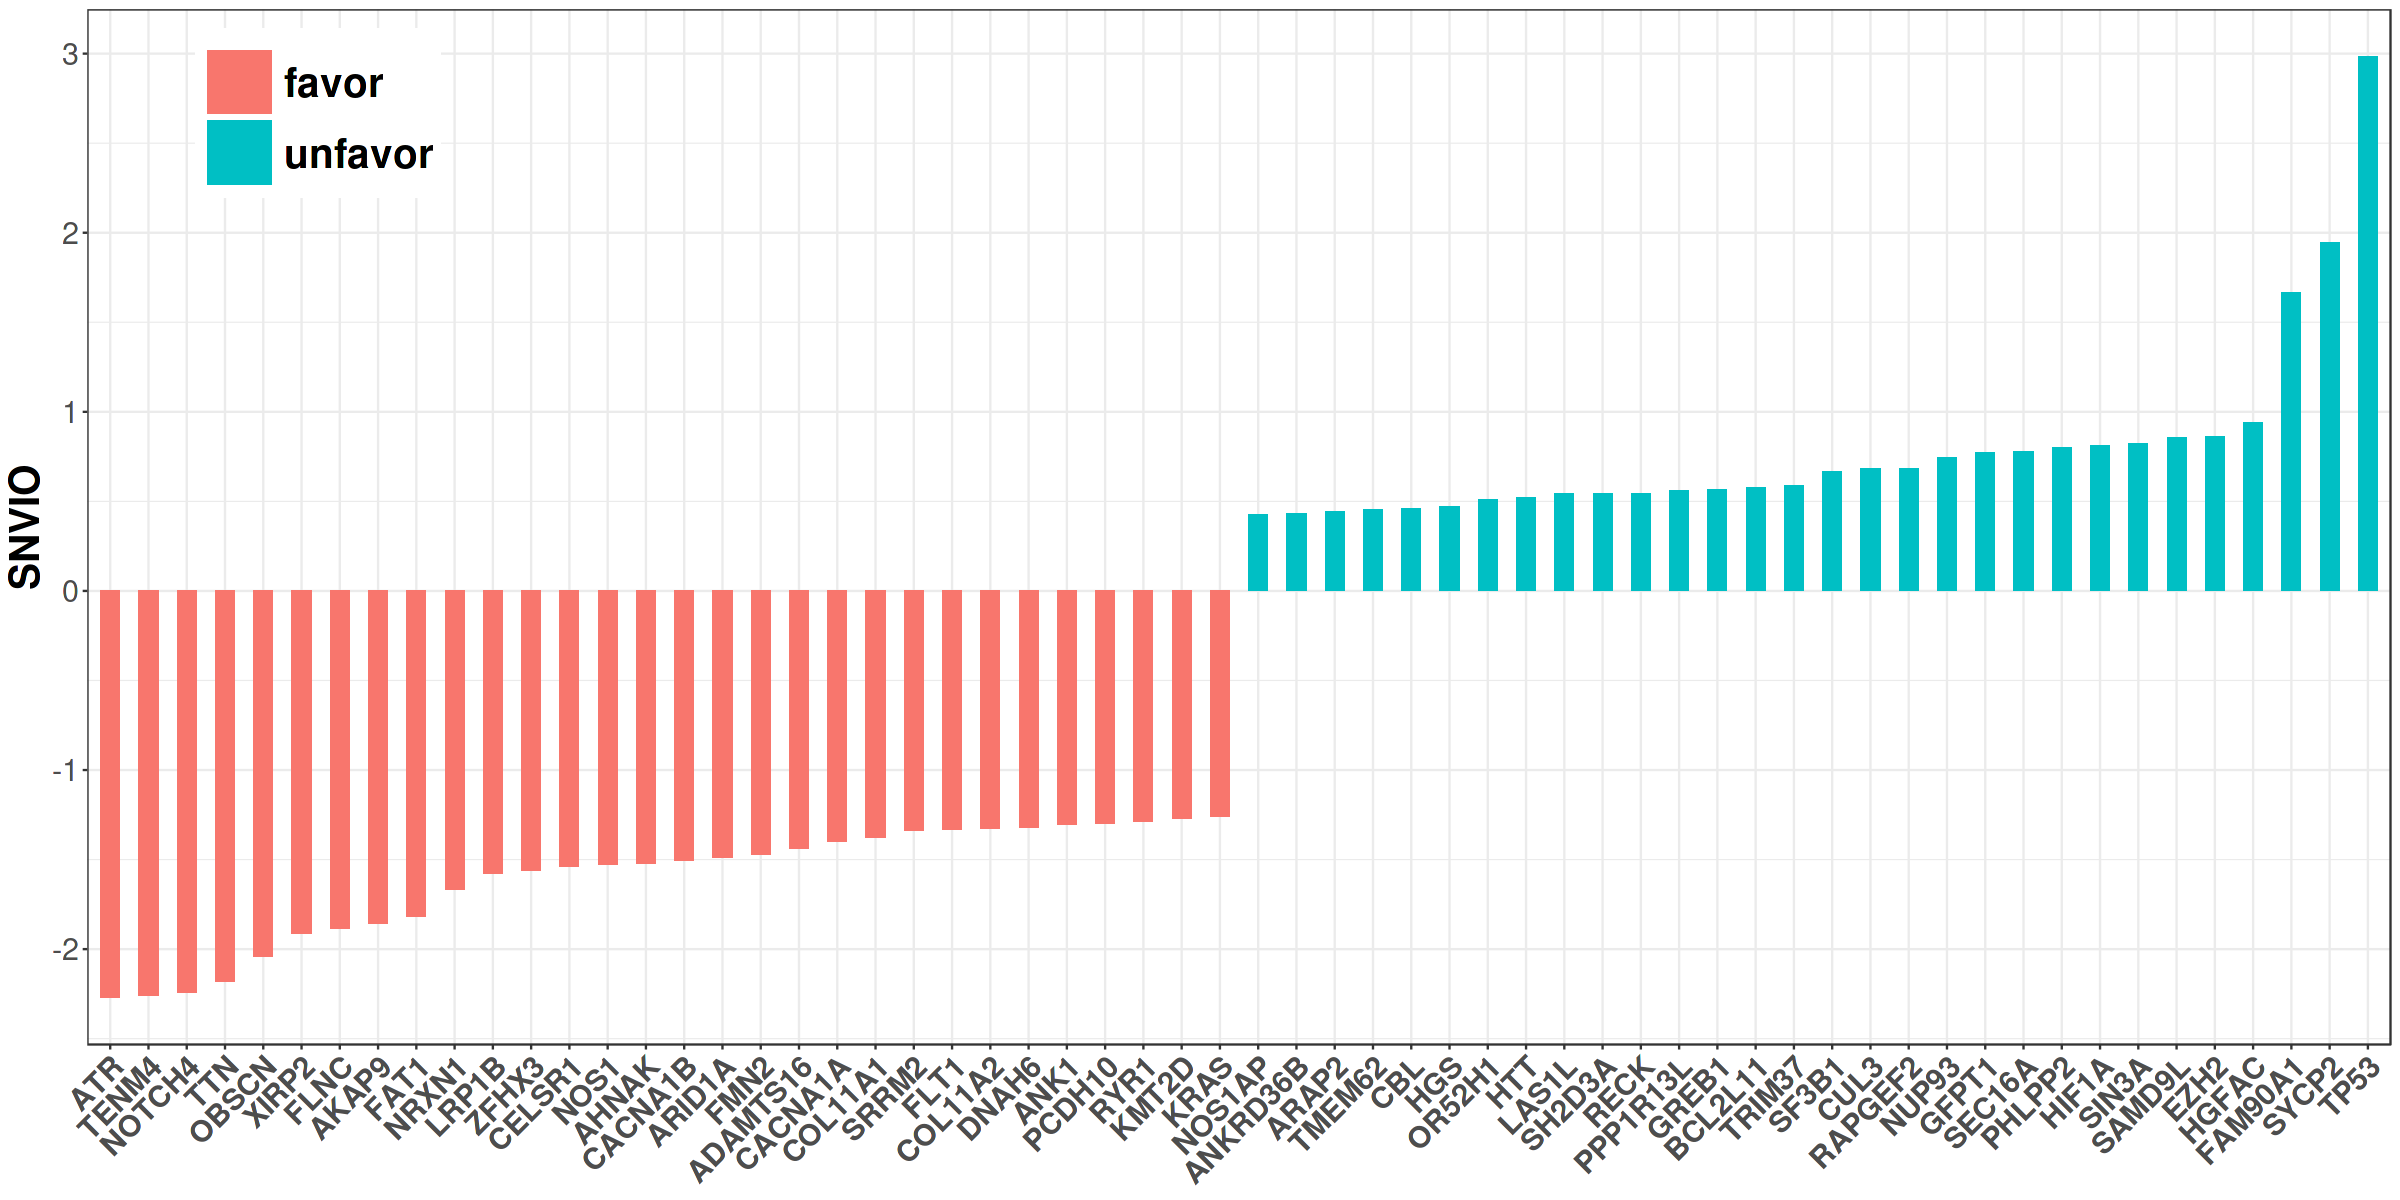

In [32]:
tmp_matrix = data.frame(MultiTumor_ALL_pan_clean=C[c(names(C)[1:30],names(C)[(length(C)-29):length(C)])],
                        gene = c(names(C)[1:30],names(C)[(length(C)-29):length(C)]),
                       color = c(rep("favor",30),rep("unfavor",30))
                       )
tmp_matrix$gene = factor(tmp_matrix$gene,levels = tmp_matrix$gene)
options(repr.plot.height = 10, repr.plot.width = 20)
ggplot(data = tmp_matrix)+
    geom_bar(aes(x = gene,y = MultiTumor_ALL_pan_clean,fill=color),stat = "identity",width=0.5)+
    theme_bw()+guides(fill=guide_legend(override.aes = list(size=15)))+
    theme(axis.text.x = element_text(angle = 45,hjust = 1,size=18,face = "bold"),
          axis.title.y = element_text(size = 24,face="bold"),
          axis.text.y = element_text(size = 18),
          legend.title = element_blank(),
          legend.text = element_text(size = 24,face = "bold"),
          axis.title.x = element_blank(),
          legend.position = c(0.1,0.9))+
    ylab("SNVIO")

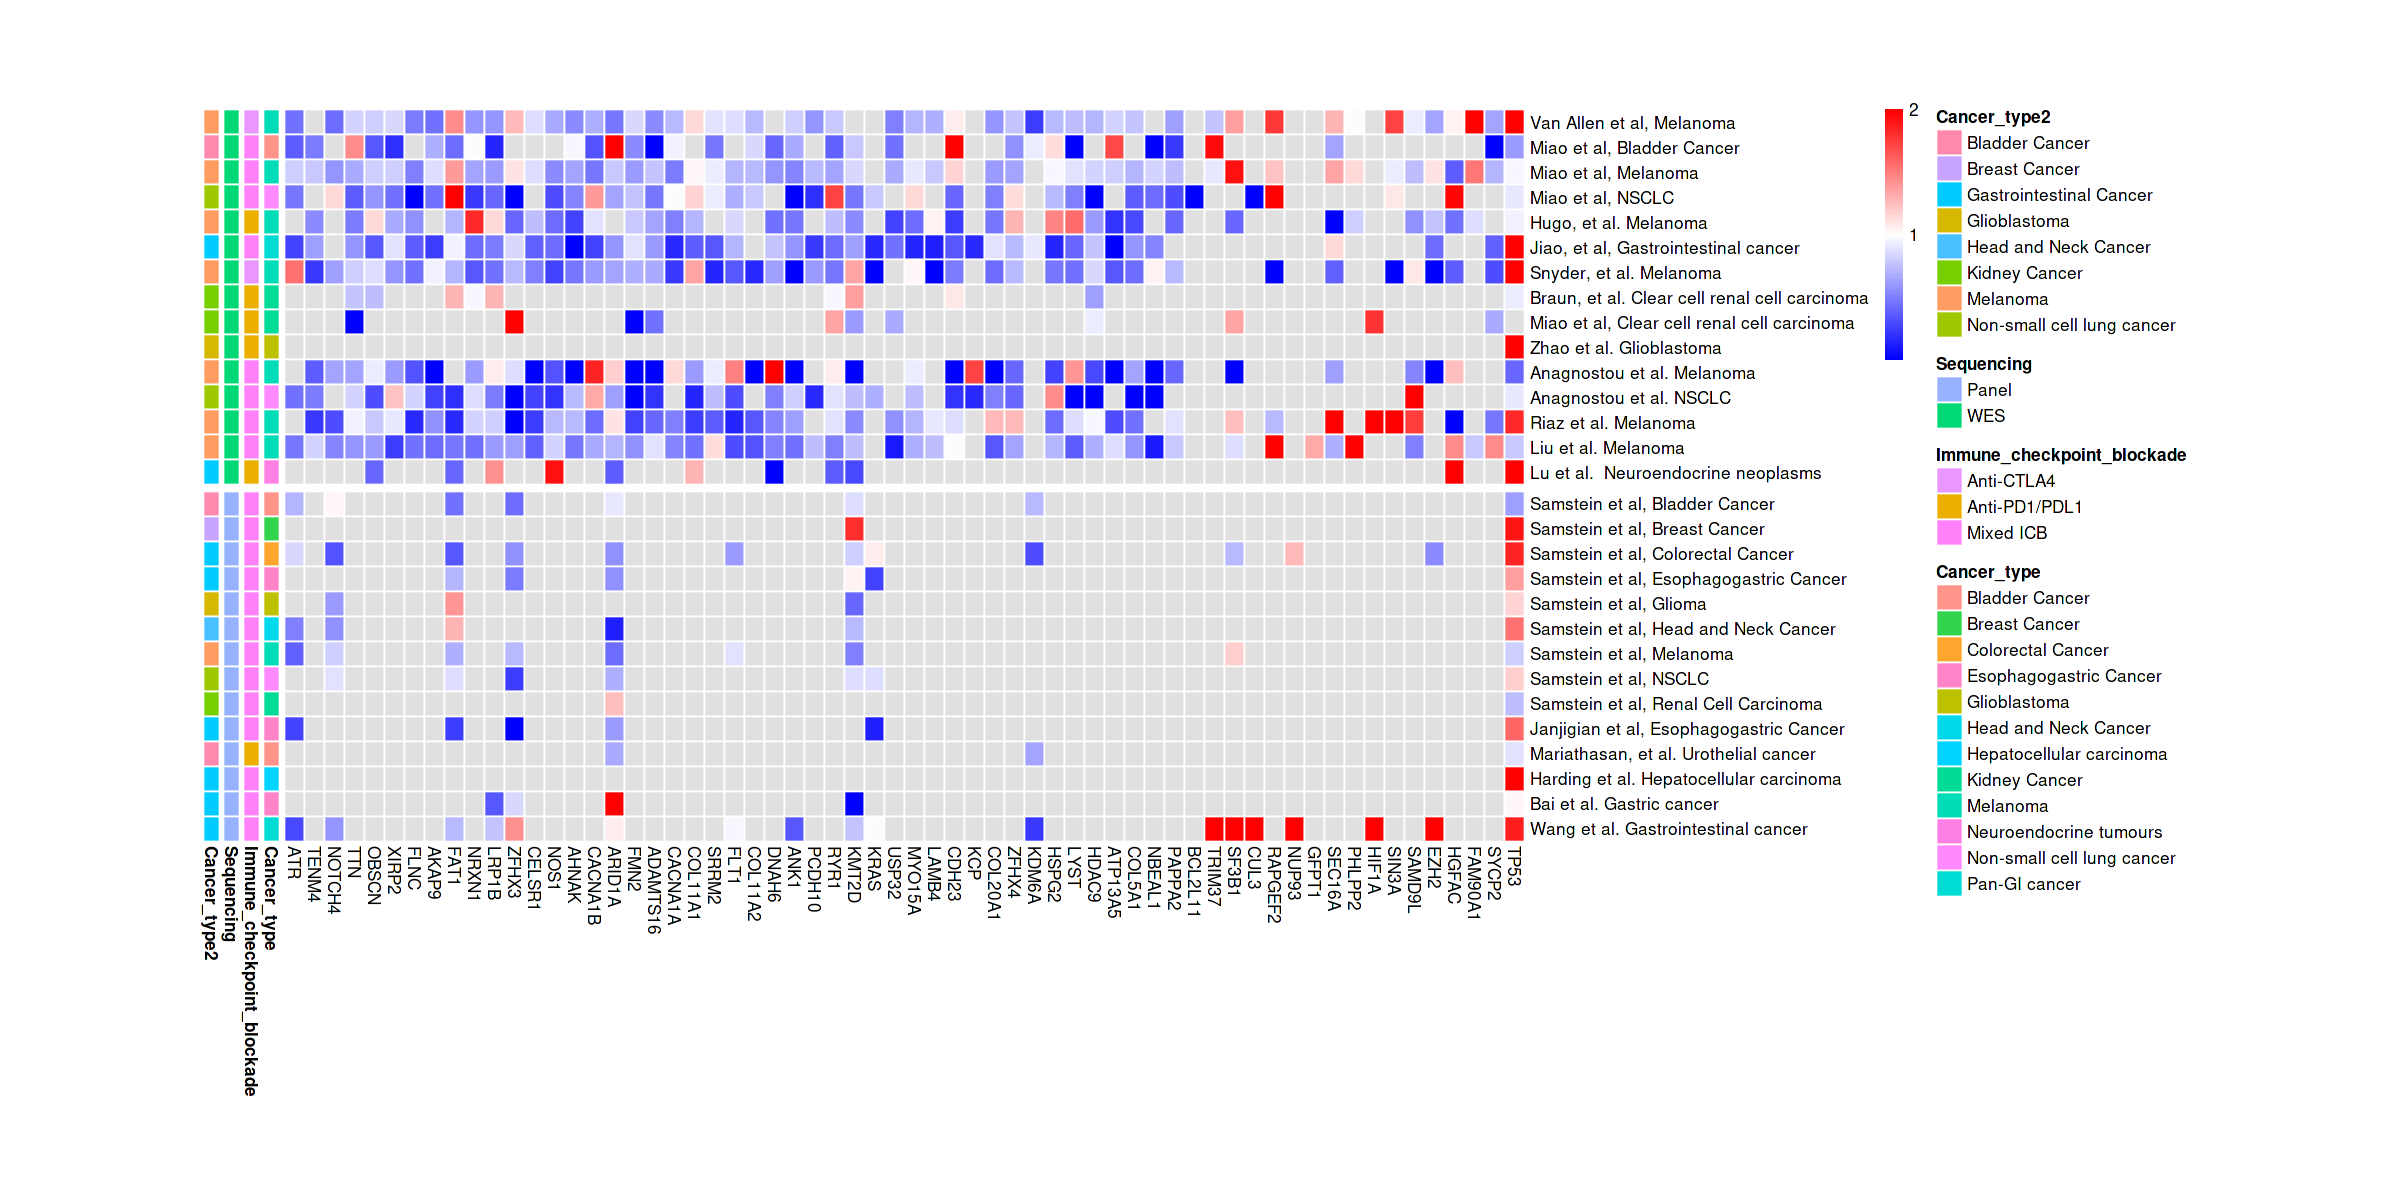

In [33]:
n1 = 45
n2 = 17
n2 = n2-1
options(repr.plot.height = 10, repr.plot.width = 20)
HR_matrix = reshape2::dcast(data = OS_combind[,c("dataset","HR(OS)","gene")],formula = dataset~gene,value.var = "HR(OS)")
rownames(HR_matrix) = HR_matrix$dataset
HR_matrix$dataset = NULL

HR_matrix = HR_matrix[ rownames(datasets_names)[ rownames(datasets_names) %in% rownames(HR_matrix)],]
rownames(HR_matrix) = datasets_names[rownames(HR_matrix),]

meta = datasets_overview[ datasets_overview$Cohort_name %in% rownames(HR_matrix),]
rownames(meta) = meta$Cohort_name
meta = meta[,c("Cancer_type","Immune_checkpoint_blockade","Sequencing","Cancer_type2")]

hm = HR_matrix[ ,c(names(C)[1:n1],names(C)[(length(C)-n2):length(C)])]
hm[ hm > 2 ] = 2
hm = hm[order(meta$Sequencing,decreasing = T),]
# hm = hm[ rowSums(is.na(hm)) != ncol(hm),]

pheatmap::pheatmap(hm,cellwidth = 12,cellheight = 15,
                   border_color = "white",
                   annotation_row = meta,
                   gaps_row = 15,
#                    annotation_colors = list("Sequencing"=c("Panel" = "blue","WES"="red"),
#                                             "Immune_checkpoint_blockade"=Immune_checkpoint_blockade,
#                                             "Cancer_type" = Cancer_type),
                   cluster_rows = F,
                   cluster_cols = F,
                   color = colorRampPalette(colors = c("blue","white","red"))(100),
                   legend_breaks = c(2,1,0),
                   legend_labels = c(2,1,0),
                   na_col = "grey88"
                   )

rn = rownames(hm)
sg = colnames(hm)

### oncoprint

In [39]:
library(circlize)
plot_complexheatmap2 = function(C,OS_combind,PFS_combind,favor_num,unfavor_num){
    
    library(ComplexHeatmap)

    n1 = favor_num
    n2 = unfavor_num
    n2 = n2-1
    
    cancer_type =  c("Melanoma","Gastrointestinal Cancer","Non-small cell lung cancer","Kidney Cancer","Bladder Cancer",
                     "Glioblastoma","Head and Neck Cancer","Breast Cancer")

#     total_meta = vector()
    total_hm = list()

    HR_matrix = reshape2::dcast(data = OS_combind[,c("dataset","HR(OS)","gene")],formula = dataset~gene,value.var = "HR(OS)")
    rownames(HR_matrix) = HR_matrix$dataset
    HR_matrix$dataset = NULL
    HR_matrix = HR_matrix[ rownames(datasets_names)[ rownames(datasets_names) %in% rownames(HR_matrix)],]
    rownames(HR_matrix) = datasets_names[rownames(HR_matrix),] 
    hm = HR_matrix[ ,c(names(C)[1:n1],names(C)[(length(C)-n2):length(C)])]
    hm[ hm > 2 ] = 2
    total_hm[["OS"]] = hm


    HR_matrix = reshape2::dcast(data = PFS_combind[,c("dataset","HR(PFS)","gene")],formula = dataset~gene,value.var = "HR(PFS)")
    rownames(HR_matrix) = HR_matrix$dataset
    HR_matrix$dataset = NULL
    HR_matrix = HR_matrix[ rownames(datasets_names)[ rownames(datasets_names) %in% rownames(HR_matrix)],]
    rownames(HR_matrix) = datasets_names[rownames(HR_matrix),] 
    hm = HR_matrix[ ,c(names(C)[1:n1],names(C)[(length(C)-n2):length(C)])]
    hm[ hm > 2 ] = 2
    total_hm[["PFS"]] = hm

    total_hm$OS[setdiff(rownames(total_hm$PFS),rownames(total_hm$OS)),] = NA
    total_hm$PFS[setdiff(rownames(total_hm$OS),rownames(total_hm$PFS)),] = NA
    
    share_dn = intersect(rownames(total_hm$OS),rownames(total_hm$PFS))
    rownames(datasets_overview) = datasets_overview$Cohort_name
    newmeta = datasets_overview[share_dn,]
    newmeta = newmeta[ order(newmeta$Sequencing,decreasing = T),]
    newmeta$Cancer_type2 = factor(newmeta$Cancer_type2 ,levels = cancer_type)
    newmeta = newmeta[ order(newmeta$Cancer_type2),]
    
    total_hm$OS = total_hm$OS[ newmeta$Cohort_name,]
    total_hm$PFS = total_hm$PFS[ newmeta$Cohort_name,]
    
    total_hm$OS = as.matrix(total_hm$OS)
    total_hm$PFS = as.matrix(total_hm$PFS)
    
    HR_values = total_hm
    survival_type = total_hm
    
    survival_type$OS[! is.na(survival_type$OS ) ] = 1
    survival_type$OS[ is.na(survival_type$OS ) ] = 0
    survival_type$PFS[! is.na(survival_type$PFS ) ] = 1
    survival_type$PFS[ is.na(survival_type$PFS ) ] = 0
    
    color_mapping <- colorRamp2(c(0,1,2), c("blue","white", "red"))
    
    a = colorRampPalette(RColorBrewer::brewer.pal(9,"Set1"))(8)
    names(a) = cancer_type

    row_ha1 = HeatmapAnnotation(
            simple_anno_size = unit(3, "cm"),
            show_legend = F,
            which = "row",
            CancerType=newmeta[,"Cancer_type2"],
            Sequencing=factor(newmeta[,"Sequencing"],levels = c("WES","Panel")),
            col = list(CancerType = a,Sequencing = c("WES"="indianred1","Panel"="skyblue")),
            show_annotation_name = F,
            border = TRUE,
            gap = unit(2, "mm")

    )
    
    l1 =  Legend(
            labels = cancer_type,
            title = "Cancer Type",
            legend_gp = gpar(fill = a,fontsize = 20),
            title_gp = gpar(col = "black", fontsize = 28,fontface="bold"),
            labels_gp = gpar(col = "black", fontsize = 24,fontface="bold")
        )
    l2 = Legend(
                labels = c("WES","Panel"),
                title = "Sequencing",
                legend_gp = gpar(fill = c("indianred1","skyblue"),fontsize = 20),
                title_gp = gpar(col = "black", fontsize = 28,fontface="bold"),
                labels_gp = gpar(col = "black", fontsize = 24,fontface="bold")
            )
    l3 <- Legend(at = c(0, 1, 2),
                 title_position = "leftcenter-rot",
                 legend_height = unit(10, "cm"),
                 labels = c("0", "1", "2"),
                 title = "HR",
                 col_fun = colorRamp2(c(0, 1, 2), c("blue", "white", "red")),
                 direction = "vertical",
                 legend_gp = gpar(fill = c("indianred1","skyblue"),fontsize = 20),
                 title_gp = gpar(col = "black", fontsize = 28,fontface="bold"),
                 labels_gp = gpar(col = "black", fontsize = 24,fontface="bold")
                )
    n = 1
    y_all = 0
    i = 0
    j = 0
    total_n = (favor_num+unfavor_num) * length(share_dn)
    ht = oncoPrint(survival_type,show_pct = F,
                   width = (favor_num+unfavor_num)*unit(10, "mm"),
                   height = length(share_dn)*unit(10, "mm"),
                  show_column_names = T,
                  row_order = newmeta$Cohort_name,
                  column_order = c(names(C)[1:n1],names(C)[(length(C)-n2):length(C)]),
                  row_names_side = "left",
                  column_names_side = "bottom",
                  row_names_gp = gpar(fontface = "bold",cex = 2),
                  column_names_gp = gpar(fontface = "bold",cex = 1.8),
                  heatmap_legend_param = list(title = "Clinical Outcome",
                                              direction = "horizontal",
                                              legend_height = unit(10, "cm"),
                                              title_gp = gpar(fontsize = 28,fontface = "bold"),
                                              labels_gp = gpar(fontsize = 24,fontface = "bold"),
                                              title_position = "leftcenter"
                                             ),
                  top_annotation = HeatmapAnnotation(SNV_Score = anno_barplot(C[c(1:n1,(length(C)-n2):length(C))],
                                                                                 axis_param = list(side = "left",
                                                                                                   gp = gpar(fontsize = 22,fontface = "bold")),
                                                                                  gp = gpar(fill = c(colorRampPalette(rev(RColorBrewer::brewer.pal(n =9,name = "Blues")))(n1),
                                                                                                     colorRampPalette(RColorBrewer::brewer.pal(n =9,name = "Reds"))(n2+1)
                                                                                                    )
                                                                                           )
                                                                         ),
                                                        annotation_name_gp = gpar(fontsize = 22,fontface = "bold"),
                                                        height = unit(10, "cm"),
                                                        show_annotation_name = T),
                  right_annotation = row_ha1,
                   row_split = newmeta[,"Cancer_type2"],
                  row_title = NULL,
                  row_gap = unit(2, "mm"),
    #               row_names_max_width = max_text_width(rownames(hm),gp = gpar(fontsize = 12)),
    #               column_names_max_height = max_text_width(colnames(hm),gp = gpar(cex = 22)),
    #               rect_gp = gpar(col = "white", lwd = 5),
                  alter_fun = list(
                                    background = function(x, y, w, h) {

                                        if(n <= 4 | n > total_n+4){ # 
                                                                        y_all <<- 0
                                                                        i <<- 0
                                                                        j <<- 0
                                        }else if(!y %in% y_all){
                                                                        y_all <<- y
                                                                        j <<- 1
                                                                        i <<- i + 1
                                        }else if(y %in% y_all){
                                                                        j <<- j + 1
                                                                        if(j > (favor_num+unfavor_num)){
                                                                            j<<- 1
                                                                            i<<- i + 1
                                                                        }
                                        }         
                                        n <<- n + 1

                                        grid.polygon(
                                                unit.c(x - 0.5*w, x - 0.5*w, x + 0.5*w), 
                                                unit.c(y - 0.5*h, y + 0.5*h, y - 0.5*h),
                                                gp = gpar(fill = "grey88", col = "white")
                                        )
                                        grid.polygon(
                                                unit.c(x + 0.5*w, x + 0.5*w, x - 0.5*w), 
                                                unit.c(y + 0.5*h, y - 0.5*h, y + 0.5*h),
                                                gp = gpar(fill = "grey88", col = "white")
                                        )

                                    },
                                    OS = function(x, y, w, h) {

                                        if(i!=0&j!=0&!y_all %in% 0){
                                            v = ifelse(is.na(HR_values$OS[i,j]),"grey88",color_mapping(HR_values$OS[i,j]))
                                            grid.polygon(
                                                unit.c(x - 0.5*w, x - 0.5*w, x + 0.5*w), 
                                                unit.c(y - 0.5*h, y + 0.5*h, y - 0.5*h),
                                                gp = gpar(fill = v, col = "white")
                                            )
                                        }else{ # 
                                              grid.polygon(
                                                unit.c(x - 0.5*w, x - 0.5*w, x + 0.5*w), 
                                                unit.c(y - 0.5*h, y + 0.5*h, y - 0.5*h),
                                                gp = gpar(fill = "black", col = "white"))
                                          }
                                    },
                                    PFS = function(x, y, w, h) {

                                        if(i!=0&j!=0&!y_all %in% 0){
                                            v = ifelse(is.na(HR_values$PFS[i,j]),"grey88",color_mapping(HR_values$PFS[i,j]))
                                            grid.polygon(
                                                unit.c(x + 0.5*w, x + 0.5*w, x - 0.5*w), 
                                                unit.c(y + 0.5*h, y - 0.5*h, y + 0.5*h),
                                                gp = gpar(fill =v, col = "white"))
                                        }else{ # 
                                              grid.polygon(
                                                unit.c(x + 0.5*w, x + 0.5*w, x - 0.5*w), 
                                                unit.c(y + 0.5*h, y - 0.5*h, y + 0.5*h),
                                                gp = gpar(fill ="black", col = "white"))
                                          }

                                    }
                  )


                  )

    options(repr.plot.height = 20, repr.plot.width = 35)
    ht_opt$HEATMAP_LEGEND_PADDING = unit(1, "cm")
    ht_opt$ANNOTATION_LEGEND_PADDING = unit(2, "cm")
    draw(ht,
         heatmap_legend_side ="bottom",
         annotation_legend_side = "right",
         annotation_legend_list = packLegend(l1,l2,l3,row_gap = unit(2.5,"cm"),gap = unit(2.5,"cm"))
            )
    
    
}

circlize version 0.4.14
CRAN page: https://cran.r-project.org/package=circlize
Github page: https://github.com/jokergoo/circlize
Documentation: https://jokergoo.github.io/circlize_book/book/

If you use it in published research, please cite:
Gu, Z. circlize implements and enhances circular visualization
  in R. Bioinformatics 2014.

This message can be suppressed by:
  suppressPackageStartupMessages(library(circlize))




All mutation types: OS, PFS.

Colors are not defined for: OS, PFS. They won't be shown in the
barplots.



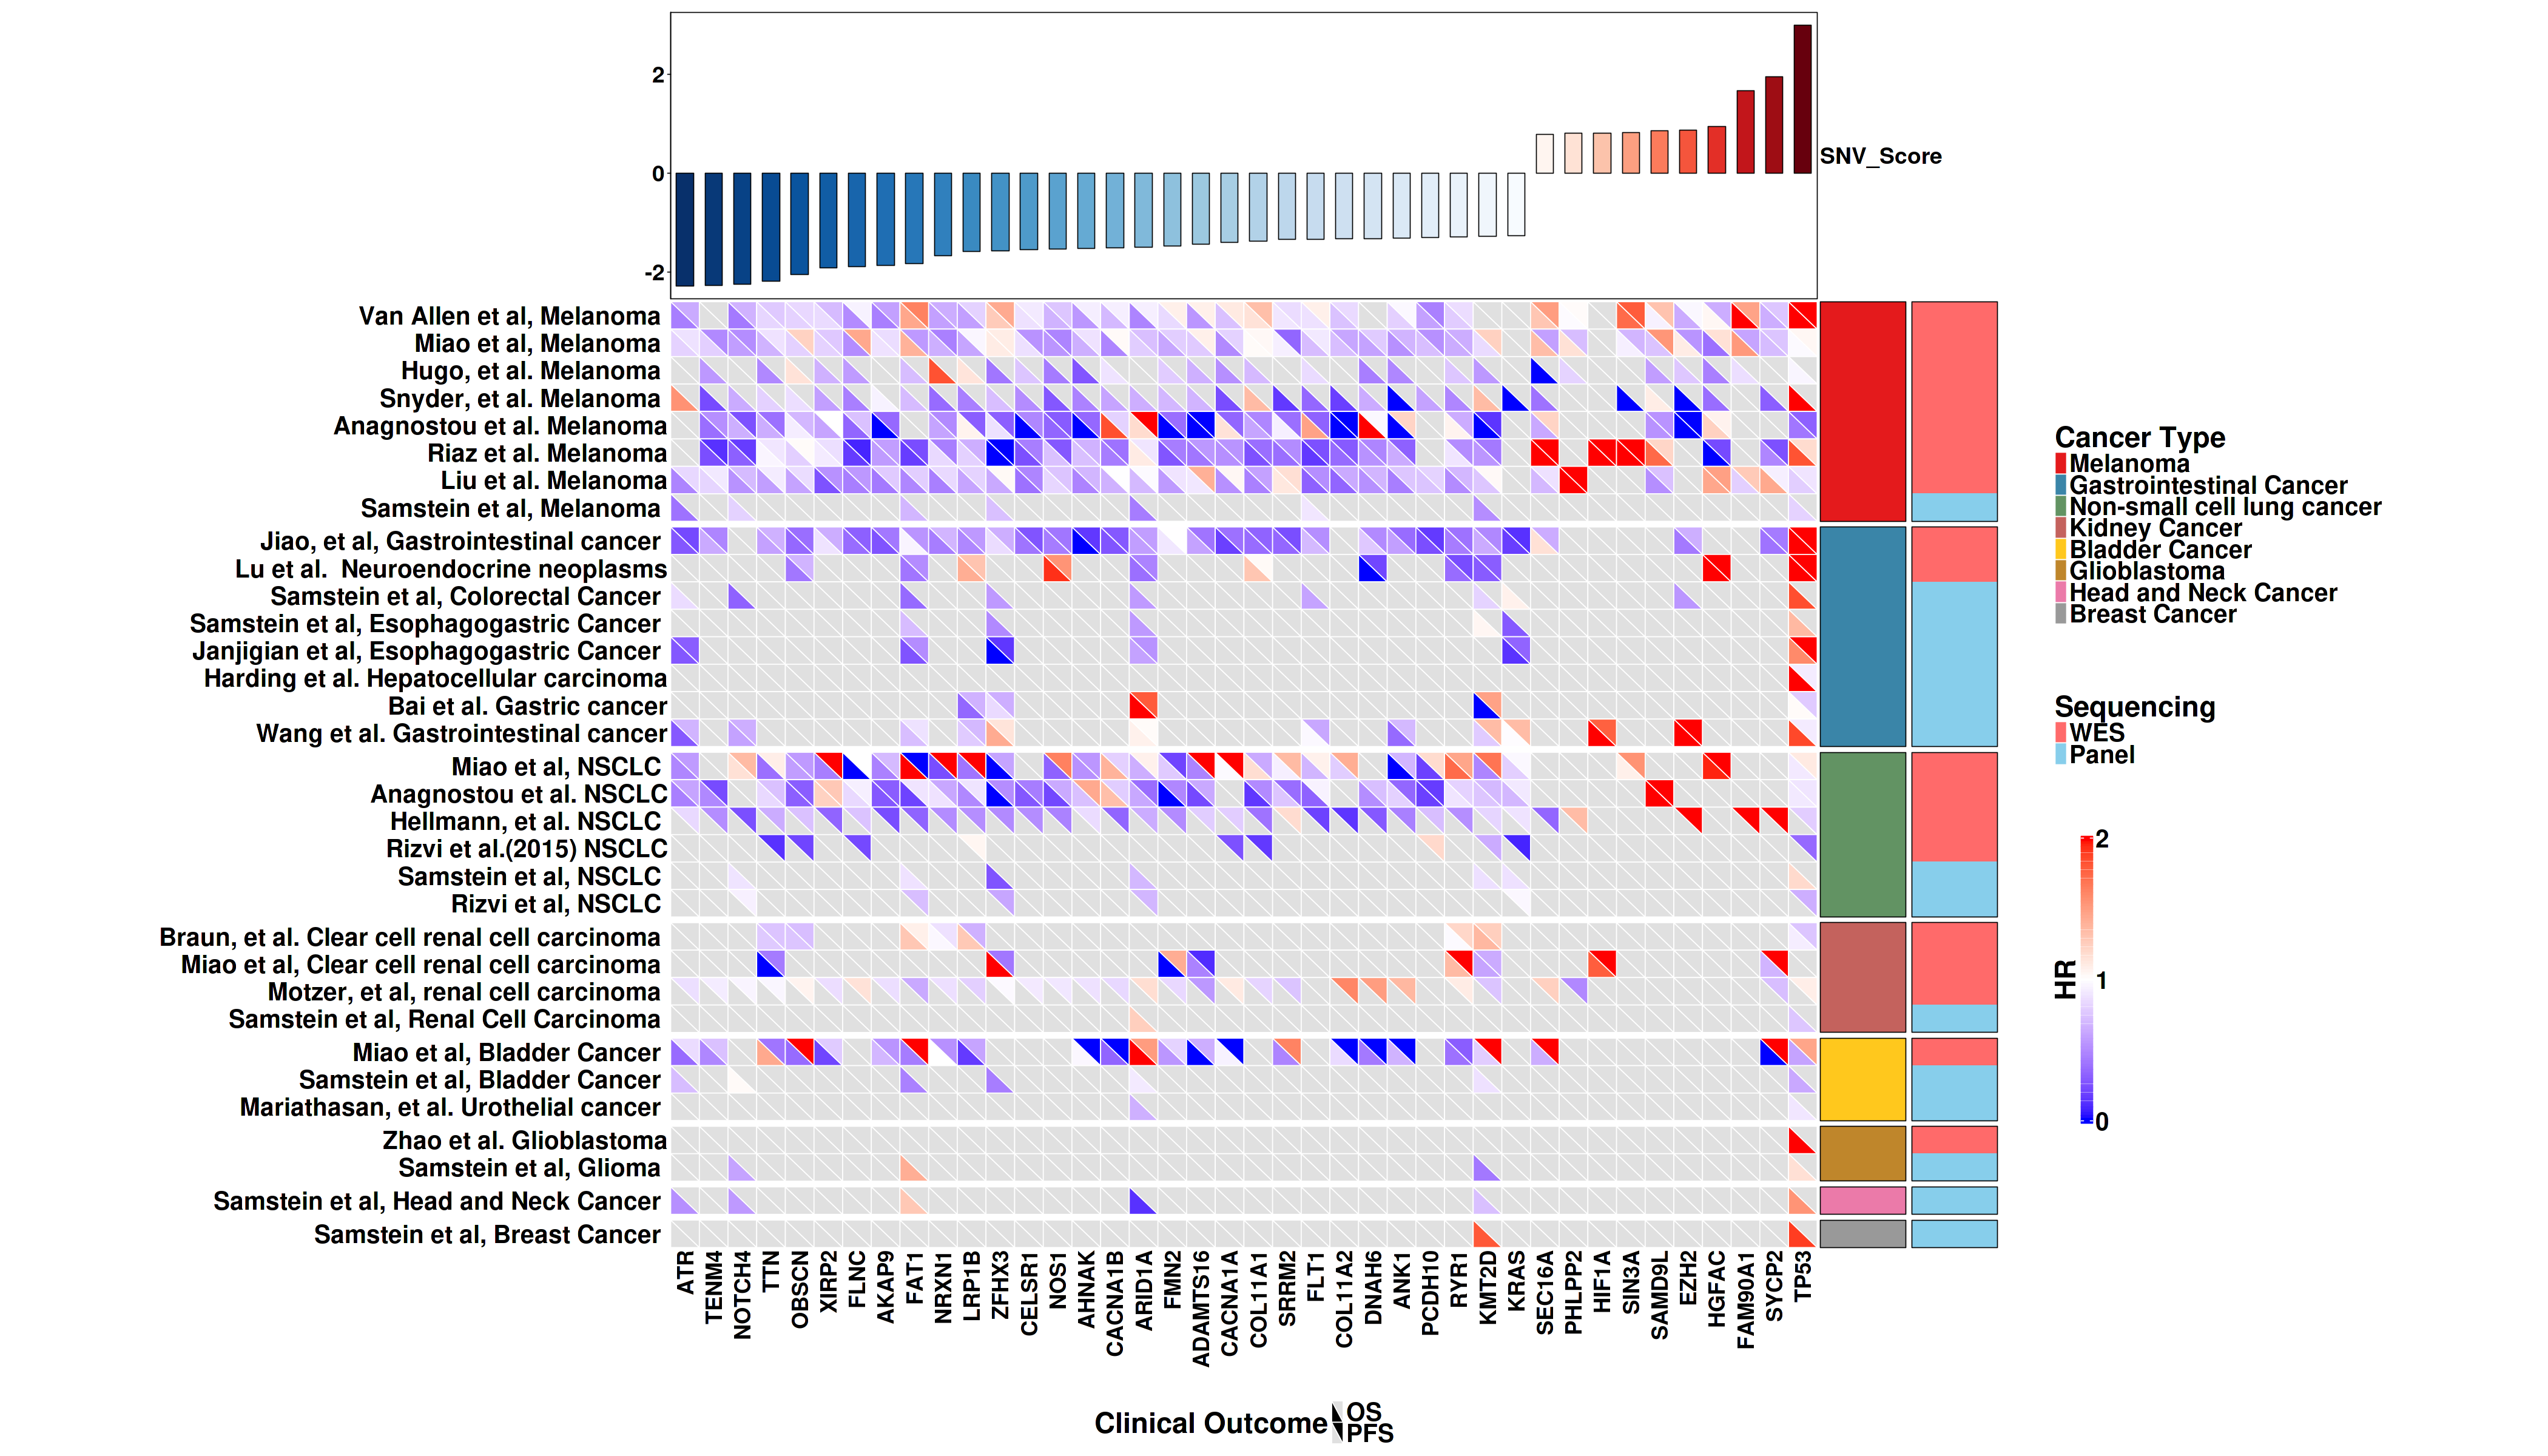

In [40]:
plot_complexheatmap2(C = C,OS_combind = OS_combind,PFS_combind = PFS_combind,favor_num = 30,unfavor_num = 10)

In [41]:
pdf("Artical_Figure2/Figure 1/SNVSCORE_single_gene1.pdf",width = 35,height = 20)
plot_complexheatmap2(C = C,OS_combind = OS_combind,PFS_combind = PFS_combind,favor_num = 30,unfavor_num = 10)
dev.off()

All mutation types: OS, PFS.

Colors are not defined for: OS, PFS. They won't be shown in the
barplots.



png 
  2

### mutation frequencies

In [42]:
ref_single_significant2 = list()

for(i in names(ref_single_OS)){
        tmp2 = ref_single_OS[[i]]
#         less_num = floor(unique(rowSums(tmp2[,c("Patient(Mutation)","Patient(Wildtype)")])) * 0.05) # 两个组至少包含的患者数是总人数的5%
#         if(less_num <3){less_num = 3}
#         tmp2 = tmp2[ tmp2$`Patient(Mutation)` >= less_num & tmp2$`Patient(Wildtype)` >= less_num,]
#         tmp = tmp[ tmp$`Log_rank_test(OS)`<0.05 | tmp$`Wald_test(OS)` < 0.05,]  # 筛选P值小于0.05
        if(nrow(tmp2) != 0){
            tmp2$dataset = i
            tmp2$Cancer_type = datasets_overview[i,"Cancer_type"]
            tmp2$Cancer_type2 = datasets_overview[i,"Cancer_type2"]
            tmp2$gene = rownames(tmp2)
        }  
        ref_single_significant2[[i]] = tmp2
}

tmp2 = vector()
for(i in names(ref_single_significant2)){
    if(!i %in%  c("dataset1","dataset3","dataset6") & nrow(ref_single_significant2[[i]]) != 0){
        tmp2 = rbind(tmp2,ref_single_significant2[[i]])
    }
    
}

In [43]:
pat_mut_num = reshape2::dcast(tmp2,dataset~gene,value.var = "Patient(Mutation)",fill = 0)
rownames(pat_mut_num) = pat_mut_num$dataset
pat_mut_num$dataset = NULL
pat_mut_num = pat_mut_num[rownames(datasets_overview)[ rownames(datasets_overview) %in% rownames(pat_mut_num)],]
pat_mut_num$Cohort_size = datasets_overview[rownames(pat_mut_num),"Cohort_size"]
pat_mut_num$Sequencing = datasets_overview[rownames(pat_mut_num),"Sequencing"]
rownames(pat_mut_num) = datasets_overview[rownames(pat_mut_num),"Cohort_name"]

Loading required package: viridisLite



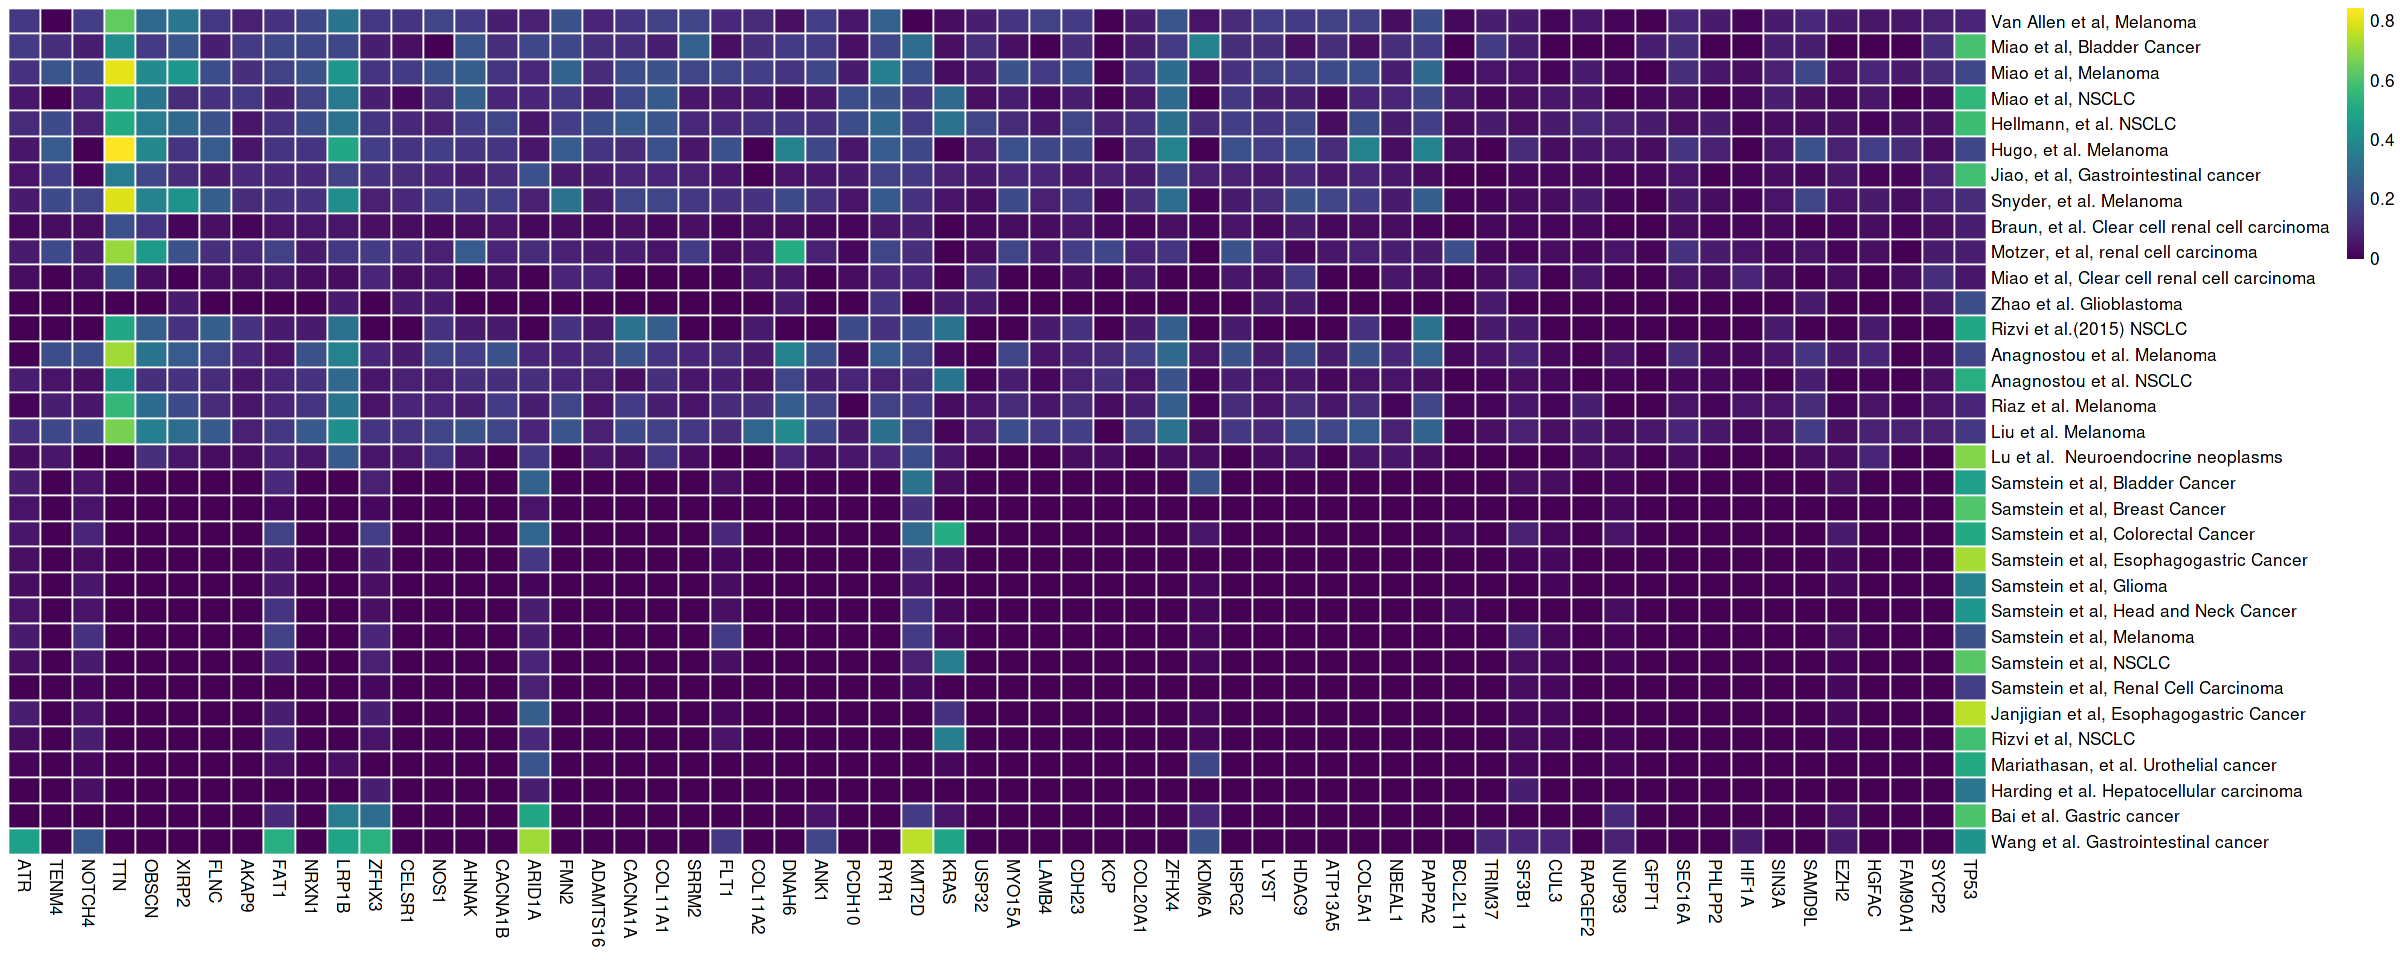

In [44]:
pat_mut_pro = pat_mut_num[,1:(ncol(pat_mut_num)-2)]/pat_mut_num$Cohort_size
pat_mut_pro = pat_mut_pro[,c(names(C)[1:45],names(C)[(length(C)-16):length(C)])]

meta = datasets_overview[ datasets_overview$Cohort_name %in% rownames(pat_mut_pro),]
rownames(meta) = meta$Cohort_name
meta = meta[,c("Cancer_type","Immune_checkpoint_blockade","Sequencing","Cancer_type2")]

meta = meta[ order(meta$Sequencing,decreasing = T),]
pat_mut_pro = pat_mut_pro[ rownames(meta),]
pat_mut_num = pat_mut_num[ rownames(meta),]

library(viridis )
options(repr.plot.height = 8, repr.plot.width = 20)
pheatmap::pheatmap(pat_mut_pro,
                   cluster_rows = F,
                   cluster_cols = F,
                   color = viridis::viridis(100),
#                    cellwidth = 16,
#                    cellheight = 20,
                   border_color = "white")

In [48]:
library(circlize)
cancer_type =  c("Melanoma","Gastrointestinal Cancer","Non-small cell lung cancer","Kidney Cancer","Bladder Cancer",
                     "Glioblastoma","Head and Neck Cancer",
                     "Breast Cancer")
a = colorRampPalette(RColorBrewer::brewer.pal(9,"Set1"))(8)
names(a) = cancer_type

row_ha1 = HeatmapAnnotation(
        show_legend = F,
        which = "row",
        CancerType=meta[rownames(pat_mut_pro),"Cancer_type2"],
        col = list(CancerType = a),
        show_annotation_name = F,
        annotation_legend_param  = list(
                                            title = "Cancer_Type", legend_height = unit(8, "cm"),
                                            title_gp = gpar(fontsize = 18,fontface = "bold"),
                                            labels_gp = gpar(fontsize = 18,fontface = "bold"),
                                            title_position = "leftcenter-rot"
                                       )

    )
row_ha2 = HeatmapAnnotation(
        show_legend = F,
        which = "row",
        Sequencing=factor(meta[rownames(pat_mut_pro),"Sequencing"],levels = c("WES","Panel")),
        col = list(Sequencing = c("WES"="indianred1","Panel"="skyblue")),
        show_annotation_name = F,
        annotation_legend_param  = list(
                                            title = "Sequencing", legend_height = unit(8, "cm"),
                                            title_gp = gpar(fontsize = 18,fontface = "bold"),
                                            labels_gp = gpar(fontsize = 18,fontface = "bold"),
                                            title_position = "leftcenter-rot"
                                       )

    )


ht = Heatmap(as.matrix(pat_mut_pro),width = ncol(pat_mut_pro)*unit(9, "mm"),height = nrow(pat_mut_pro)*unit(10, "mm"),
#              heatmap_height = unit(20,"cm"),
#              heatmap_width = unit(50,"cm"),
             row_names_side = "left",
             column_names_side = "bottom",
#              row_split = factor(meta[rownames(hm),"Cancer_type2"],levels = c("Melanoma","Gastrointestinal Cancer","Urothelial Cancer","Renal Cell Carcinoma",
#                                                                                 "Non-small cell lung cancer","Glioblastoma","Hepatocellular carcinoma","Head and Neck Cancer","Breast Cancer","Pan-cancer")),
             row_split = factor(meta[rownames(pat_mut_pro),"Cancer_type2"],levels = c("Melanoma","Gastrointestinal Cancer","Non-small cell lung cancer","Kidney Cancer","Bladder Cancer",
                                                                                "Glioblastoma","Head and Neck Cancer","Breast Cancer")),
#              row_split = factor(pat_mut_num$Sequencing,levels = c("WES","Panel")),
             row_title = NULL,
             row_gap = unit(5, "mm"),
             row_names_max_width = max_text_width(rownames(hm),gp = gpar(fontsize = 12)),
             column_names_max_height = max_text_width(colnames(hm),gp = gpar(cex = 22)),
             row_names_gp = gpar(fontface = "bold",cex = 2),
             column_names_gp = gpar(fontface = "bold",cex = 1.8),
        heatmap_legend_param = list(title = "Proportion of positive patients", legend_height = unit(8, "cm"),
                                    title_gp = gpar(fontsize = 28,fontface = "bold"),
                                    labels_gp = gpar(fontsize = 24,fontface = "bold"),
                                    title_position = "leftcenter-rot",
                                    at = c( 0,0.5, 1)),
        col = colorRamp2(c( 0,0.25,0.5,0.75, 1), c("#FFFFE5","#C7E9B4", "#41B6C4","#225EA8","#081D58")),
        cluster_rows = F,
        cluster_columns = F,
        rect_gp = gpar(col = "grey88", lwd = 5),
        layer_fun = function(j, i, x, y, w, h, fill){
            v = pindex(as.matrix(pat_mut_num[,colnames(pat_mut_pro)]), i, j)
            grid.text(v,x, y,gp = gpar(fontsize = 12,col="black"))
        }
       )

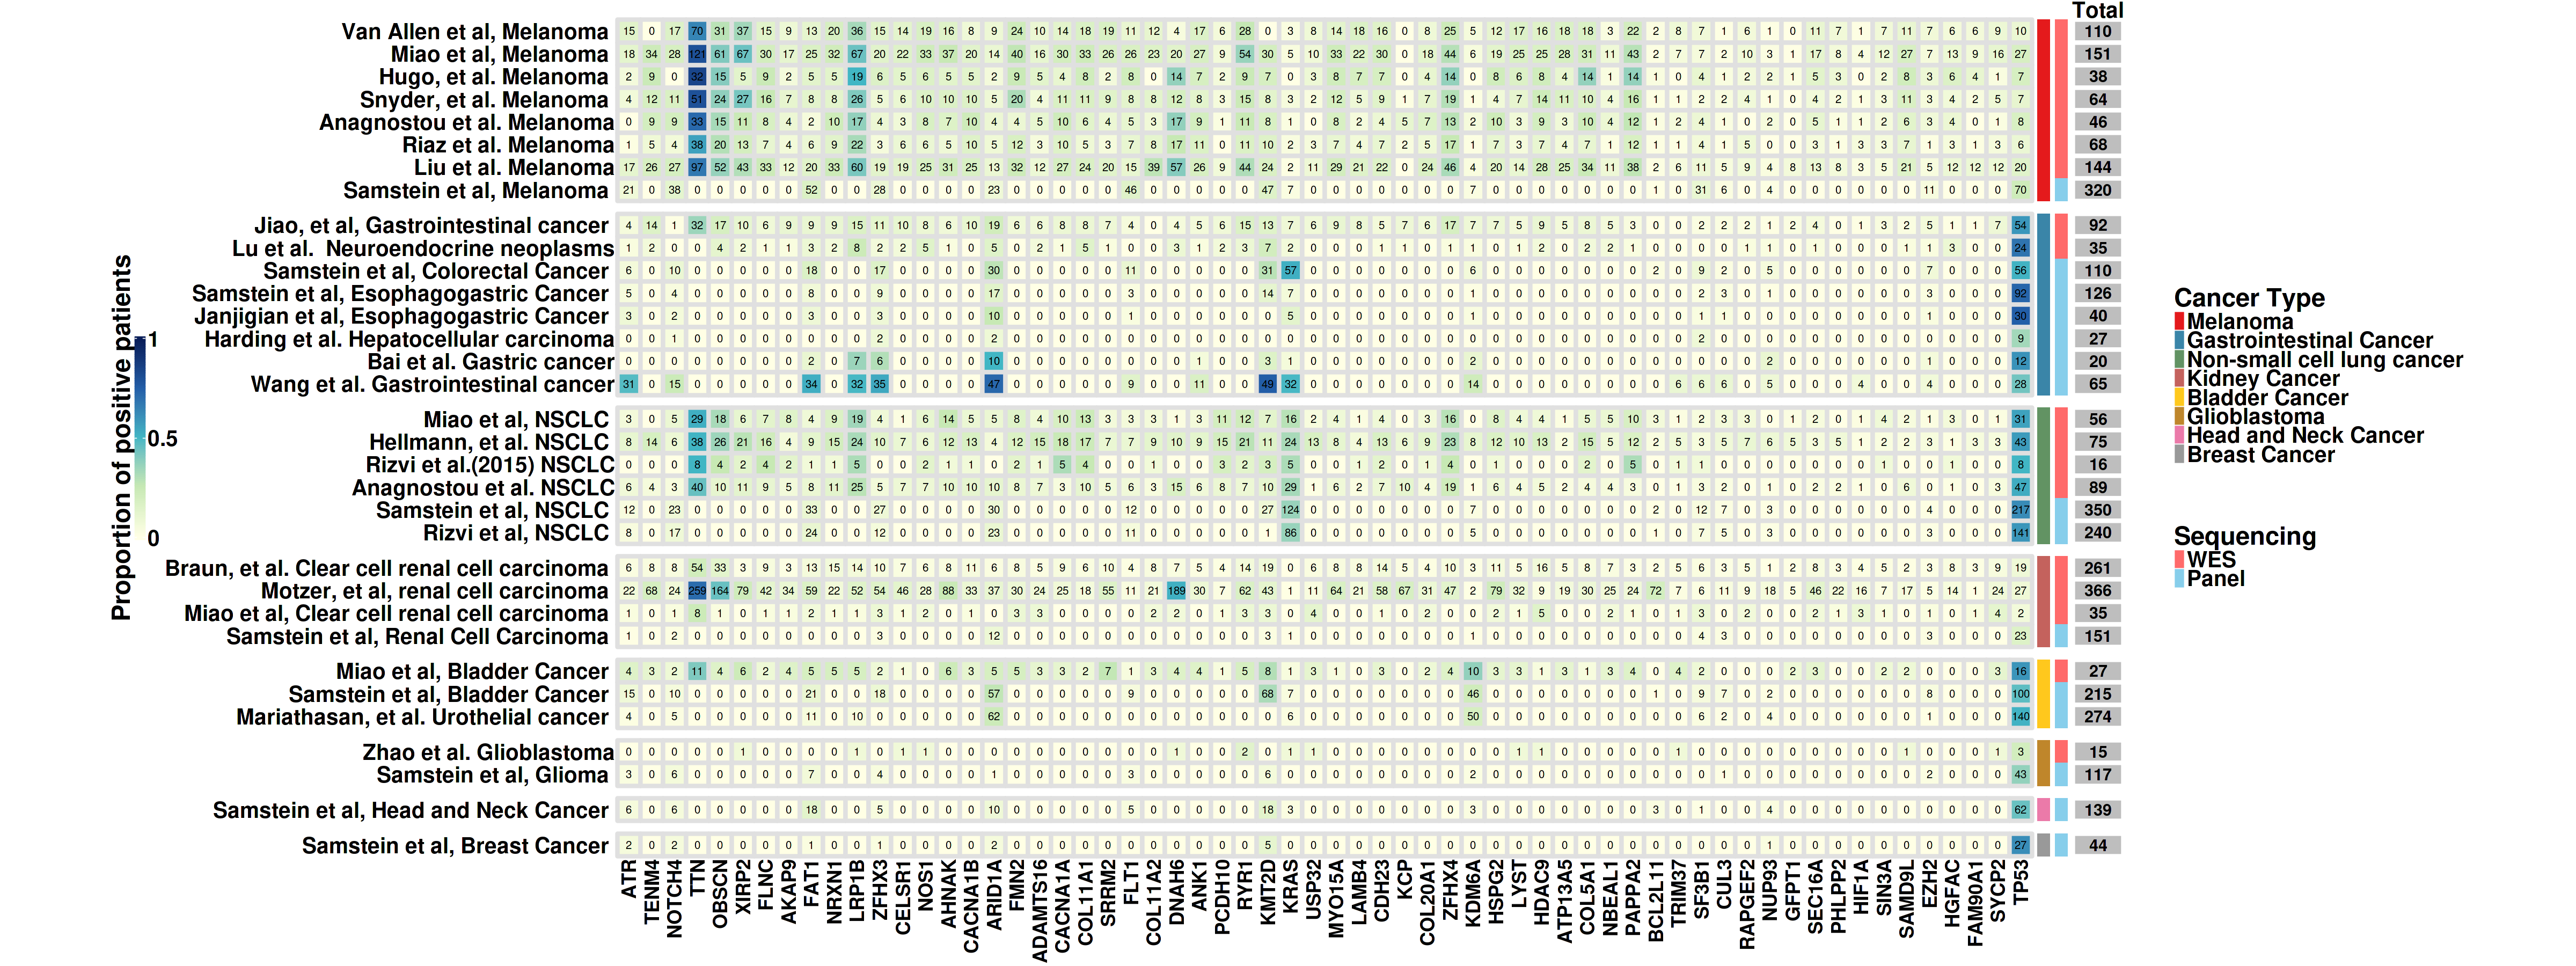

In [49]:
tn = pat_mut_num$Cohort_size
names(tn) = rownames(pat_mut_num)
n = nrow(pat_mut_pro)

ha = Heatmap(tn,
             row_names_side = "left",
#              row_names_gp = gpar(fontface = "bold",cex = 1.5),
#              row_names_max_width = max_text_width(rownames(hm),gp = gpar(fontsize = 12)),
             column_names_centered = T,
             show_heatmap_legend = F,
             width = unit(2, "cm"),
             column_names_gp = gpar(fontface = "bold",cex = 2,angle = 45),
             rect_gp = gpar(col = "white", lwd = 5),
             name = "Total",
             col = rep("gray",n),
             column_names_rot =0,
             cluster_rows = F,
             column_names_side = "top",
             cell_fun = function(j, i, x, y, width, height, fill){
               
               grid.text( as.matrix(tn)[i, j], x, y, gp = gpar(fontsize =18,fontface="bold"))
               
             }
            )

# options(repr.plot.height = 12, repr.plot.width = 34)
# ht_opt$HEATMAP_LEGEND_PADDING = unit(3.5, "cm")
# draw(ht+ha,heatmap_legend_side ="left")

    l1 =  Legend(
            labels = cancer_type,
            title = "Cancer Type",
            legend_gp = gpar(fill = a,fontsize = 20),
            title_gp = gpar(col = "black", fontsize = 28,fontface="bold"),
            labels_gp = gpar(col = "black", fontsize = 24,fontface="bold")
        )
    l2 = Legend(
            labels = c("WES","Panel"),
            title = "Sequencing",
            legend_gp = gpar(fill = c("indianred1","skyblue"),fontsize = 20),
            title_gp = gpar(col = "black", fontsize = 28,fontface="bold"),
            labels_gp = gpar(col = "black", fontsize = 24,fontface="bold")
        )

    options(repr.plot.height = 15, repr.plot.width = 40)

    ht_opt$HEATMAP_LEGEND_PADDING = unit(9, "cm")
    ht_opt$ANNOTATION_LEGEND_PADDING = unit(2, "cm")
    draw(ht+row_ha1+row_ha2+ha,
         heatmap_legend_side ="left",
         annotation_legend_side = "right",
         annotation_legend_list = packLegend(l1,l2,row_gap = unit(2.5,"cm"),gap = unit(2.5,"cm"))
        )

In [50]:
pdf("Artical_Figure2/Figure 1/SNVSCORE_single_gene2.pdf",width = 40,height = 25)
    ht_opt$HEATMAP_LEGEND_PADDING = unit(9, "cm")
    ht_opt$ANNOTATION_LEGEND_PADDING = unit(2, "cm")
    draw(ht+row_ha1+row_ha2+ha,
         heatmap_legend_side ="left",
         annotation_legend_side = "right",
         annotation_legend_list = packLegend(l1,l2,row_gap = unit(2.5,"cm"),gap = unit(2.5,"cm"))
        )
dev.off()

png 
  2

### TCGA -- mutation frequencies

In [50]:
library(maftools)

In [51]:
maf1 = read.maf("/home/ncpsb/new_mnt/Other/jx/web/data/TCGA(panacanalt)/mc3.v0.2.8.PUBLIC.maf",isTCGA = F,useAll = T,removeDuplicatedVariants = T)

TCGA_PanCancer = readRDS("/srv/shiny-server/SNVIO_V10.1/data/TCGA/panacanlt_TCGA_log2.rds")
pathway_list = readRDS("/srv/shiny-server/SNVIO_V10.1/data/all_pathway.rds")

-Reading
-Validating
--Removed 149782 duplicated variants
-Silent variants: 1288245 
-Summarizing
--Possible FLAGS among top ten genes:
  TTN
  MUC16
  SYNE1
  FLG
  USH2A
-Processing clinical data
--Missing clinical data
-Finished in 00:05:05 elapsed (00:05:15 cpu) 


In [52]:
TCGA_cohort_cal_pm = function(TCGA,cancer_type,gene,Mut_type,Wild_type){
  if("All" %in% Mut_type){
    mut = unique(as.character(TCGA[[cancer_type]]$maf@data$Tumor_Sample_Barcode[
      TCGA[[cancer_type]]$maf@data$Hugo_Symbol %in% pathway_list[[gene]]
    ]))
  }else{
    mut = unique(as.character(TCGA[[cancer_type]]$maf@data$Tumor_Sample_Barcode[
      TCGA[[cancer_type]]$maf@data$Hugo_Symbol %in% pathway_list[[gene]] &
        TCGA[[cancer_type]]$maf@data$Variant_Classification %in% Mut_type
    ]))
  }
  
  if(Wild_type == "Others"){
    wt = setdiff(x = unique(as.character(TCGA[[cancer_type]]$maf@data$Tumor_Sample_Barcode)),mut) 
  }else{
    wt = setdiff(x = unique(as.character(TCGA[[cancer_type]]$maf@data$Tumor_Sample_Barcode)),
                 unique(as.character(TCGA[[cancer_type]]$maf@data$Tumor_Sample_Barcode[TCGA[[cancer_type]]$maf@data$Hugo_Symbol %in% pathway_list[[gene]]])))
  }
  return(list("mut" = mut,"wt" = wt))
}

In [53]:
anno = vector()
for(i in names(TCGA_PanCancer)){
    tmp_cohort = TCGA_cohort_cal_pm(TCGA_PanCancer,i,"GOBP_REGULATION_OF_COMPLEMENT_ACTIVATION","All","Others")
    tmp_mut = tmp_cohort$mut
    tmp_wt = tmp_cohort$wt
    anno = rbind(anno,data.frame(Patient=tmp_mut,Cancer_Type=rep(i,length(tmp_mut)),Complement=rep("Mutation",length(tmp_mut))))
    anno = rbind(anno,data.frame(Patient=tmp_wt,Cancer_Type=rep(i,length(tmp_wt)),Complement=rep("Wildtype",length(tmp_wt))))
    
}
rownames(anno) = anno$Patient
anno$Patient = NULL
anno$Tumor_Sample_Barcode = rownames(anno)

In [54]:
total_maf_matrix = maf1@data
total_maf_matrix$Tumor_Sample_Barcode = gsub(pattern = "(TCGA-..-....)-.*",replacement = "\\1",x = maf1@data$Tumor_Sample_Barcode)

maf2 = read.maf(total_maf_matrix)
tmp_maf = subsetMaf(maf = maf2,tsb = rownames(anno))

-Validating
--Removed 2296 duplicated variants
-Summarizing
--Possible FLAGS among top ten genes:
  TTN
  MUC16
  SYNE1
  FLG
  USH2A
-Processing clinical data
--Missing clinical data
-Finished in 00:03:19 elapsed (00:03:20 cpu) 


In [55]:
pdf(file = "Artical_Figure2/Figure 1/SNVSCORE_single_gene3.pdf",width = 20,height = 20)
oncoplot(maf = tmp_maf,bgCol = "white",
                   borderCol = NULL,
                   legendFontSize = 2,
                   gene_mar = 8,
                   removeNonMutated = FALSE,
                   legend_height=6,
                   fontSize = 1.2,
#                    annotationColor = tl,
                   annotationFontSize = 2,
                   annotationDat = anno,
                   clinicalFeatures = c("Cancer_Type"),
#                    sortByAnnotation = T,
                   genes = c(names(C)[1:45],names(C)[(length(C)-16):length(C)])
                   )
dev.off()

png 
  2

### Prognostic genes in each cancer type

In [51]:
library(circlize)
plot_complexheatmap3 = function(C,OS_combind,PFS_combind,nGene){
    
    library(ComplexHeatmap)
    cancer_type =  c("Melanoma","Gastrointestinal Cancer","Non-small cell lung cancer","Kidney Cancer","Bladder Cancer",
                         "Glioblastoma","Head and Neck Cancer","Breast Cancer")
    Cancer_specific_genes = vector()
    for(i in cancer_type){
        tmp_A = RS_matrix_OS[unique(intersect(rownames(RS_matrix_OS),rownames(RS_matrix_PFS))),i]
        tmp_B = RS_matrix_PFS[unique(intersect(rownames(RS_matrix_OS),rownames(RS_matrix_PFS))),i]
        tmp_A[is.na(tmp_A)] = 0
        tmp_B[is.na(tmp_B)] = 0

        tmp_C = tmp_A+tmp_B
        names(tmp_C) = unique(intersect(rownames(RS_matrix_OS),rownames(RS_matrix_PFS)))

        tmp_C = sort(tmp_C)

       Cancer_specific_genes = c(Cancer_specific_genes,names(tmp_C)[1:nGene]) #前十个
    }
    

#     total_meta = vector()
    total_hm = list()

    HR_matrix = reshape2::dcast(data = OS_combind[,c("dataset","HR(OS)","gene")],formula = dataset~gene,value.var = "HR(OS)")
    rownames(HR_matrix) = HR_matrix$dataset
    HR_matrix$dataset = NULL
    HR_matrix = HR_matrix[ rownames(datasets_names)[ rownames(datasets_names) %in% rownames(HR_matrix)],]
    rownames(HR_matrix) = datasets_names[rownames(HR_matrix),] 
    hm = as.matrix(HR_matrix)[ ,Cancer_specific_genes]
    hm[ hm > 2 ] = 2
    total_hm[["OS"]] = hm


    HR_matrix = reshape2::dcast(data = PFS_combind[,c("dataset","HR(PFS)","gene")],formula = dataset~gene,value.var = "HR(PFS)")
    rownames(HR_matrix) = HR_matrix$dataset
    HR_matrix$dataset = NULL
    HR_matrix = HR_matrix[ rownames(datasets_names)[ rownames(datasets_names) %in% rownames(HR_matrix)],]
    rownames(HR_matrix) = datasets_names[rownames(HR_matrix),] 
    hm = as.matrix(HR_matrix)[ ,Cancer_specific_genes]
    hm[ hm > 2 ] = 2
    total_hm[["PFS"]] = hm

    OP = setdiff(rownames(total_hm$PFS),rownames(total_hm$OS))
    OP_matrix = matrix(rep(NA,length(OP)*nGene*length(cancer_type)),nrow = length(OP),ncol = nGene*length(cancer_type))
    rownames(OP_matrix) = OP
    total_hm$OS = rbind(total_hm$OS,OP_matrix)
    
    OO = setdiff(rownames(total_hm$OS),rownames(total_hm$PFS))
    OO_matrix = matrix(rep(NA,length(OO)*nGene*length(cancer_type)),nrow = length(OO),ncol = nGene*length(cancer_type))
    rownames(OO_matrix) = OO
    total_hm$PFS = rbind(total_hm$PFS,OO_matrix)

    
    
    share_dn = intersect(rownames(total_hm$OS),rownames(total_hm$PFS))
    rownames(datasets_overview) = datasets_overview$Cohort_name
    newmeta = datasets_overview[share_dn,]
    newmeta = newmeta[ order(newmeta$Sequencing,decreasing = T),]
    newmeta$Cancer_type2 = factor(newmeta$Cancer_type2 ,levels = cancer_type)
    newmeta = newmeta[ order(newmeta$Cancer_type2),]
    
    total_hm$OS = total_hm$OS[ newmeta$Cohort_name,]
    total_hm$PFS = total_hm$PFS[ newmeta$Cohort_name,]
    
#     return(total_hm)
    
    HR_values = total_hm
    survival_type = total_hm
    
    survival_type$OS[! is.na(survival_type$OS ) ] = 1
    survival_type$OS[ is.na(survival_type$OS ) ] = 0
    survival_type$PFS[! is.na(survival_type$PFS ) ] = 1
    survival_type$PFS[ is.na(survival_type$PFS ) ] = 0
    
    color_mapping <- colorRamp2(c(0,1,2), c("blue","white", "red"))
    
    a = colorRampPalette(RColorBrewer::brewer.pal(9,"Set1"))(8)
    names(a) = cancer_type

    row_ha1 = HeatmapAnnotation(
            simple_anno_size = unit(2, "cm"),
            show_legend = F,
            which = "row",
            Sequencing=factor(newmeta[,"Sequencing"],levels = c("WES","Panel")),
            CancerType=newmeta[,"Cancer_type2"],
            
            col = list(CancerType = a,Sequencing = c("WES"="indianred1","Panel"="skyblue")),
            show_annotation_name = F,
            border = TRUE,
            gap = unit(2, "mm")

    )
    
    col_ha1 = HeatmapAnnotation(
        show_legend = F,
        which = "column",
        CancerType=unlist(lapply(cancer_type,function(x){rep(x,nGene)})),
        col = list(CancerType = a),
        show_annotation_name = F

    )
    
    l1 =  Legend(
            labels = cancer_type,
            title = "Cancer Type",
            legend_gp = gpar(fill = a,fontsize = 20),
            title_gp = gpar(col = "black", fontsize = 28,fontface="bold"),
            labels_gp = gpar(col = "black", fontsize = 24,fontface="bold")
        )
    l2 = Legend(
                labels = c("WES","Panel"),
                title = "Sequencing",
                legend_gp = gpar(fill = c("indianred1","skyblue"),fontsize = 20),
                title_gp = gpar(col = "black", fontsize = 28,fontface="bold"),
                labels_gp = gpar(col = "black", fontsize = 24,fontface="bold")
            )
    l3 <- Legend(at = c(0, 1, 2),
                 title_position = "leftcenter-rot",
                 legend_height = unit(10, "cm"),
                 labels = c("0", "1", "2"),
                 title = "HR",
                 col_fun = colorRamp2(c(0, 1, 2), c("blue", "white", "red")),
                 direction = "vertical",
                 legend_gp = gpar(fill = c("indianred1","skyblue"),fontsize = 20),
                 title_gp = gpar(col = "black", fontsize = 28,fontface="bold"),
                 labels_gp = gpar(col = "black", fontsize = 24,fontface="bold")
                )
    n = 1
    y_all = 0
    i = 0
    j = 0
    total_n = (nGene*length(cancer_type)) * length(share_dn)
    ht = oncoPrint(survival_type,show_pct = F,
                   width = (nGene*length(cancer_type))*unit(7, "mm"),
                   height = length(share_dn)*unit(10, "mm"),
                  show_column_names = T,
                  row_order = newmeta$Cohort_name,
                  column_order = Cancer_specific_genes,
                  row_names_side = "left",
                  column_names_side = "bottom",
                  row_names_gp = gpar(fontface = "bold",cex = 2),
                  column_names_gp = gpar(fontface = "bold",cex = 1.8),
                  heatmap_legend_param = list(title = "Clinical Outcome",
                                              direction = "horizontal",
                                              legend_height = unit(10, "cm"),
                                              title_gp = gpar(fontsize = 28,fontface = "bold"),
                                              labels_gp = gpar(fontsize = 24,fontface = "bold"),
                                              title_position = "leftcenter"
                                             ),
#                   top_annotation = col_ha1,
             row_split = newmeta[,"Cancer_type2"],
                  right_annotation = row_ha1,
                  row_title = NULL,
                  row_gap = unit(2, "mm"),
    #               row_names_max_width = max_text_width(rownames(hm),gp = gpar(fontsize = 12)),
    #               column_names_max_height = max_text_width(colnames(hm),gp = gpar(cex = 22)),
    #               rect_gp = gpar(col = "white", lwd = 5),
                  alter_fun = list(
                                    background = function(x, y, w, h) {

                                        if(n <= 4 | n > total_n+4){ # 
                                                                        y_all <<- 0
                                                                        i <<- 0
                                                                        j <<- 0
                                        }else if(!y %in% y_all){
                                                                        y_all <<- y
                                                                        j <<- 1
                                                                        i <<- i + 1
                                        }else if(y %in% y_all){
                                                                        j <<- j + 1
                                                                        if(j > (nGene*length(cancer_type))){
                                                                            j<<- 1
                                                                            i<<- i + 1
                                                                        }
                                        }         
                                        n <<- n + 1

                                        grid.polygon(
                                                unit.c(x - 0.5*w, x - 0.5*w, x + 0.5*w), 
                                                unit.c(y - 0.5*h, y + 0.5*h, y - 0.5*h),
                                                gp = gpar(fill = "grey88", col = "white")
                                        )
                                        grid.polygon(
                                                unit.c(x + 0.5*w, x + 0.5*w, x - 0.5*w), 
                                                unit.c(y + 0.5*h, y - 0.5*h, y + 0.5*h),
                                                gp = gpar(fill = "grey88", col = "white")
                                        )

                                    },
                                    OS = function(x, y, w, h) {
                                        
                                        if(i!=0&j!=0&!y_all %in% 0){
                                            v = ifelse(is.na(HR_values$OS[i,j]),"grey88",color_mapping(HR_values$OS[i,j]))
                                            grid.polygon(
                                                unit.c(x - 0.5*w, x - 0.5*w, x + 0.5*w), 
                                                unit.c(y - 0.5*h, y + 0.5*h, y - 0.5*h),
                                                gp = gpar(fill = v, col = "white")
                                            )
                                        }else{ # 
                                              grid.polygon(
                                                unit.c(x - 0.5*w, x - 0.5*w, x + 0.5*w), 
                                                unit.c(y - 0.5*h, y + 0.5*h, y - 0.5*h),
                                                gp = gpar(fill = "red", col = "white"))
                                          }
                                    },
                                    PFS = function(x, y, w, h) {

                                        if(i!=0&j!=0&!y_all %in% 0){
                                            v = ifelse(is.na(HR_values$PFS[i,j]),"grey88",color_mapping(HR_values$PFS[i,j]))
                                            grid.polygon(
                                                unit.c(x + 0.5*w, x + 0.5*w, x - 0.5*w), 
                                                unit.c(y + 0.5*h, y - 0.5*h, y + 0.5*h),
                                                gp = gpar(fill =v, col = "white"))
                                        }else{ # 
                                              grid.polygon(
                                                unit.c(x + 0.5*w, x + 0.5*w, x - 0.5*w), 
                                                unit.c(y + 0.5*h, y - 0.5*h, y + 0.5*h),
                                                gp = gpar(fill ="blue", col = "white"))
                                          }

                                    }
                  )


                  )

    options(repr.plot.height = 20, repr.plot.width = 40)
    ht_opt$HEATMAP_LEGEND_PADDING = unit(1, "cm")
    ht_opt$ANNOTATION_LEGEND_PADDING = unit(2, "cm")
    draw(ht,
         heatmap_legend_side ="bottom",
         annotation_legend_side = "right",
         annotation_legend_list = packLegend(l1,l2,l3,row_gap = unit(2.5,"cm"),gap = unit(2.5,"cm"))
            )
    
    
}

All mutation types: OS, PFS.

Colors are not defined for: OS, PFS. They won't be shown in the
barplots.



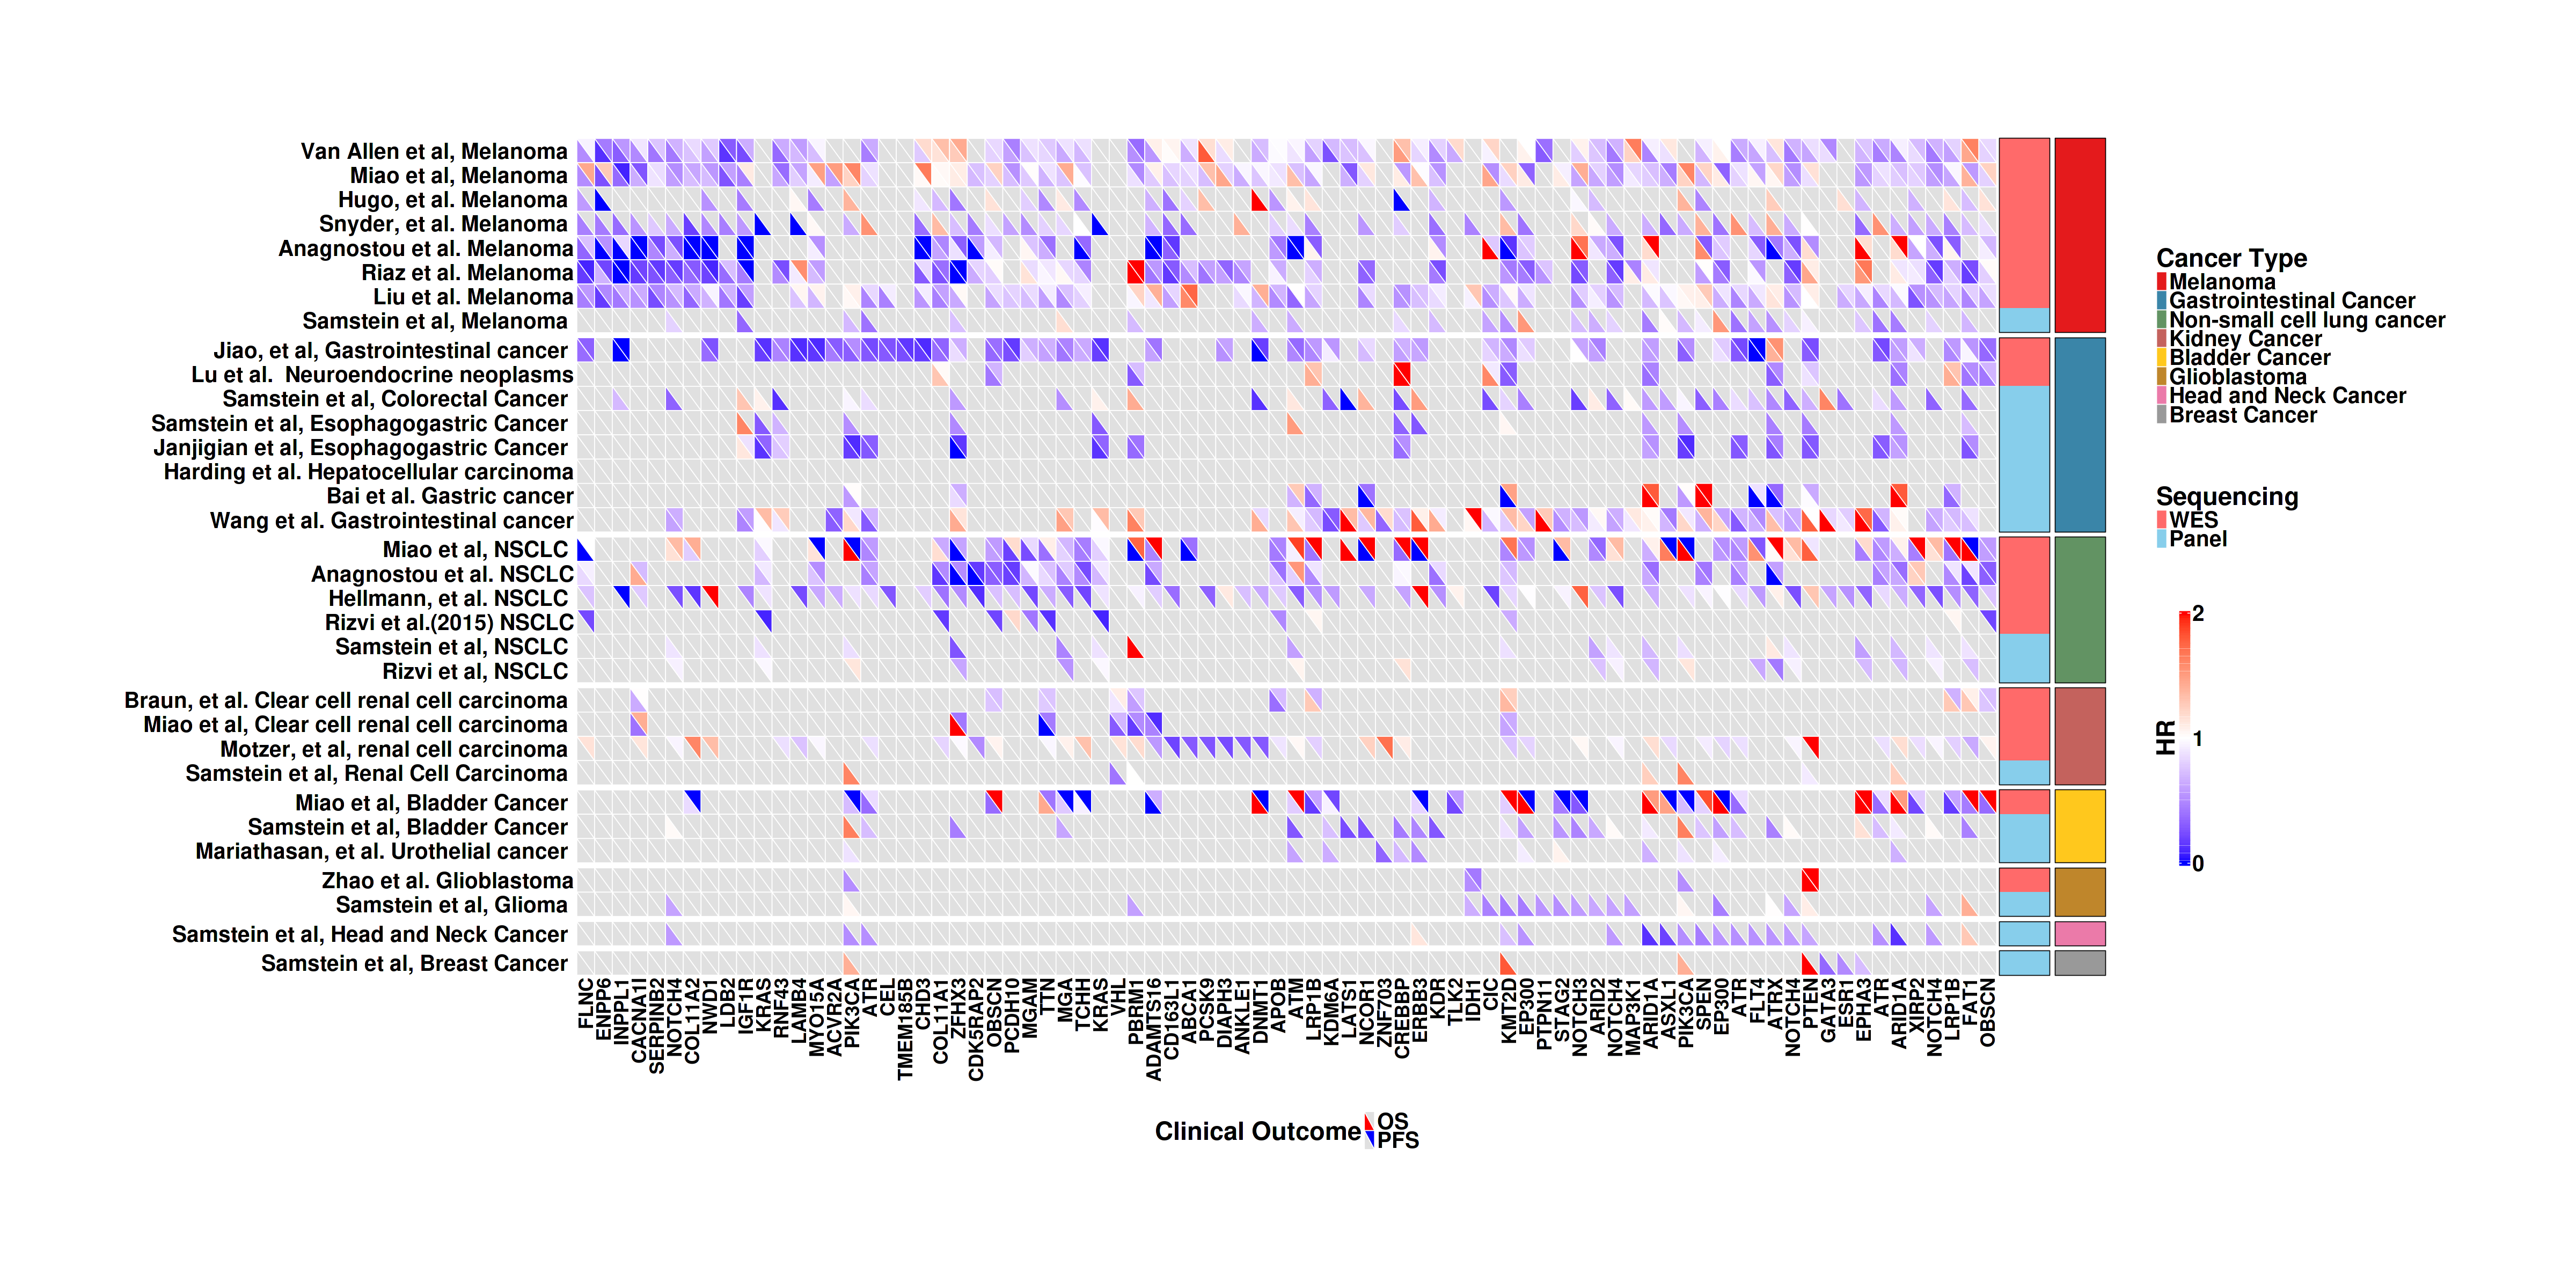

In [52]:
plot_complexheatmap3(C = C,OS_combind = OS_combind,PFS_combind = PFS_combind,nGene = 10)

In [52]:
pdf("Artical_Figure2/Figure 1/SNVSCORE_single_gene4.new.pdf",width = 40,height = 30)
plot_complexheatmap3(C = C,OS_combind = OS_combind,PFS_combind = PFS_combind,nGene = 10)
dev.off()

All mutation types: OS, PFS.

Colors are not defined for: OS, PFS. They won't be shown in the
barplots.



png 
  2

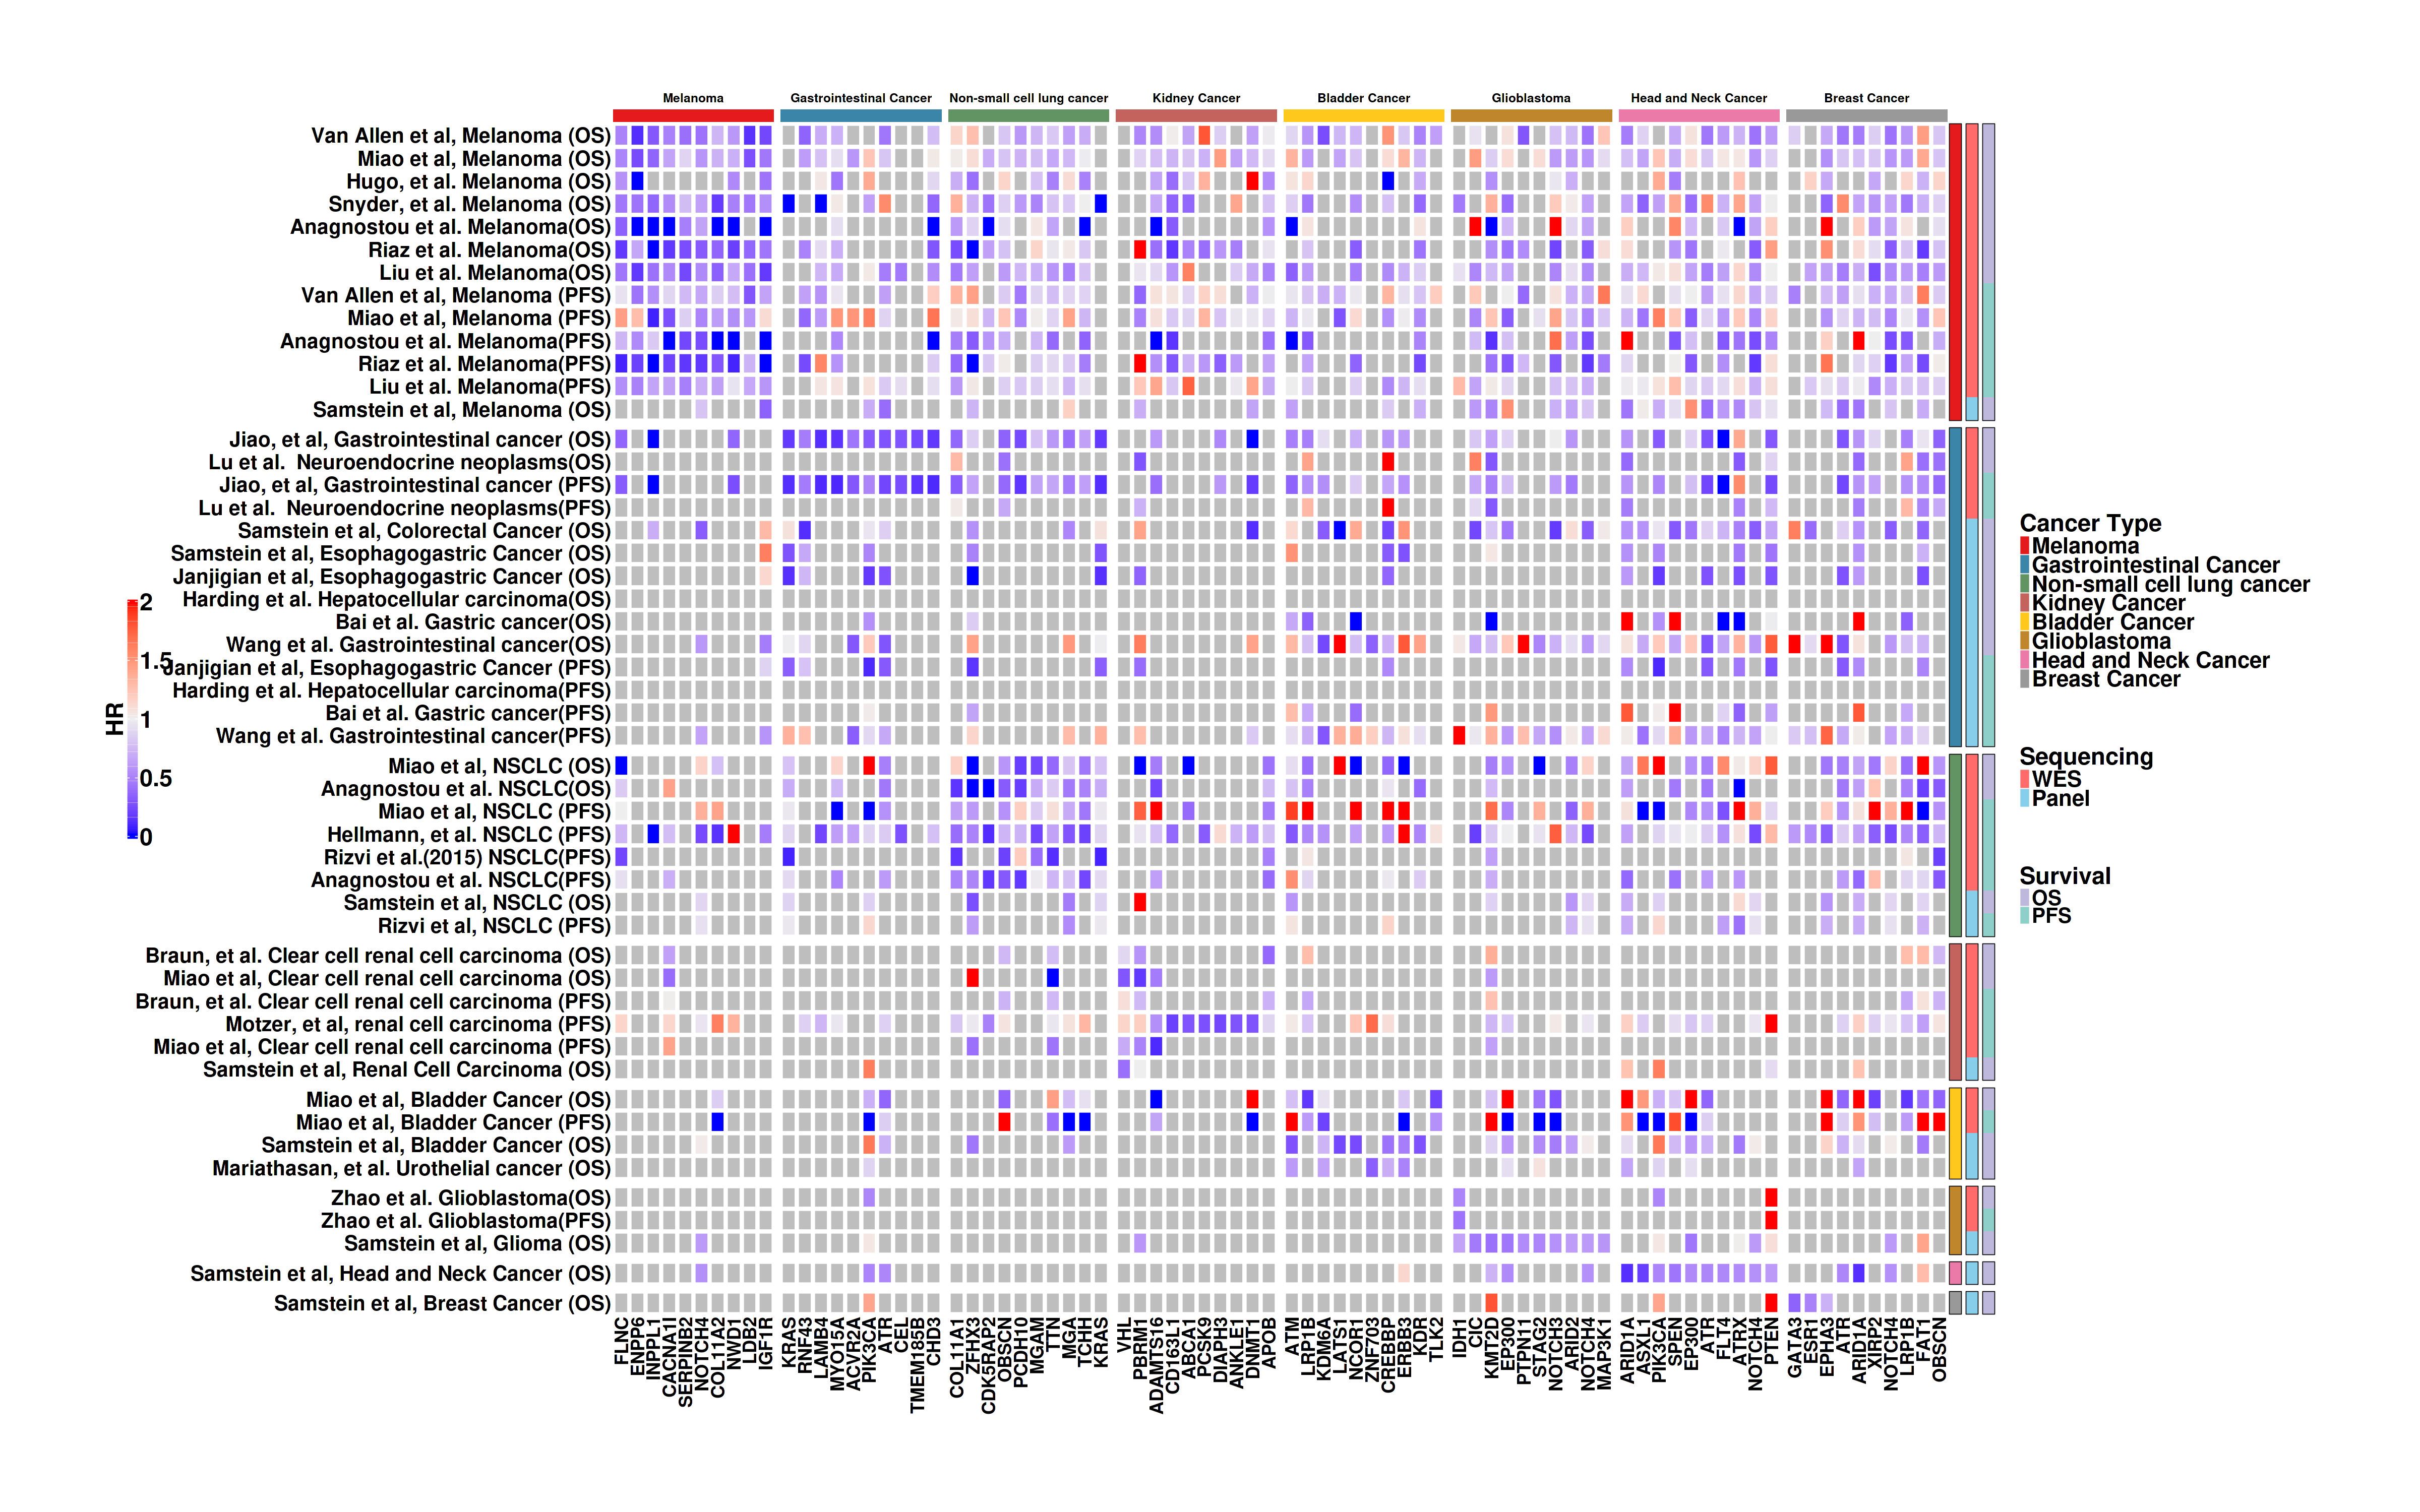

In [53]:
cancer_type =  c("Melanoma","Gastrointestinal Cancer","Non-small cell lung cancer","Kidney Cancer","Bladder Cancer",
                     "Glioblastoma","Head and Neck Cancer",
                     "Breast Cancer")

Cancer_specific_genes = vector()
for(i in cancer_type){
    tmp_A = RS_matrix_OS[unique(intersect(rownames(RS_matrix_OS),rownames(RS_matrix_PFS))),i]
    tmp_B = RS_matrix_PFS[unique(intersect(rownames(RS_matrix_OS),rownames(RS_matrix_PFS))),i]
    tmp_A[is.na(tmp_A)] = 0
    tmp_B[is.na(tmp_B)] = 0

    tmp_C = tmp_A+tmp_B
    names(tmp_C) = unique(intersect(rownames(RS_matrix_OS),rownames(RS_matrix_PFS)))

    tmp_C = sort(tmp_C)
    
   Cancer_specific_genes = c(Cancer_specific_genes,names(tmp_C)[1:10]) #前十个
}

total_hm = vector()
total_meta = vector()

HR_matrix = reshape2::dcast(data = OS_combind[,c("dataset","HR(OS)","gene")],formula = dataset~gene,value.var = "HR(OS)")
rownames(HR_matrix) = HR_matrix$dataset
HR_matrix$dataset = NULL

HR_matrix = HR_matrix[ rownames(datasets_names)[ rownames(datasets_names) %in% rownames(HR_matrix)],]
rownames(HR_matrix) = datasets_names[rownames(HR_matrix),]

meta = datasets_overview[ datasets_overview$Cohort_name %in% rownames(HR_matrix),]
rownames(meta) = paste(meta$Cohort_name,"(","OS",")",sep="")
meta = meta[,c("Cancer_type","Immune_checkpoint_blockade","Sequencing","Cancer_type2")]
meta$Survival = "OS"
total_meta = rbind(total_meta,meta)

rownames(HR_matrix) = paste(rownames(HR_matrix),"(","OS",")",sep="")
hm = as.matrix(HR_matrix)[ ,Cancer_specific_genes]
hm[ hm > 2 ] = 2
hm = hm[order(meta$Sequencing,decreasing = T),]
# hm = hm[ rowSums(is.na(hm)) != ncol(hm),]
total_hm = rbind(total_hm,hm)
##########
HR_matrix = reshape2::dcast(data = PFS_combind[,c("dataset","HR(PFS)","gene")],formula = dataset~gene,value.var = "HR(PFS)")
rownames(HR_matrix) = HR_matrix$dataset
HR_matrix$dataset = NULL

HR_matrix = HR_matrix[ rownames(datasets_names)[ rownames(datasets_names) %in% rownames(HR_matrix)],]
rownames(HR_matrix) = datasets_names[rownames(HR_matrix),]

meta = datasets_overview[ datasets_overview$Cohort_name %in% rownames(HR_matrix),]
rownames(meta) = paste(meta$Cohort_name,"(","PFS",")",sep="")
meta = meta[,c("Cancer_type","Immune_checkpoint_blockade","Sequencing","Cancer_type2")]
meta$Survival = "PFS"
total_meta = rbind(total_meta,meta)


rownames(HR_matrix) = paste(rownames(HR_matrix),"(","PFS",")",sep="")
hm = as.matrix(HR_matrix)[ ,Cancer_specific_genes]
hm[ hm > 2 ] = 2
hm = hm[order(meta$Sequencing,decreasing = T),]
# hm = hm[ rowSums(is.na(hm)) != ncol(hm),]
total_hm = rbind(total_hm,hm)

total_meta = total_meta[order(total_meta$Survival,decreasing = F),]
total_meta = total_meta[order(total_meta$Sequencing,decreasing = T),]
total_hm = total_hm[rownames(total_meta),]

a = colorRampPalette(RColorBrewer::brewer.pal(9,"Set1"))(8)
names(a) = cancer_type

row_ha1 = HeatmapAnnotation(
    show_legend = F,
    which = "row",
    CancerType=total_meta[rownames(total_hm),"Cancer_type2"],
    Sequencing=factor(total_meta[rownames(total_hm),"Sequencing"],levels = c("WES","Panel")),
    Survival=factor(total_meta[rownames(total_hm),"Survival"],levels = c("OS","PFS")),
    col = list(CancerType = a,Sequencing = c("WES"="indianred1","Panel"="skyblue"),Survival = c("OS"="#BEB8DC","PFS"="#8ECFC9")),
    show_annotation_name = F,
    border = TRUE,
    gap = unit(2, "mm")
    
)

col_ha1 = HeatmapAnnotation(
    show_legend = F,
    which = "column",
    CancerType=unlist(lapply(cancer_type,function(x){rep(x,10)})),
    col = list(CancerType = a),
    show_annotation_name = F,
    annotation_legend_param  = list(
                                        title = "Cancer_Type", legend_height = unit(8, "cm"),
                                        title_gp = gpar(fontsize = 18,fontface = "bold"),
                                        labels_gp = gpar(fontsize = 18,fontface = "bold"),
                                        title_position = "leftcenter-rot"
                                   )
    
)

ht = Heatmap(as.matrix(total_hm),width = ncol(total_hm)*unit(7, "mm"),height = nrow(total_hm)*unit(10, "mm"),
             right_annotation = row_ha1,
#              heatmap_height = unit(20,"cm"),
#              heatmap_width = unit(40,"cm"),
             row_names_side = "left",
             column_names_side = "bottom",
             heatmap_legend_param = list(title = "HR", legend_height = unit(10, "cm"),
                                        title_gp = gpar(fontsize = 28,fontface = "bold"),
                                        labels_gp = gpar(fontsize = 28,fontface = "bold"),
                                        title_position = "leftcenter-rot"
    #                                     at = c( 0,0.25,0.5,0.75, 1)
                                       ),
             top_annotation = col_ha1,
#              row_split = factor(meta[rownames(hm),"Cancer_type2"],levels = c("Melanoma","Gastrointestinal Cancer","Urothelial Cancer","Renal Cell Carcinoma",
#                                                                             "Non-small cell lung cancer","Glioblastoma","Hepatocellular carcinoma","Head and Neck Cancer","Breast Cancer","Pan-cancer")),
             row_split = factor(total_meta[rownames(total_hm),"Cancer_type2"],levels = c("Melanoma","Gastrointestinal Cancer","Non-small cell lung cancer","Kidney Cancer","Bladder Cancer",
                                                                            "Glioblastoma","Head and Neck Cancer","Breast Cancer")),
             row_title = NULL,
             row_gap = unit(3, "mm"),
             column_split = factor(unlist(lapply(cancer_type,function(x){rep(x,10)})),levels = c("Melanoma","Gastrointestinal Cancer","Non-small cell lung cancer","Kidney Cancer","Bladder Cancer",
                                                                            "Glioblastoma","Head and Neck Cancer","Breast Cancer")),
             column_title_gp =  gpar(fontface = "bold",cex = 1.2),
             column_gap = unit(3, "mm"),
             
             row_names_max_width = max_text_width(rownames(total_hm),gp = gpar(fontsize = 12)),
             column_names_max_height = max_text_width(colnames(total_hm),gp = gpar(cex = 22)),
             row_names_gp = gpar(fontface = "bold",cex = 2),
             column_names_gp = gpar(fontface = "bold",cex = 1.8),
#         col = colorRamp2(c( 0,0.25,0.5,0.75, 1), c("#FFFFE5","#C7E9B4", "#41B6C4","#225EA8","#081D58")),
        cluster_rows = F,
        cluster_columns = F,
        rect_gp = gpar(col = "white", lwd = 5)
       )

l1 =  Legend(
        labels = cancer_type,
        title = "Cancer Type",
        legend_gp = gpar(fill = a,fontsize = 20),
        title_gp = gpar(col = "black", fontsize = 28,fontface="bold"),
        labels_gp = gpar(col = "black", fontsize = 26,fontface="bold")
    )
l2 = Legend(
        labels = c("WES","Panel"),
        title = "Sequencing",
        legend_gp = gpar(fill = c("indianred1","skyblue"),fontsize = 20),
        title_gp = gpar(col = "black", fontsize = 28,fontface="bold"),
        labels_gp = gpar(col = "black", fontsize = 26,fontface="bold")
    )

l3 = Legend(
                labels = c("OS","PFS"),
                title = "Survival",
                legend_gp = gpar(fill = c("#BEB8DC","#8ECFC9"),fontsize = 20),
                title_gp = gpar(col = "black", fontsize = 28,fontface="bold"),
                labels_gp = gpar(col = "black", fontsize = 24,fontface="bold")
        )

options(repr.plot.height = 25, repr.plot.width = 40)

ht_opt$HEATMAP_LEGEND_PADDING = unit(8, "cm")
ht_opt$ANNOTATION_LEGEND_PADDING = unit(0, "cm")
draw(ht ,
     heatmap_legend_side ="left",
     annotation_legend_side = "right",
     annotation_legend_list = packLegend(l1,l2,l3,row_gap = unit(2.5,"cm"),gap = unit(2.5,"cm"))
    )

In [54]:
pdf("Artical_Figure2/Figure 1/SNVSCORE_single_gene4.pdf",width = 40,height = 30)
ht_opt$HEATMAP_LEGEND_PADDING = unit(8, "cm")
ht_opt$ANNOTATION_LEGEND_PADDING = unit(0, "cm")
draw(ht ,
     heatmap_legend_side ="left",
     annotation_legend_side = "right",
     annotation_legend_list = packLegend(l1,l2,l3,row_gap = unit(2.5,"cm"),gap = unit(2.5,"cm"))
    )
dev.off()

png 
  2

In [55]:
library(circlize)
plot_complexheatmap3 = function(C,OS_combind,PFS_combind,nGene){
    
    library(ComplexHeatmap)
    cancer_type =  c("Melanoma","Gastrointestinal Cancer","Non-small cell lung cancer","Kidney Cancer","Bladder Cancer",
                         "Glioblastoma","Head and Neck Cancer","Breast Cancer")
    Cancer_specific_genes = vector()
    for(i in cancer_type){
        tmp_A = RS_matrix_OS[unique(intersect(rownames(RS_matrix_OS),rownames(RS_matrix_PFS))),i]
        tmp_B = RS_matrix_PFS[unique(intersect(rownames(RS_matrix_OS),rownames(RS_matrix_PFS))),i]
        tmp_A[is.na(tmp_A)] = 0
        tmp_B[is.na(tmp_B)] = 0

        tmp_C = tmp_A+tmp_B
        names(tmp_C) = unique(intersect(rownames(RS_matrix_OS),rownames(RS_matrix_PFS)))

        tmp_C = sort(tmp_C,decreasing = T)

       Cancer_specific_genes = c(Cancer_specific_genes,names(tmp_C)[1:nGene]) #前十个
    }
    

#     total_meta = vector()
    total_hm = list()

    HR_matrix = reshape2::dcast(data = OS_combind[,c("dataset","HR(OS)","gene")],formula = dataset~gene,value.var = "HR(OS)")
    rownames(HR_matrix) = HR_matrix$dataset
    HR_matrix$dataset = NULL
    HR_matrix = HR_matrix[ rownames(datasets_names)[ rownames(datasets_names) %in% rownames(HR_matrix)],]
    rownames(HR_matrix) = datasets_names[rownames(HR_matrix),] 
    hm = as.matrix(HR_matrix)[ ,Cancer_specific_genes]
    hm[ hm > 2 ] = 2
    total_hm[["OS"]] = hm


    HR_matrix = reshape2::dcast(data = PFS_combind[,c("dataset","HR(PFS)","gene")],formula = dataset~gene,value.var = "HR(PFS)")
    rownames(HR_matrix) = HR_matrix$dataset
    HR_matrix$dataset = NULL
    HR_matrix = HR_matrix[ rownames(datasets_names)[ rownames(datasets_names) %in% rownames(HR_matrix)],]
    rownames(HR_matrix) = datasets_names[rownames(HR_matrix),] 
    hm = as.matrix(HR_matrix)[ ,Cancer_specific_genes]
    hm[ hm > 2 ] = 2
    total_hm[["PFS"]] = hm

    OP = setdiff(rownames(total_hm$PFS),rownames(total_hm$OS))
    OP_matrix = matrix(rep(NA,length(OP)*nGene*length(cancer_type)),nrow = length(OP),ncol = nGene*length(cancer_type))
    rownames(OP_matrix) = OP
    total_hm$OS = rbind(total_hm$OS,OP_matrix)
    
    OO = setdiff(rownames(total_hm$OS),rownames(total_hm$PFS))
    OO_matrix = matrix(rep(NA,length(OO)*nGene*length(cancer_type)),nrow = length(OO),ncol = nGene*length(cancer_type))
    rownames(OO_matrix) = OO
    total_hm$PFS = rbind(total_hm$PFS,OO_matrix)

    
    
    share_dn = intersect(rownames(total_hm$OS),rownames(total_hm$PFS))
    rownames(datasets_overview) = datasets_overview$Cohort_name
    newmeta = datasets_overview[share_dn,]
    newmeta = newmeta[ order(newmeta$Sequencing,decreasing = T),]
    newmeta$Cancer_type2 = factor(newmeta$Cancer_type2 ,levels = cancer_type)
    newmeta = newmeta[ order(newmeta$Cancer_type2),]
    
    total_hm$OS = total_hm$OS[ newmeta$Cohort_name,]
    total_hm$PFS = total_hm$PFS[ newmeta$Cohort_name,]
    
#     return(total_hm)
    
    HR_values = total_hm
    survival_type = total_hm
    
    survival_type$OS[! is.na(survival_type$OS ) ] = 1
    survival_type$OS[ is.na(survival_type$OS ) ] = 0
    survival_type$PFS[! is.na(survival_type$PFS ) ] = 1
    survival_type$PFS[ is.na(survival_type$PFS ) ] = 0
    
    color_mapping <- colorRamp2(c(0,1,2), c("blue","white", "red"))
    
    a = colorRampPalette(RColorBrewer::brewer.pal(9,"Set1"))(8)
    names(a) = cancer_type

    row_ha1 = HeatmapAnnotation(
            simple_anno_size = unit(2, "cm"),
            show_legend = F,
            which = "row",
            Sequencing=factor(newmeta[,"Sequencing"],levels = c("WES","Panel")),
            CancerType=newmeta[,"Cancer_type2"],
            
            col = list(CancerType = a,Sequencing = c("WES"="indianred1","Panel"="skyblue")),
            show_annotation_name = F,
            border = TRUE,
            gap = unit(2, "mm")

    )
    
    col_ha1 = HeatmapAnnotation(
        show_legend = F,
        which = "column",
        CancerType=unlist(lapply(cancer_type,function(x){rep(x,nGene)})),
        col = list(CancerType = a),
        show_annotation_name = F

    )
    
    l1 =  Legend(
            labels = cancer_type,
            title = "Cancer Type",
            legend_gp = gpar(fill = a,fontsize = 20),
            title_gp = gpar(col = "black", fontsize = 28,fontface="bold"),
            labels_gp = gpar(col = "black", fontsize = 24,fontface="bold")
        )
    l2 = Legend(
                labels = c("WES","Panel"),
                title = "Sequencing",
                legend_gp = gpar(fill = c("indianred1","skyblue"),fontsize = 20),
                title_gp = gpar(col = "black", fontsize = 28,fontface="bold"),
                labels_gp = gpar(col = "black", fontsize = 24,fontface="bold")
            )
    l3 <- Legend(at = c(0, 1, 2),
                 title_position = "leftcenter-rot",
                 legend_height = unit(10, "cm"),
                 labels = c("0", "1", "2"),
                 title = "HR",
                 col_fun = colorRamp2(c(0, 1, 2), c("blue", "white", "red")),
                 direction = "vertical",
                 legend_gp = gpar(fill = c("indianred1","skyblue"),fontsize = 20),
                 title_gp = gpar(col = "black", fontsize = 28,fontface="bold"),
                 labels_gp = gpar(col = "black", fontsize = 24,fontface="bold")
                )
    n = 1
    y_all = 0
    i = 0
    j = 0
    total_n = (nGene*length(cancer_type)) * length(share_dn)
    ht = oncoPrint(survival_type,show_pct = F,
                   width = (nGene*length(cancer_type))*unit(7, "mm"),
                   height = length(share_dn)*unit(10, "mm"),
                  show_column_names = T,
                  row_order = newmeta$Cohort_name,
                  column_order = Cancer_specific_genes,
                  row_names_side = "left",
                  column_names_side = "bottom",
                  row_names_gp = gpar(fontface = "bold",cex = 2),
                  column_names_gp = gpar(fontface = "bold",cex = 1.8),
                  heatmap_legend_param = list(title = "Clinical Outcome",
                                              direction = "horizontal",
                                              legend_height = unit(10, "cm"),
                                              title_gp = gpar(fontsize = 28,fontface = "bold"),
                                              labels_gp = gpar(fontsize = 24,fontface = "bold"),
                                              title_position = "leftcenter"
                                             ),
#                   top_annotation = col_ha1,
             row_split = newmeta[,"Cancer_type2"],
                  right_annotation = row_ha1,
                  row_title = NULL,
                  row_gap = unit(2, "mm"),
    #               row_names_max_width = max_text_width(rownames(hm),gp = gpar(fontsize = 12)),
    #               column_names_max_height = max_text_width(colnames(hm),gp = gpar(cex = 22)),
    #               rect_gp = gpar(col = "white", lwd = 5),
                  alter_fun = list(
                                    background = function(x, y, w, h) {

                                        if(n <= 4 | n > total_n+4){ # 
                                                                        y_all <<- 0
                                                                        i <<- 0
                                                                        j <<- 0
                                        }else if(!y %in% y_all){
                                                                        y_all <<- y
                                                                        j <<- 1
                                                                        i <<- i + 1
                                        }else if(y %in% y_all){
                                                                        j <<- j + 1
                                                                        if(j > (nGene*length(cancer_type))){
                                                                            j<<- 1
                                                                            i<<- i + 1
                                                                        }
                                        }         
                                        n <<- n + 1

                                        grid.polygon(
                                                unit.c(x - 0.5*w, x - 0.5*w, x + 0.5*w), 
                                                unit.c(y - 0.5*h, y + 0.5*h, y - 0.5*h),
                                                gp = gpar(fill = "grey88", col = "white")
                                        )
                                        grid.polygon(
                                                unit.c(x + 0.5*w, x + 0.5*w, x - 0.5*w), 
                                                unit.c(y + 0.5*h, y - 0.5*h, y + 0.5*h),
                                                gp = gpar(fill = "grey88", col = "white")
                                        )

                                    },
                                    OS = function(x, y, w, h) {
                                        
                                        if(i!=0&j!=0&!y_all %in% 0){
                                            v = ifelse(is.na(HR_values$OS[i,j]),"grey88",color_mapping(HR_values$OS[i,j]))
                                            grid.polygon(
                                                unit.c(x - 0.5*w, x - 0.5*w, x + 0.5*w), 
                                                unit.c(y - 0.5*h, y + 0.5*h, y - 0.5*h),
                                                gp = gpar(fill = v, col = "white")
                                            )
                                        }else{ # 
                                              grid.polygon(
                                                unit.c(x - 0.5*w, x - 0.5*w, x + 0.5*w), 
                                                unit.c(y - 0.5*h, y + 0.5*h, y - 0.5*h),
                                                gp = gpar(fill = "red", col = "white"))
                                          }
                                    },
                                    PFS = function(x, y, w, h) {

                                        if(i!=0&j!=0&!y_all %in% 0){
                                            v = ifelse(is.na(HR_values$PFS[i,j]),"grey88",color_mapping(HR_values$PFS[i,j]))
                                            grid.polygon(
                                                unit.c(x + 0.5*w, x + 0.5*w, x - 0.5*w), 
                                                unit.c(y + 0.5*h, y - 0.5*h, y + 0.5*h),
                                                gp = gpar(fill =v, col = "white"))
                                        }else{ # 
                                              grid.polygon(
                                                unit.c(x + 0.5*w, x + 0.5*w, x - 0.5*w), 
                                                unit.c(y + 0.5*h, y - 0.5*h, y + 0.5*h),
                                                gp = gpar(fill ="blue", col = "white"))
                                          }

                                    }
                  )


                  )

    options(repr.plot.height = 20, repr.plot.width = 40)
    ht_opt$HEATMAP_LEGEND_PADDING = unit(1, "cm")
    ht_opt$ANNOTATION_LEGEND_PADDING = unit(2, "cm")
    draw(ht,
         heatmap_legend_side ="bottom",
         annotation_legend_side = "right",
         annotation_legend_list = packLegend(l1,l2,l3,row_gap = unit(2.5,"cm"),gap = unit(2.5,"cm"))
            )
    
    
}

All mutation types: OS, PFS.

Colors are not defined for: OS, PFS. They won't be shown in the
barplots.



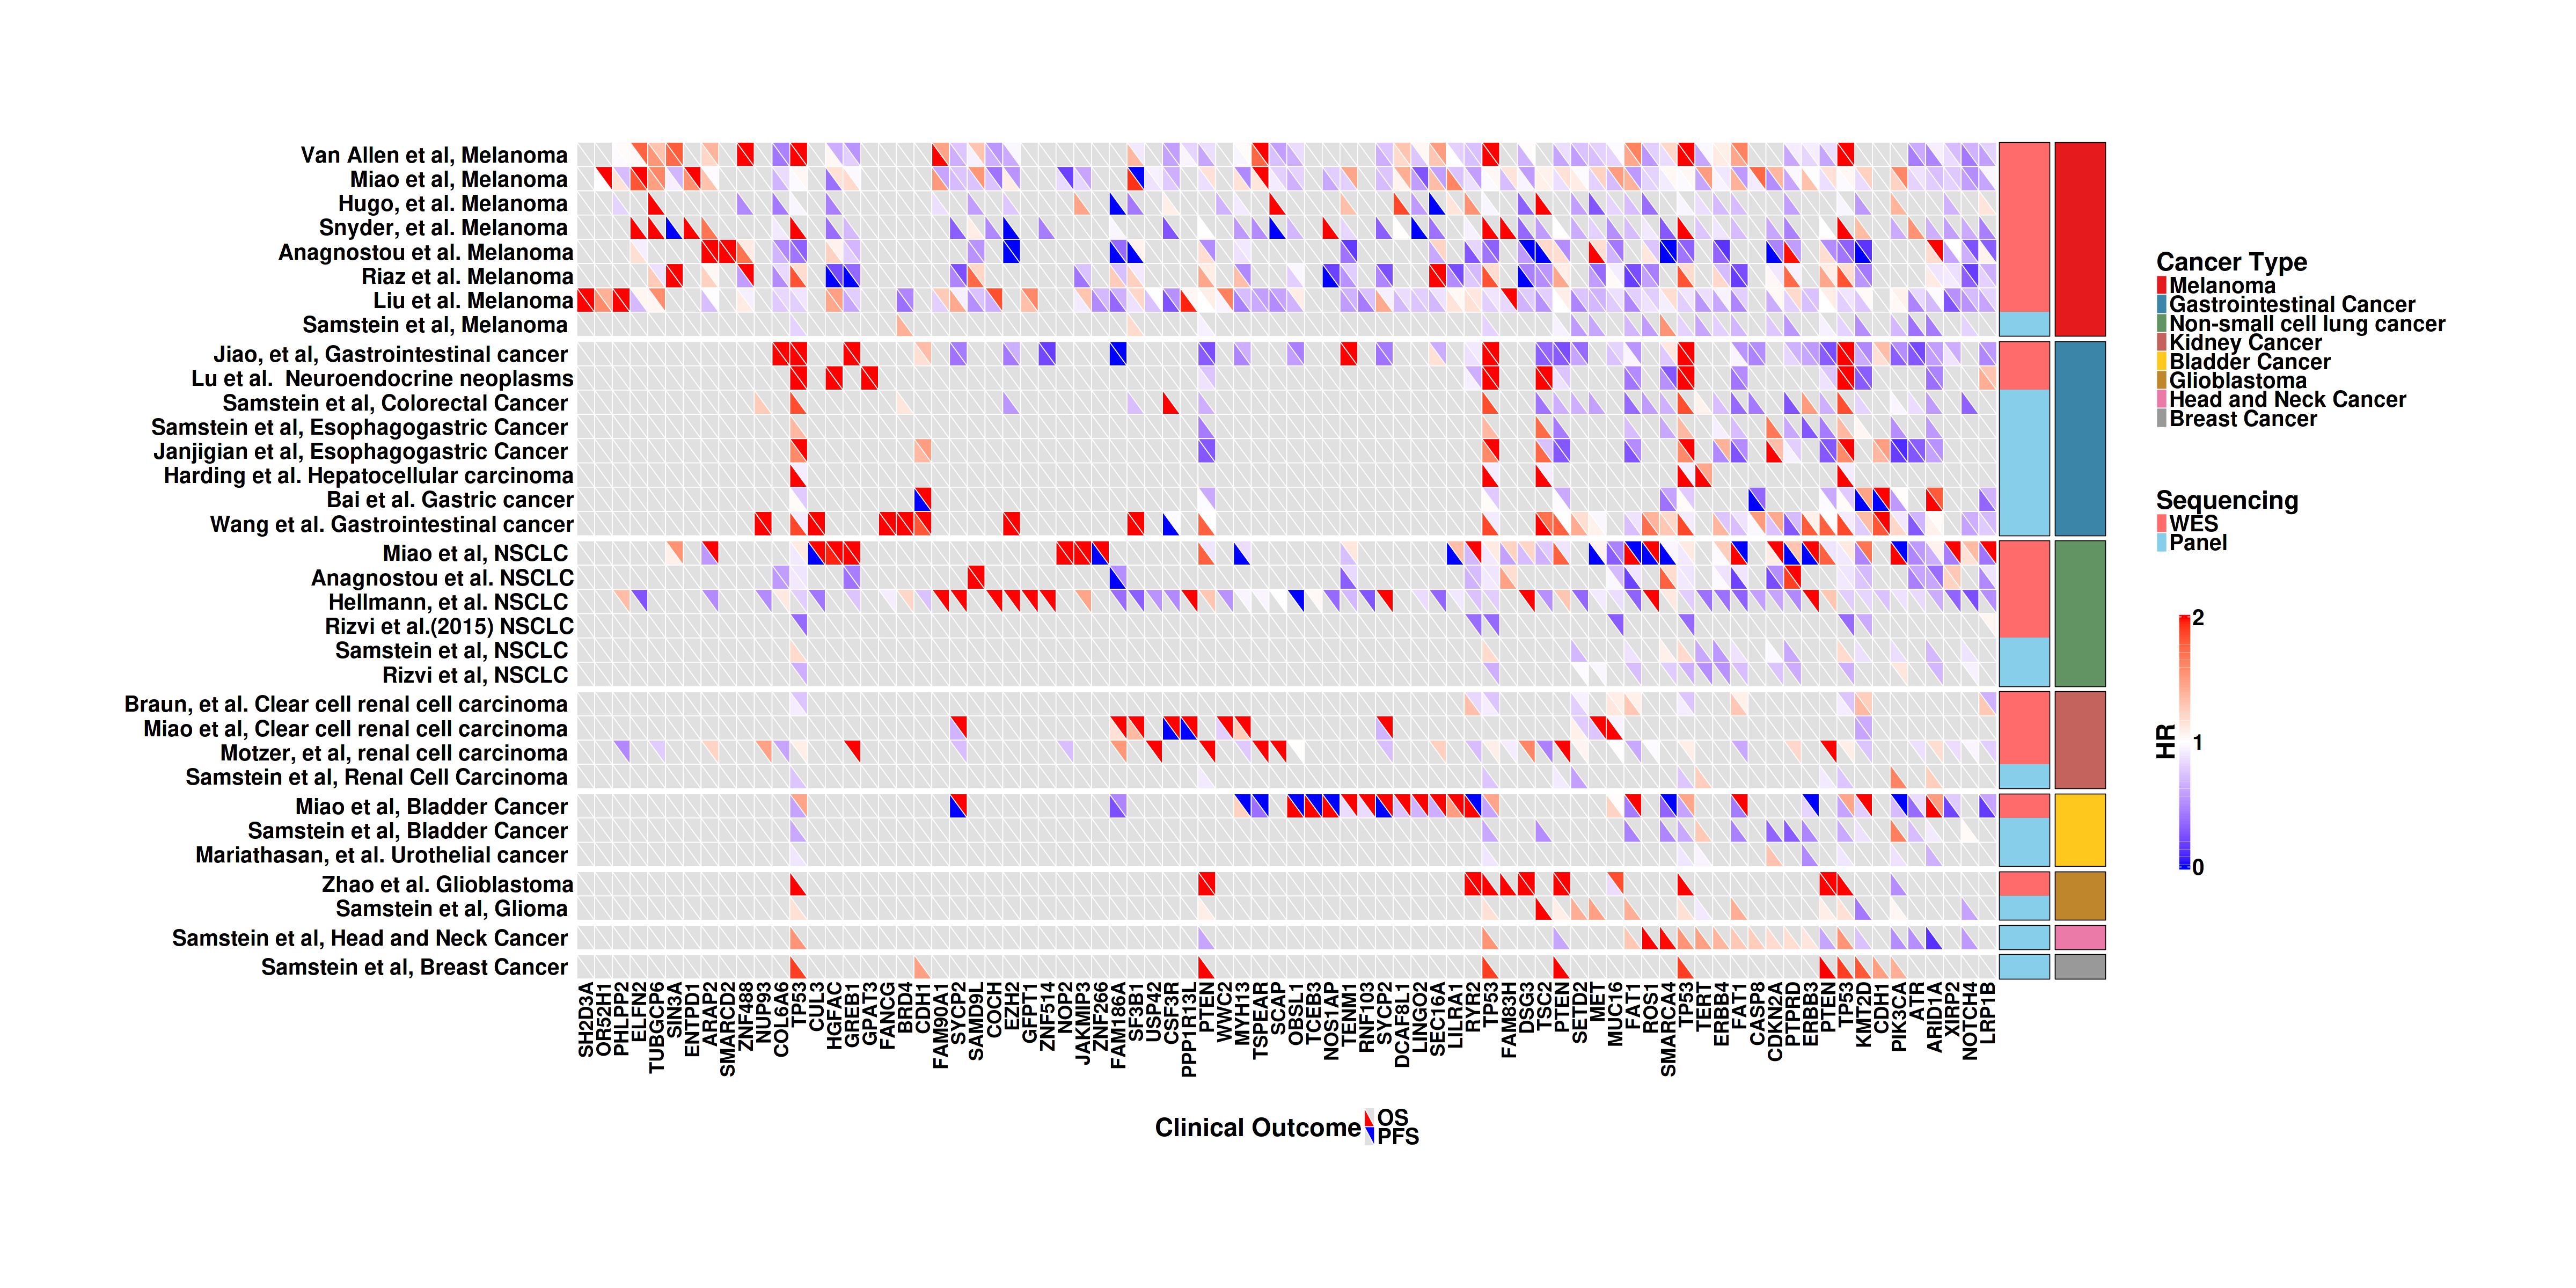

In [56]:
plot_complexheatmap3(C = C,OS_combind = OS_combind,PFS_combind = PFS_combind,nGene = 10)

In [57]:
pdf("Artical_Figure2/Figure 1/SNVSCORE_single_gene5.new.pdf",width = 40,height = 30)
plot_complexheatmap3(C = C,OS_combind = OS_combind,PFS_combind = PFS_combind,nGene = 10)
dev.off()

All mutation types: OS, PFS.

Colors are not defined for: OS, PFS. They won't be shown in the
barplots.



png 
  2

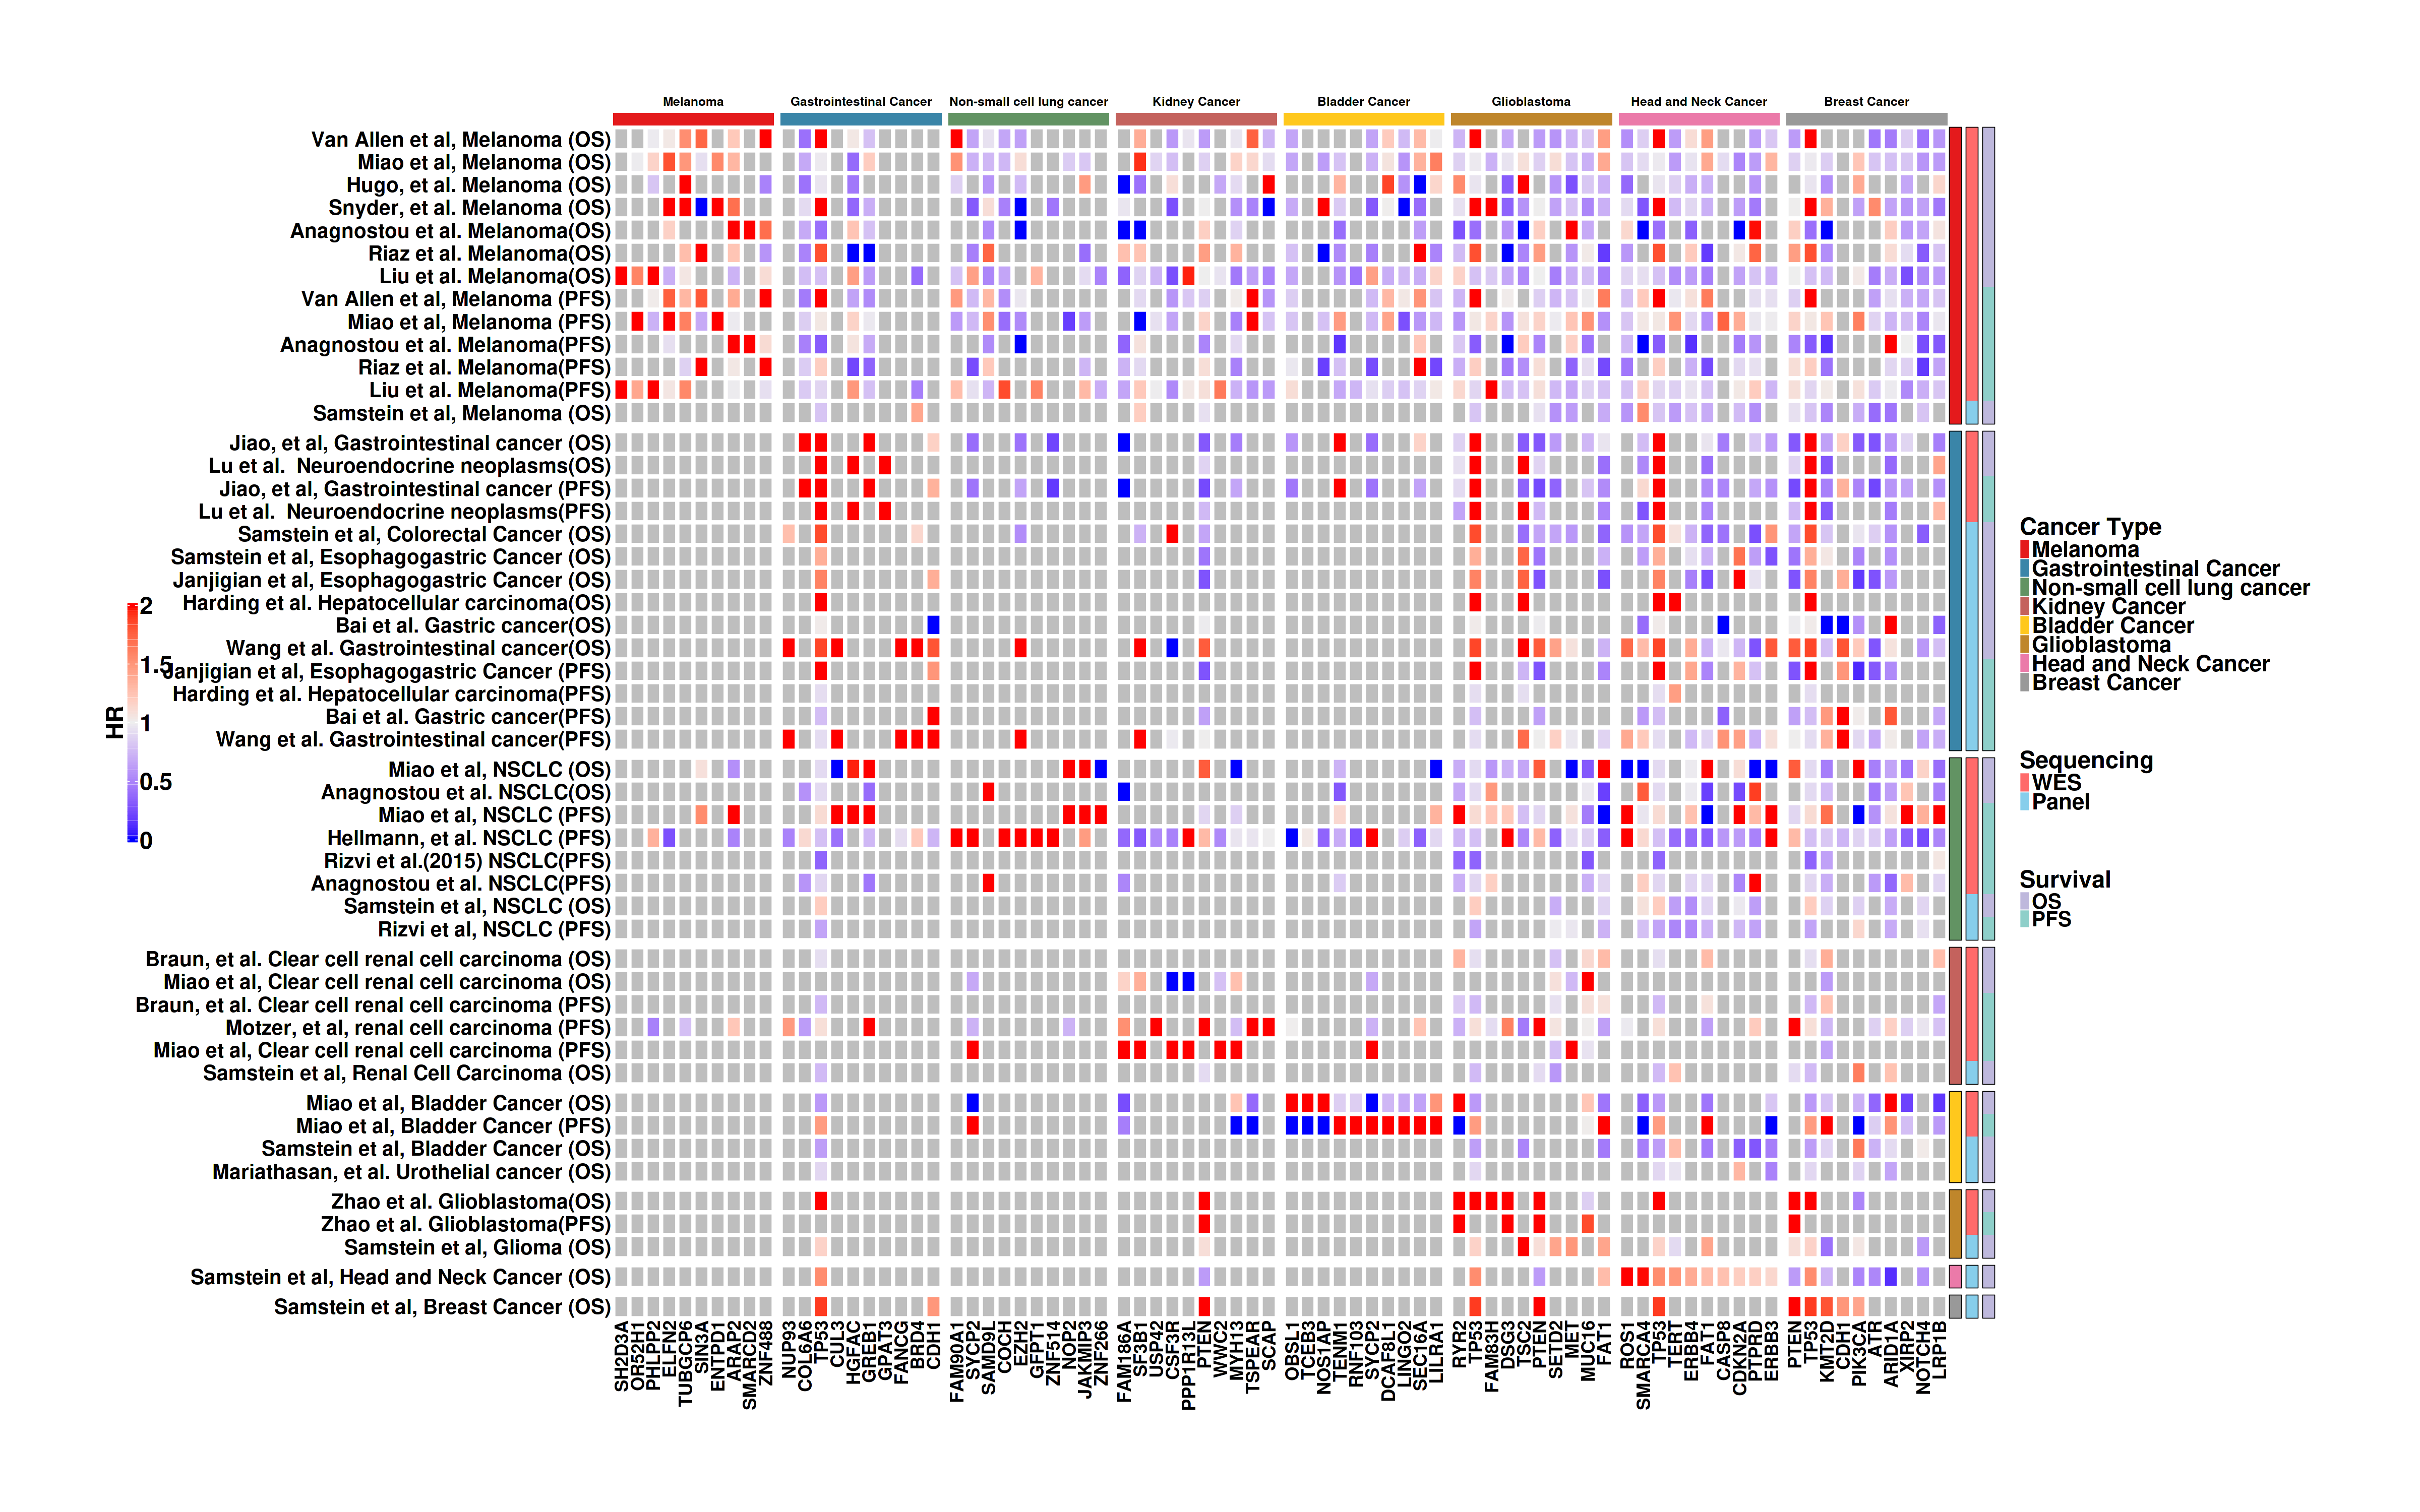

In [57]:
cancer_type =  c("Melanoma","Gastrointestinal Cancer","Non-small cell lung cancer","Kidney Cancer","Bladder Cancer",
                     "Glioblastoma","Head and Neck Cancer",
                     "Breast Cancer")

Cancer_specific_genes = vector()
for(i in cancer_type){
    tmp_A = RS_matrix_OS[unique(intersect(rownames(RS_matrix_OS),rownames(RS_matrix_PFS))),i]
    tmp_B = RS_matrix_PFS[unique(intersect(rownames(RS_matrix_OS),rownames(RS_matrix_PFS))),i]
    tmp_A[is.na(tmp_A)] = 0
    tmp_B[is.na(tmp_B)] = 0

    tmp_C = tmp_A+tmp_B
    names(tmp_C) = unique(intersect(rownames(RS_matrix_OS),rownames(RS_matrix_PFS)))

    tmp_C = sort(tmp_C,decreasing = T)
    
   Cancer_specific_genes = c(Cancer_specific_genes,names(tmp_C)[1:10]) #前十个
}

total_hm = vector()
total_meta = vector()

HR_matrix = reshape2::dcast(data = OS_combind[,c("dataset","HR(OS)","gene")],formula = dataset~gene,value.var = "HR(OS)")
rownames(HR_matrix) = HR_matrix$dataset
HR_matrix$dataset = NULL

HR_matrix = HR_matrix[ rownames(datasets_names)[ rownames(datasets_names) %in% rownames(HR_matrix)],]
rownames(HR_matrix) = datasets_names[rownames(HR_matrix),]

meta = datasets_overview[ datasets_overview$Cohort_name %in% rownames(HR_matrix),]
rownames(meta) = paste(meta$Cohort_name,"(","OS",")",sep="")
meta = meta[,c("Cancer_type","Immune_checkpoint_blockade","Sequencing","Cancer_type2")]
meta$Survival = "OS"
total_meta = rbind(total_meta,meta)

rownames(HR_matrix) = paste(rownames(HR_matrix),"(","OS",")",sep="")
hm = as.matrix(HR_matrix)[ ,Cancer_specific_genes]
hm[ hm > 2 ] = 2
hm = hm[order(meta$Sequencing,decreasing = T),]
# hm = hm[ rowSums(is.na(hm)) != ncol(hm),]
total_hm = rbind(total_hm,hm)
##########
HR_matrix = reshape2::dcast(data = PFS_combind[,c("dataset","HR(PFS)","gene")],formula = dataset~gene,value.var = "HR(PFS)")
rownames(HR_matrix) = HR_matrix$dataset
HR_matrix$dataset = NULL

HR_matrix = HR_matrix[ rownames(datasets_names)[ rownames(datasets_names) %in% rownames(HR_matrix)],]
rownames(HR_matrix) = datasets_names[rownames(HR_matrix),]

meta = datasets_overview[ datasets_overview$Cohort_name %in% rownames(HR_matrix),]
rownames(meta) = paste(meta$Cohort_name,"(","PFS",")",sep="")
meta = meta[,c("Cancer_type","Immune_checkpoint_blockade","Sequencing","Cancer_type2")]
meta$Survival = "PFS"
total_meta = rbind(total_meta,meta)


rownames(HR_matrix) = paste(rownames(HR_matrix),"(","PFS",")",sep="")
hm = as.matrix(HR_matrix)[ ,Cancer_specific_genes]
hm[ hm > 2 ] = 2
hm = hm[order(meta$Sequencing,decreasing = T),]
# hm = hm[ rowSums(is.na(hm)) != ncol(hm),]
total_hm = rbind(total_hm,hm)

total_meta = total_meta[order(total_meta$Survival,decreasing = F),]
total_meta = total_meta[order(total_meta$Sequencing,decreasing = T),]
total_hm = total_hm[rownames(total_meta),]

a = colorRampPalette(RColorBrewer::brewer.pal(9,"Set1"))(8)
names(a) = cancer_type

row_ha1 = HeatmapAnnotation(
    show_legend = F,
    which = "row",
    CancerType=total_meta[rownames(total_hm),"Cancer_type2"],
    Sequencing=factor(total_meta[rownames(total_hm),"Sequencing"],levels = c("WES","Panel")),
    Survival=factor(total_meta[rownames(total_hm),"Survival"],levels = c("OS","PFS")),
    col = list(CancerType = a,Sequencing = c("WES"="indianred1","Panel"="skyblue"),Survival = c("OS"="#BEB8DC","PFS"="#8ECFC9")),
    show_annotation_name = F,
    border = TRUE,
    gap = unit(2, "mm")
    
)

col_ha1 = HeatmapAnnotation(
    show_legend = F,
    which = "column",
    CancerType=unlist(lapply(cancer_type,function(x){rep(x,10)})),
    col = list(CancerType = a),
    show_annotation_name = F,
    annotation_legend_param  = list(
                                        title = "Cancer_Type", legend_height = unit(8, "cm"),
                                        title_gp = gpar(fontsize = 18,fontface = "bold"),
                                        labels_gp = gpar(fontsize = 18,fontface = "bold"),
                                        title_position = "leftcenter-rot"
                                   )
    
)

ht = Heatmap(as.matrix(total_hm),width = ncol(total_hm)*unit(7, "mm"),height = nrow(total_hm)*unit(10, "mm"),
             right_annotation = row_ha1,
#              heatmap_height = unit(20,"cm"),
#              heatmap_width = unit(40,"cm"),
             row_names_side = "left",
             column_names_side = "bottom",
             heatmap_legend_param = list(title = "HR", legend_height = unit(10, "cm"),
                                        title_gp = gpar(fontsize = 28,fontface = "bold"),
                                        labels_gp = gpar(fontsize = 28,fontface = "bold"),
                                        title_position = "leftcenter-rot"
    #                                     at = c( 0,0.25,0.5,0.75, 1)
                                       ),
             top_annotation = col_ha1,
#              row_split = factor(meta[rownames(hm),"Cancer_type2"],levels = c("Melanoma","Gastrointestinal Cancer","Urothelial Cancer","Renal Cell Carcinoma",
#                                                                             "Non-small cell lung cancer","Glioblastoma","Hepatocellular carcinoma","Head and Neck Cancer","Breast Cancer","Pan-cancer")),
             row_split = factor(total_meta[rownames(total_hm),"Cancer_type2"],levels = c("Melanoma","Gastrointestinal Cancer","Non-small cell lung cancer","Kidney Cancer","Bladder Cancer",
                                                                            "Glioblastoma","Head and Neck Cancer","Breast Cancer")),
             row_title = NULL,
             row_gap = unit(3, "mm"),
             column_split = factor(unlist(lapply(cancer_type,function(x){rep(x,10)})),levels = c("Melanoma","Gastrointestinal Cancer","Non-small cell lung cancer","Kidney Cancer","Bladder Cancer",
                                                                            "Glioblastoma","Head and Neck Cancer","Breast Cancer")),
             column_title_gp =  gpar(fontface = "bold",cex = 1.2),
             column_gap = unit(3, "mm"),
             
             row_names_max_width = max_text_width(rownames(total_hm),gp = gpar(fontsize = 12)),
             column_names_max_height = max_text_width(colnames(total_hm),gp = gpar(cex = 22)),
             row_names_gp = gpar(fontface = "bold",cex = 2),
             column_names_gp = gpar(fontface = "bold",cex = 1.8),
#         col = colorRamp2(c( 0,0.25,0.5,0.75, 1), c("#FFFFE5","#C7E9B4", "#41B6C4","#225EA8","#081D58")),
        cluster_rows = F,
        cluster_columns = F,
        rect_gp = gpar(col = "white", lwd = 5)
       )

l1 =  Legend(
        labels = cancer_type,
        title = "Cancer Type",
        legend_gp = gpar(fill = a,fontsize = 20),
        title_gp = gpar(col = "black", fontsize = 28,fontface="bold"),
        labels_gp = gpar(col = "black", fontsize = 26,fontface="bold")
    )
l2 = Legend(
        labels = c("WES","Panel"),
        title = "Sequencing",
        legend_gp = gpar(fill = c("indianred1","skyblue"),fontsize = 20),
        title_gp = gpar(col = "black", fontsize = 28,fontface="bold"),
        labels_gp = gpar(col = "black", fontsize = 26,fontface="bold")
    )

l3 = Legend(
                labels = c("OS","PFS"),
                title = "Survival",
                legend_gp = gpar(fill = c("#BEB8DC","#8ECFC9"),fontsize = 20),
                title_gp = gpar(col = "black", fontsize = 28,fontface="bold"),
                labels_gp = gpar(col = "black", fontsize = 24,fontface="bold")
        )

options(repr.plot.height = 25, repr.plot.width = 40)

ht_opt$HEATMAP_LEGEND_PADDING = unit(8, "cm")
ht_opt$ANNOTATION_LEGEND_PADDING = unit(0, "cm")
draw(ht ,
     heatmap_legend_side ="left",
     annotation_legend_side = "right",
     annotation_legend_list = packLegend(l1,l2,l3,row_gap = unit(2.5,"cm"),gap = unit(2.5,"cm"))
    )

In [58]:
pdf("Artical_Figure2/Figure 1/SNVSCORE_single_gene5.pdf",width = 40,height = 30)
ht_opt$HEATMAP_LEGEND_PADDING = unit(8, "cm")
ht_opt$ANNOTATION_LEGEND_PADDING = unit(0, "cm")
draw(ht ,
     heatmap_legend_side ="left",
     annotation_legend_side = "right",
     annotation_legend_list = packLegend(l1,l2,l3,row_gap = unit(2.5,"cm"),gap = unit(2.5,"cm"))
    )
dev.off()

png 
  2

In [59]:
n = 20
for(i in c("Melanoma","Gastrointestinal Cancer","Bladder Cancer","Kidney Cancer","Non-small cell lung cancer")){
    tmp_A = RS_matrix_OS[unique(intersect(rownames(RS_matrix_OS),rownames(RS_matrix_PFS))),i]
    tmp_B = RS_matrix_PFS[unique(intersect(rownames(RS_matrix_OS),rownames(RS_matrix_PFS))),i]
    tmp_A[is.na(tmp_A)] = 0
    tmp_B[is.na(tmp_B)] = 0

    tmp_C = tmp_A+tmp_B
    names(tmp_C) = unique(intersect(rownames(RS_matrix_OS),rownames(RS_matrix_PFS)))

    tmp_C = sort(tmp_C,decreasing = T)
    
    
    one_cancer_RS = data.frame(GeneSymbol = names(tmp_C),SNV_score = tmp_C)
    one_cancer_RS = one_cancer_RS[ c(rownames(one_cancer_RS)[1:n],
                 rownames(one_cancer_RS)[(nrow(one_cancer_RS)-n+1):nrow(one_cancer_RS)]),]
    one_cancer_RS$GeneSymbol = factor(one_cancer_RS$GeneSymbol,levels = one_cancer_RS$GeneSymbol)
    one_cancer_RS$hjust = NA
    one_cancer_RS$hjust[1:n] = 1.1
    one_cancer_RS$hjust[(n+1):(n*2)] = -0.1
    options(repr.plot.height = 8, repr.plot.width = 8)
    p = ggplot(one_cancer_RS)+
            ggtitle(i)+
            geom_bar(aes(x = GeneSymbol,y = SNV_score,fill = as.character(hjust)),stat = "identity",show.legend = F)+
            scale_fill_manual(values = c("darkblue", "maroon"))+
            coord_flip()+
            theme_void()+
            ylab("ImmuneSNVscore")+
            scale_x_discrete(expand = c(0.05,0))+
            ylim(-max(abs(one_cancer_RS$SNV_score)),max(abs(one_cancer_RS$SNV_score)))+
            geom_text(aes(x = GeneSymbol,y = 0,label = GeneSymbol,hjust = hjust),fontface ="bold",size = 4.5)+
            theme(axis.line.x = element_line(colour = "black",linetype = "solid",size = 1.5),
                  axis.title.x = element_text(face = "bold",size = 18),
                  plot.title = element_text(hjust = 0.5,face = "bold",size = 22),
                  axis.ticks.length.x = unit(2,"mm"),
                  axis.text.x = element_text(face = "bold",size = 14,vjust = 0),
                  axis.ticks.x = element_line(colour = "black",linetype = "solid",size = 1 ))
    pdf(paste("Artical_Figure2/Figure 1/SNVSCORE_single_gene_",i,".pdf",sep = ""),width = 10,height = 10)
    print(p)
    dev.off()
}

In [60]:
one_RS_matrix = vector()
n = 100
for(i in c("Melanoma","Gastrointestinal Cancer","Bladder Cancer","Kidney Cancer","Non-small cell lung cancer")){
    tmp_A = RS_matrix_OS[unique(intersect(rownames(RS_matrix_OS),rownames(RS_matrix_PFS))),i]
    tmp_B = RS_matrix_PFS[unique(intersect(rownames(RS_matrix_OS),rownames(RS_matrix_PFS))),i]
    tmp_A[is.na(tmp_A)] = 0
    tmp_B[is.na(tmp_B)] = 0

    tmp_C = tmp_A+tmp_B
    names(tmp_C) = unique(intersect(rownames(RS_matrix_OS),rownames(RS_matrix_PFS)))

    tmp_C = sort(tmp_C,decreasing = T)
    
    
    one_cancer_RS = data.frame(GeneSymbol = names(tmp_C),SNV_score = tmp_C)
    one_cancer_RS = one_cancer_RS[ c(rownames(one_cancer_RS)[1:n],
                 rownames(one_cancer_RS)[(nrow(one_cancer_RS)-n+1):nrow(one_cancer_RS)]),]
    one_cancer_RS$Cancer_type = i
    one_RS_matrix = rbind(one_RS_matrix,one_cancer_RS)
}

In [61]:
write.table(one_RS_matrix,file = "./Artical_Figure2/Figure 1/Single_Gene_Cancer_type_levels.txt",sep = "\t",row.names = F,col.names = T,quote = F)

### Prognostic genes for meta analysis

In [62]:
ref_cohort_cal = function(dataset,gene,dataset_mu,Mut_type,Wild_type){
  
  if("All" %in% Mut_type){
    
    mut = unique(dataset_mu$ID[
      dataset_mu$Hugo_Symbol == gene
    ])
  }else{
    
    
    mut = unique(dataset_mu$ID[
      dataset_mu$Hugo_Symbol == gene & 
        dataset_mu$Variant_Classification %in% Mut_type
    ])
    
    
  }
  
  if(Wild_type == "Others"){
    wt = setdiff(unique(c(dataset_mu$ID,rownames(dataset))),mut)
  }else{
    wt = setdiff(unique(c(dataset_mu$ID,rownames(dataset))),unique(dataset_mu$ID[dataset_mu$Hugo_Symbol == gene]))
  }
  
  return(list("mut"=mut,"wt"=wt))
  
}

#### OS

In [66]:
n1 = 10
n2 = 10
# genes = c(names(C)[1:10],names(C)[(length(C)-9):length(C)])

In [67]:
genes = c(  "ATR",
            "NOTCH4",
            "TTN",
            "OBSCN",
            "XIRP2",
            "FLNC",
            "AKAP9",
            "FAT1",
            "NRXN1",
            "LRP1B",
            "ZFHX3",
            "AHNAK",
            "ARID1A",
            "FMN2",
            "COL11A1",
            "ANK1",
            "KMT2D",
            "KRAS",
            "KDM6A",
            "PPP1R13L",
            "RAPGEF2",
            "HIF1A",
            "SIN3A",
            "TP53")


In [68]:
total_cochrane_from_rmeta = vector()
total_tabletext = vector()
for( g in genes ){
    
    library(forestplot)
    library(meta)
    gene_name = g

    cohort = vector()
    wildtype = vector()
    mutation = vector()
    HR_mean = vector()
    HR_lower = vector()
    HR_upper = vector()
    HR_text = vector()
    logtest = vector()
    waldtest = vector()
    for(i in setdiff(names(datasets),c("dataset1","dataset3","dataset6"))){
      tmp_cohort = ref_cohort_cal(dataset = datasets[[i]],gene = gene_name,dataset_mu = datasets_mu[[i]],Mut_type = "All",Wild_type = "Wiltype")
      if(length(tmp_cohort$mut) >= 3 & length(tmp_cohort$wt) >= 3 & ("OS_TIME" %in% colnames(datasets[[i]]))){
        
#         wildtype = c(wildtype,length(tmp_cohort$wt))
#         mutation = c(mutation,length(tmp_cohort$mut))

        tmp_data = datasets[[i]][,c("OS_TIME","OS_STATUS")]

        tmp_data$groups = NA
        tmp_data$groups[rownames(tmp_data) %in% tmp_cohort$mut] = "Mutation"
        tmp_data$groups[rownames(tmp_data) %in% tmp_cohort$wt] = "Wildtype"
        tmp_data$groups = factor(tmp_data$groups,levels = c("Wildtype","Mutation"))

        tmp_data = tmp_data[rowSums(is.na(tmp_data)) == 0,]
        if(table(tmp_data$groups)["Mutation"] >= 3 & table(tmp_data$groups)["Wildtype"] >= 3 ){
            cohort = c(cohort,dataset_name[i])
            wildtype = c(wildtype,table(tmp_data$groups)["Wildtype"])
            mutation = c(mutation,table(tmp_data$groups)["Mutation"])
            
            # fit <- do.call(survfit, list(Surv(OS_TIME,OS_STATUS)~groups,data = tmp_data))
            data.survdiff <- do.call(survdiff, list(Surv(OS_TIME,OS_STATUS)~groups,data = tmp_data))
            p.val = round(1 - pchisq(data.survdiff$chisq, length(data.survdiff$n) - 1),4)
            coxres <- do.call(coxph, list(Surv(OS_TIME,OS_STATUS)~groups,data = tmp_data))
            HR_mean = c(HR_mean,round(summary(coxres)$conf.int[,1],3))
            HR_lower = c(HR_lower,round(summary(coxres)$conf.int[,3],3))
            HR_upper = c(HR_upper,round(summary(coxres)$conf.int[,4],3))
            HR_text = c(HR_text,paste(round(summary(coxres)$conf.int[,1],3),"(",round(summary(coxres)$conf.int[,3],3),"-",round(summary(coxres)$conf.int[,4],3),")"))
            logtest = c(logtest,round(summary(coxres)$logtest[3],3))
            waldtest = c(waldtest,round(summary(coxres)$waldtest[3],3))
        }




      }
    }

    ord = order(HR_mean)
    tabletext = cbind(
                      c(NA,"Cohort",cohort[ord],"Common","Random"),
                      c(NA,"Wild type",wildtype[ord],sum(wildtype),sum(wildtype)),
                      c(NA,"Mutation",mutation[ord],sum(mutation),sum(mutation)),
                      c(NA,"HR(95%CI)",HR_text[ord],NA,NA),
    #                   c(NA,"P value(Log rank)",logtest[ord],NA),
                      c(NA,"P value(wald text)",waldtest[ord],NA,NA))
    cochrane_from_rmeta = data.frame("mean" = c(NA,NA,HR_mean[ord],NA,NA),"lower" = c(NA,NA,HR_lower[ord],NA,NA),"upper" = c(NA,NA,HR_upper[ord],NA,NA))

    tmp = cochrane_from_rmeta[3:(nrow(cochrane_from_rmeta)-2),]
    rownames(tmp) = tabletext[3:(nrow(cochrane_from_rmeta)-2),1]
    tmp$se = (log2(tmp$upper) - log2(tmp$lower))/(2*1.96)
    m = metagen(TE = log2(tmp$mean),seTE = tmp$se,studlab = rownames(tmp),sm = "HR",method.tau = "DL")
    k = summary(m)

    chtext = paste(round(exp(x = 1)^(k$common$TE),3),"[",round(exp(x = 1)^(k$common$lower),3),",",round(exp(x = 1)^(k$common$upper),3),"]")
    tabletext[nrow(tabletext)-1,4:5] = c(chtext,round(k$common$p,3))
    cochrane_from_rmeta[nrow(tabletext)-1,1:3] = c(round(exp(x = 1)^(k$common$TE),3),round(exp(x = 1)^(k$common$lower),3),round(exp(x = 1)^(k$common$upper),3))
    rhtext = paste(round(exp(x = 1)^(k$random$TE),3),"[",round(exp(x = 1)^(k$random$lower),3),",",round(exp(x = 1)^(k$random$upper),3),"]")
    tabletext[nrow(tabletext),4:5] = c(rhtext,round(k$random$p,3))
    cochrane_from_rmeta[nrow(tabletext),1:3] = c(round(exp(x = 1)^(k$random$TE),3),round(exp(x = 1)^(k$random$lower),3),round(exp(x = 1)^(k$random$upper),3))
    
    if(k$pval.Q < 0.1){
        total_cochrane_from_rmeta = rbind(total_cochrane_from_rmeta,cochrane_from_rmeta[nrow(tabletext),])
        total_tabletext = rbind(total_tabletext,c(gene_name,tabletext[nrow(tabletext),]))
    }else{
        total_cochrane_from_rmeta = rbind(total_cochrane_from_rmeta,cochrane_from_rmeta[nrow(tabletext)-1,])
        total_tabletext = rbind(total_tabletext,c(gene_name,tabletext[nrow(tabletext)-1,]))
    }    
}

total_tabletext = total_tabletext[,c(1,5,6)]
total_tabletext[,3][as.numeric(total_tabletext[,3]) < 0.001] = "< 0.001"
total_tabletext = rbind(c("Gene symbol","HR(95%CI)","P-meta"),total_tabletext)
total_cochrane_from_rmeta = rbind(c(NA,NA,NA),total_cochrane_from_rmeta)

Warning message in coxph.fit(X, Y, istrat, offset, init, control, weights = weights, :
“Loglik converged before variable  1 ; coefficient may be infinite. ”
Warning message in coxph.fit(X, Y, istrat, offset, init, control, weights = weights, :
“Loglik converged before variable  1 ; coefficient may be infinite. ”
Warning message in coxph.fit(X, Y, istrat, offset, init, control, weights = weights, :
“Loglik converged before variable  1 ; coefficient may be infinite. ”
Warning message in coxph.fit(X, Y, istrat, offset, init, control, weights = weights, :
“Loglik converged before variable  1 ; coefficient may be infinite. ”
Warning message in coxph.fit(X, Y, istrat, offset, init, control, weights = weights, :
“Loglik converged before variable  1 ; coefficient may be infinite. ”
Warning message in coxph.fit(X, Y, istrat, offset, init, control, weights = weights, :
“Loglik converged before variable  1 ; coefficient may be infinite. ”
Warning message in coxph.fit(X, Y, istrat, offset, init, c

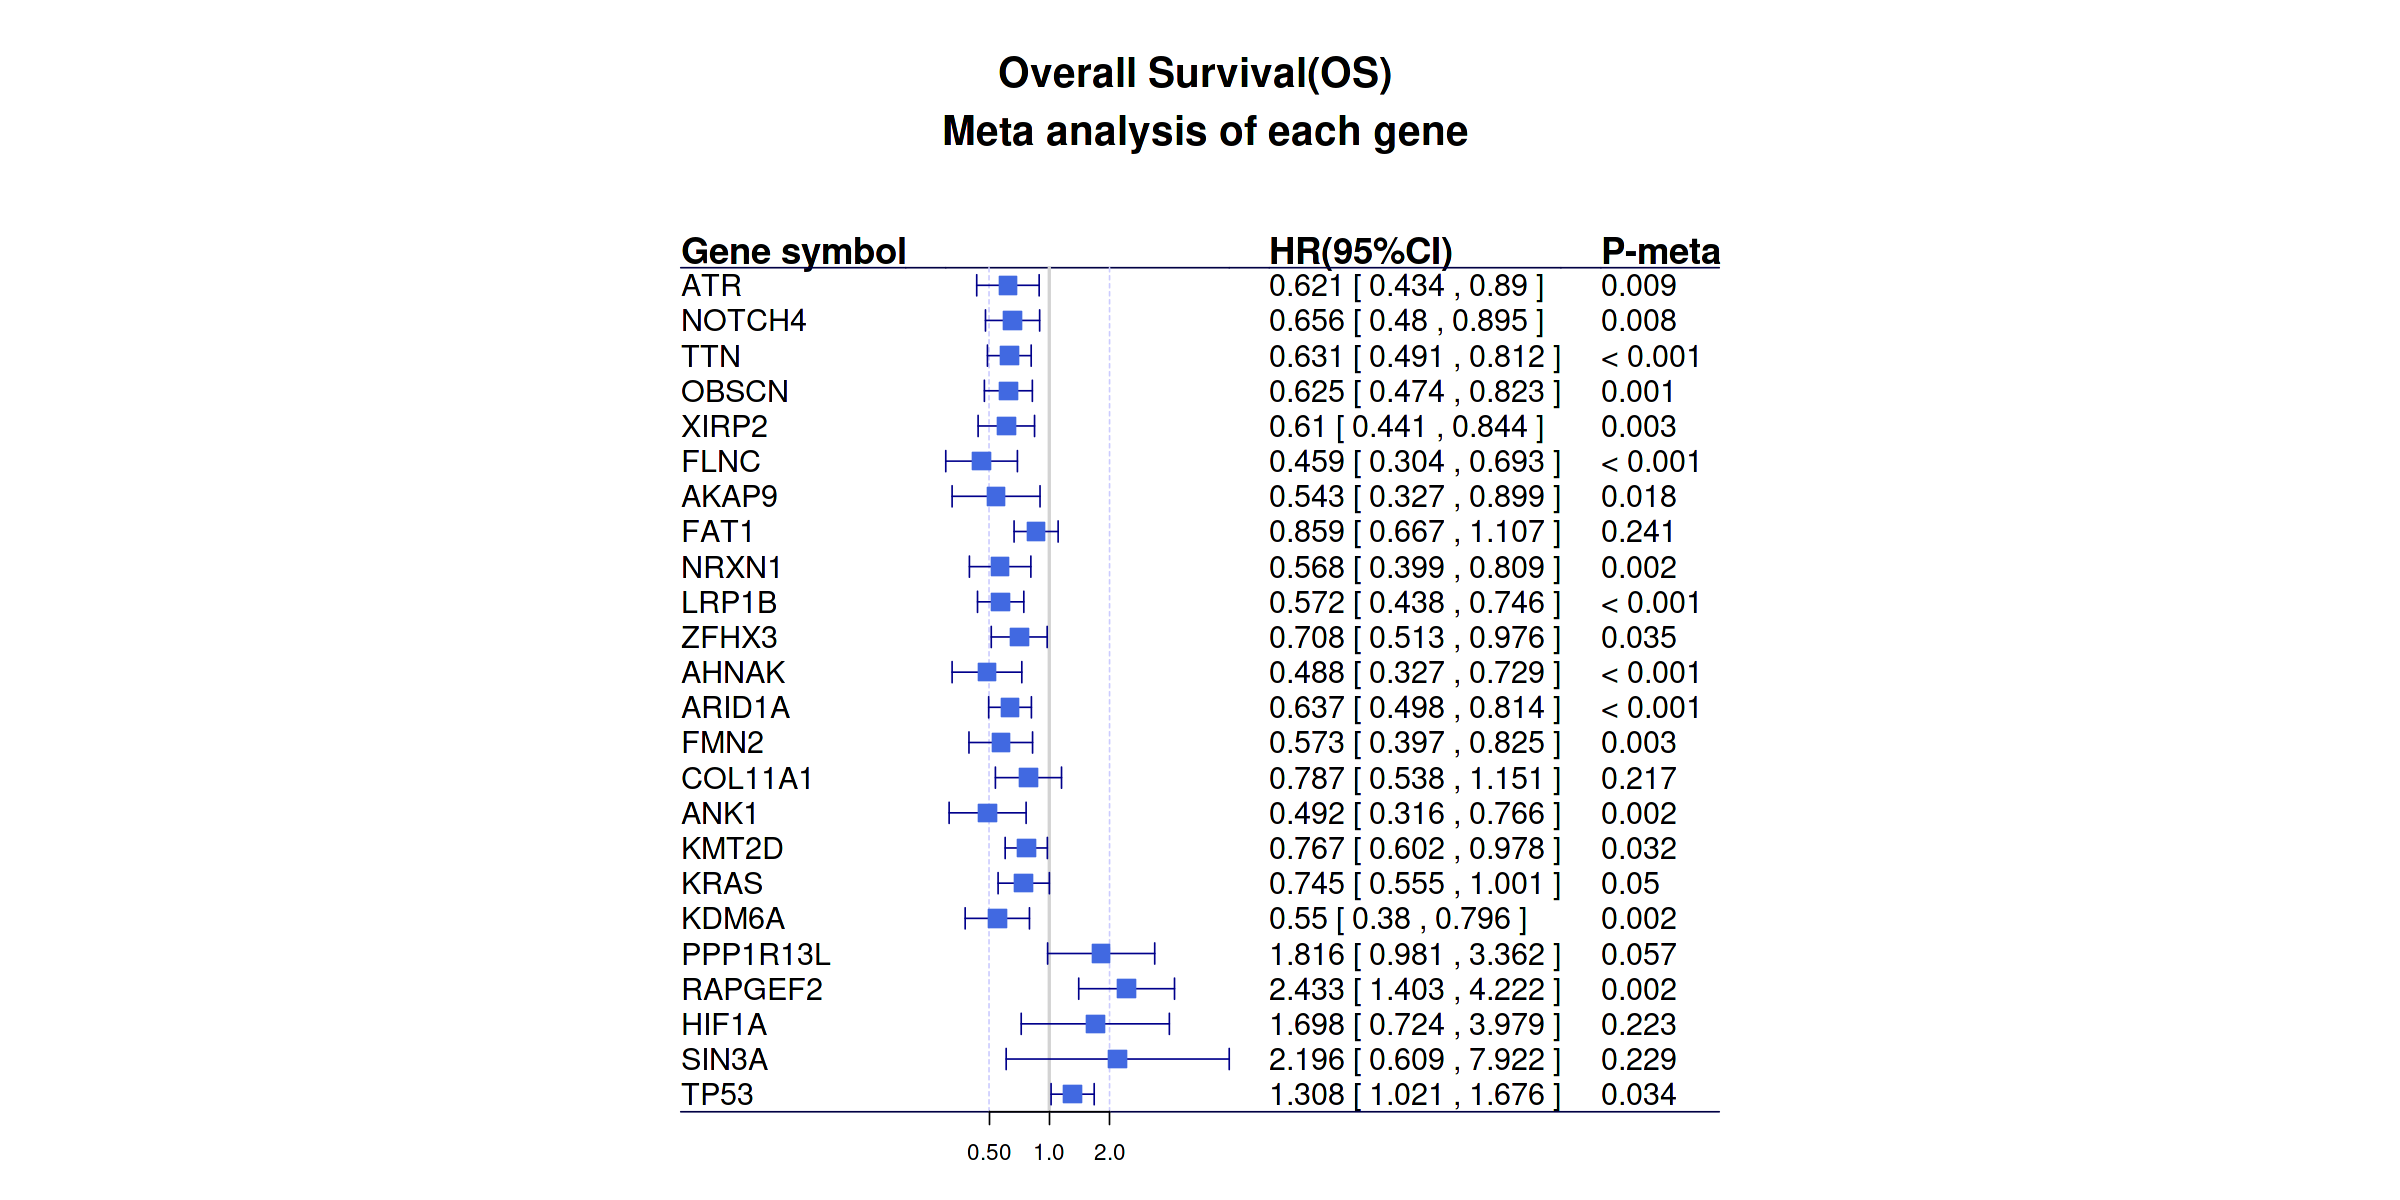

In [69]:
maxup = max(total_cochrane_from_rmeta$upper[!is.infinite(total_cochrane_from_rmeta$upper)],na.rm = T)
minlow = min(total_cochrane_from_rmeta$lower[total_cochrane_from_rmeta$lower != 0],na.rm = T)

    
options(repr.plot.height = 10, repr.plot.width = 20)

tmp_list = list()
tmp_list[["2"]] = gpar(col = "#000044")
tmp_list[[as.character(nrow(total_cochrane_from_rmeta) + 1)]] = gpar(col = "#000044")

p = total_cochrane_from_rmeta %>% 
       forestplot(labeltext = total_tabletext, clip = c(minlow-minlow/10,maxup+maxup/10),xticks = c(0.5,1,2),
                      lty.ci = 1,
                      ci.vertices.height = 0.3,
                     align="l",
                     graphwidth = unit(6,"cm"),
                     lwd.zero = gpar(lwd=2,lty=2),
                     grid = structure(c(0.5, 2), 
                            gp = gpar(lwd = 1,lty = 2, col = "#CCCCFF")),
                     boxsize = 0.5,
                     graph.pos = 2,
#                      zero = 1,
                     title = paste("Overall Survival(OS)","\n","Meta analysis of each gene"),
                     txt_gp = fpTxtGp(title = gpar(cex = 2),ticks=gpar(cex=1.1),summary=gpar(cex = 1.8),label = gpar(cex = 1.5)),
                     is.summary = c(rep(TRUE, 1), rep(FALSE, nrow(total_cochrane_from_rmeta)-1)),
                     xlog = TRUE, 
                     hrzl_lines = tmp_list,
                     vertices = TRUE,
                     col = fpColors(box = "royalblue",
                                    line = "darkblue",
                                    summary = "royalblue")
                     )
p

In [70]:
pdf(paste("Artical_Figure2/Figure 1/SNVSCORE_single_gene_meta_OS.pdf",sep = ""),width = 10,height = 10)
print(p)
dev.off()

png 
  2

In [71]:
genes = c(names(C)[1:100],names(C)[(length(C)-49):length(C)])

total_cochrane_from_rmeta = vector()
total_tabletext = vector()
for( g in genes ){
    
    library(forestplot)
    library(meta)
    gene_name = g

    cohort = vector()
    wildtype = vector()
    mutation = vector()
    HR_mean = vector()
    HR_lower = vector()
    HR_upper = vector()
    HR_text = vector()
    logtest = vector()
    waldtest = vector()
    for(i in setdiff(names(datasets),c("dataset1","dataset3","dataset6"))){
      tmp_cohort = ref_cohort_cal(dataset = datasets[[i]],gene = gene_name,dataset_mu = datasets_mu[[i]],Mut_type = "All",Wild_type = "Wiltype")
      if(length(tmp_cohort$mut) >= 3 & length(tmp_cohort$wt) >= 3 & ("OS_TIME" %in% colnames(datasets[[i]]))){
          
#         cohort = c(cohort,dataset_name[i])
#         wildtype = c(wildtype,length(tmp_cohort$wt))
#         mutation = c(mutation,length(tmp_cohort$mut))

        tmp_data = datasets[[i]][,c("OS_TIME","OS_STATUS")]

        tmp_data$groups = NA
        tmp_data$groups[rownames(tmp_data) %in% tmp_cohort$mut] = "Mutation"
        tmp_data$groups[rownames(tmp_data) %in% tmp_cohort$wt] = "Wildtype"
        tmp_data$groups = factor(tmp_data$groups,levels = c("Wildtype","Mutation"))

        tmp_data = tmp_data[rowSums(is.na(tmp_data)) == 0,]
        if(table(tmp_data$groups)["Mutation"] >= 3 & table(tmp_data$groups)["Wildtype"] >= 3 ){
            cohort = c(cohort,dataset_name[i])
            wildtype = c(wildtype,table(tmp_data$groups)["Wildtype"])
            mutation = c(mutation,table(tmp_data$groups)["Mutation"])
            
            # fit <- do.call(survfit, list(Surv(OS_TIME,OS_STATUS)~groups,data = tmp_data))
            data.survdiff <- do.call(survdiff, list(Surv(OS_TIME,OS_STATUS)~groups,data = tmp_data))
            p.val = round(1 - pchisq(data.survdiff$chisq, length(data.survdiff$n) - 1),4)
            coxres <- do.call(coxph, list(Surv(OS_TIME,OS_STATUS)~groups,data = tmp_data))
            HR_mean = c(HR_mean,round(summary(coxres)$conf.int[,1],3))
            HR_lower = c(HR_lower,round(summary(coxres)$conf.int[,3],3))
            HR_upper = c(HR_upper,round(summary(coxres)$conf.int[,4],3))
            HR_text = c(HR_text,paste(round(summary(coxres)$conf.int[,1],3),"(",round(summary(coxres)$conf.int[,3],3),"-",round(summary(coxres)$conf.int[,4],3),")"))
            logtest = c(logtest,round(summary(coxres)$logtest[3],3))
            waldtest = c(waldtest,round(summary(coxres)$waldtest[3],3))
            
        }




      }
    }

    ord = order(HR_mean)
    tabletext = cbind(
                      c(NA,"Cohort",cohort[ord],"Common","Random"),
                      c(NA,"Wild type",wildtype[ord],sum(wildtype),sum(wildtype)),
                      c(NA,"Mutation",mutation[ord],sum(mutation),sum(mutation)),
                      c(NA,"HR(95%CI)",HR_text[ord],NA,NA),
    #                   c(NA,"P value(Log rank)",logtest[ord],NA),
                      c(NA,"P value(wald text)",waldtest[ord],NA,NA))
    cochrane_from_rmeta = data.frame("mean" = c(NA,NA,HR_mean[ord],NA,NA),"lower" = c(NA,NA,HR_lower[ord],NA,NA),"upper" = c(NA,NA,HR_upper[ord],NA,NA))

    tmp = cochrane_from_rmeta[3:(nrow(cochrane_from_rmeta)-2),]
    rownames(tmp) = tabletext[3:(nrow(cochrane_from_rmeta)-2),1]
    tmp$se = (log2(tmp$upper) - log2(tmp$lower))/(2*1.96)
    m = metagen(TE = log2(tmp$mean),seTE = tmp$se,studlab = rownames(tmp),sm = "HR",method.tau = "DL")
    k = summary(m)

    if(is.na(k$pval.Q)){
        total_tabletext = rbind(total_tabletext,c(gene_name,rep("--",5),nrow(tmp)))
    }else{
            chtext = paste(round(exp(x = 1)^(k$common$TE),3),"[",round(exp(x = 1)^(k$common$lower),3),",",round(exp(x = 1)^(k$common$upper),3),"]")
            tabletext[nrow(tabletext)-1,4:5] = c(chtext,round(k$common$p,3))
            cochrane_from_rmeta[nrow(tabletext)-1,1:3] = c(round(exp(x = 1)^(k$common$TE),3),round(exp(x = 1)^(k$common$lower),3),round(exp(x = 1)^(k$common$upper),3))
            rhtext = paste(round(exp(x = 1)^(k$random$TE),3),"[",round(exp(x = 1)^(k$random$lower),3),",",round(exp(x = 1)^(k$random$upper),3),"]")
            tabletext[nrow(tabletext),4:5] = c(rhtext,round(k$random$p,3))
            cochrane_from_rmeta[nrow(tabletext),1:3] = c(round(exp(x = 1)^(k$random$TE),3),round(exp(x = 1)^(k$random$lower),3),round(exp(x = 1)^(k$random$upper),3))

            if(k$pval.Q < 0.1){
                total_cochrane_from_rmeta = rbind(total_cochrane_from_rmeta,cochrane_from_rmeta[nrow(tabletext),])
                total_tabletext = rbind(total_tabletext,c(gene_name,tabletext[nrow(tabletext),],nrow(tmp)))
            }else{
                total_cochrane_from_rmeta = rbind(total_cochrane_from_rmeta,cochrane_from_rmeta[nrow(tabletext)-1,])
                total_tabletext = rbind(total_tabletext,c(gene_name,tabletext[nrow(tabletext)-1,],nrow(tmp)))
            }  
    }
  
}

# total_tabletext = total_tabletext[,c(1,5,6)]
# total_tabletext[,3][as.numeric(total_tabletext[,3]) < 0.001] = "< 0.001"
# total_tabletext = rbind(c("Gene symbol","HR(95%CI)","P-meta"),total_tabletext)
# total_cochrane_from_rmeta = rbind(c(NA,NA,NA),total_cochrane_from_rmeta)

Warning message in coxph.fit(X, Y, istrat, offset, init, control, weights = weights, :
“Loglik converged before variable  1 ; coefficient may be infinite. ”
Warning message in coxph.fit(X, Y, istrat, offset, init, control, weights = weights, :
“Loglik converged before variable  1 ; coefficient may be infinite. ”
Warning message in coxph.fit(X, Y, istrat, offset, init, control, weights = weights, :
“Loglik converged before variable  1 ; coefficient may be infinite. ”
Warning message in coxph.fit(X, Y, istrat, offset, init, control, weights = weights, :
“Loglik converged before variable  1 ; coefficient may be infinite. ”
Warning message in coxph.fit(X, Y, istrat, offset, init, control, weights = weights, :
“Loglik converged before variable  1 ; coefficient may be infinite. ”
Warning message in coxph.fit(X, Y, istrat, offset, init, control, weights = weights, :
“Loglik converged before variable  1 ; coefficient may be infinite. ”
Warning message in coxph.fit(X, Y, istrat, offset, init, c

Warning message in coxph.fit(X, Y, istrat, offset, init, control, weights = weights, :
“Loglik converged before variable  1 ; coefficient may be infinite. ”
Warning message in coxph.fit(X, Y, istrat, offset, init, control, weights = weights, :
“Loglik converged before variable  1 ; coefficient may be infinite. ”
Warning message in coxph.fit(X, Y, istrat, offset, init, control, weights = weights, :
“Loglik converged before variable  1 ; coefficient may be infinite. ”
Warning message in coxph.fit(X, Y, istrat, offset, init, control, weights = weights, :
“Loglik converged before variable  1 ; coefficient may be infinite. ”
Warning message in coxph.fit(X, Y, istrat, offset, init, control, weights = weights, :
“Loglik converged before variable  1 ; coefficient may be infinite. ”
Warning message in coxph.fit(X, Y, istrat, offset, init, control, weights = weights, :
“Loglik converged before variable  1 ; coefficient may be infinite. ”
Warning message in coxph.fit(X, Y, istrat, offset, init, c

Warning message in coxph.fit(X, Y, istrat, offset, init, control, weights = weights, :
“Loglik converged before variable  1 ; coefficient may be infinite. ”
Warning message in coxph.fit(X, Y, istrat, offset, init, control, weights = weights, :
“Loglik converged before variable  1 ; coefficient may be infinite. ”
Warning message in coxph.fit(X, Y, istrat, offset, init, control, weights = weights, :
“Loglik converged before variable  1 ; coefficient may be infinite. ”
Warning message in coxph.fit(X, Y, istrat, offset, init, control, weights = weights, :
“Loglik converged before variable  1 ; coefficient may be infinite. ”
Warning message in coxph.fit(X, Y, istrat, offset, init, control, weights = weights, :
“Loglik converged before variable  1 ; coefficient may be infinite. ”
Warning message in coxph.fit(X, Y, istrat, offset, init, control, weights = weights, :
“Loglik converged before variable  1 ; coefficient may be infinite. ”
Warning message in coxph.fit(X, Y, istrat, offset, init, c

In [72]:
total_tabletext = cbind(total_tabletext,C[genes])
colnames(total_tabletext) = c("Gene Symbol","Meta model(OS)","Mutation","Wildtype","HR[95%CI,OS]","P-meta(OS)","Num of datasets(OS)","SNVscore")
OS_total_tabletext = total_tabletext

#### PFS

In [73]:
n1 = 10
n2 = 10
# genes = c(names(C)[1:10],names(C)[(length(C)-9):length(C)])

genes = c(  "ATR",
            "NOTCH4",
            "TTN",
            "OBSCN",
            "XIRP2",
            "FLNC",
            "AKAP9",
            "FAT1",
            "NRXN1",
            "LRP1B",
            "ZFHX3",
            "AHNAK",
            "ARID1A",
            "FMN2",
            "COL11A1",
            "ANK1",
            "KMT2D",
            "KRAS",
            "KDM6A",
            "PPP1R13L",
            "RAPGEF2",
            "HIF1A",
            "SIN3A",
            "TP53")

In [74]:
total_cochrane_from_rmeta = vector()
total_tabletext = vector()
for( g in genes ){
    
    gene_name = g

    cohort = vector()
    wildtype = vector()
    mutation = vector()
    HR_mean = vector()
    HR_lower = vector()
    HR_upper = vector()
    HR_text = vector()
    logtest = vector()
    waldtest = vector()
    for(i in setdiff(names(datasets),c("dataset1","dataset3","dataset6"))){
      tmp_cohort = ref_cohort_cal(dataset = datasets[[i]],gene = gene_name,dataset_mu = datasets_mu[[i]],Mut_type = "All",Wild_type = "Wiltype")
      if(length(tmp_cohort$mut) >=3 & length(tmp_cohort$wt) >= 3 & ("PFS_TIME" %in% colnames(datasets[[i]]))){
#         cohort = c(cohort,dataset_name[i])
#         wildtype = c(wildtype,length(tmp_cohort$wt))
#         mutation = c(mutation,length(tmp_cohort$mut))

        tmp_data = datasets[[i]][,c("PFS_TIME","PFS_STATUS")]

        tmp_data$groups = NA
        tmp_data$groups[rownames(tmp_data) %in% tmp_cohort$mut] = "Mutation"
        tmp_data$groups[rownames(tmp_data) %in% tmp_cohort$wt] = "Wildtype"
        tmp_data$groups = factor(tmp_data$groups,levels = c("Wildtype","Mutation"))

          
        tmp_data = tmp_data[rowSums(is.na(tmp_data)) == 0,]
        if(table(tmp_data$groups)["Mutation"] >= 3 & table(tmp_data$groups)["Wildtype"] >= 3 ){
            cohort = c(cohort,dataset_name[i])
            wildtype = c(wildtype,table(tmp_data$groups)["Wildtype"])
            mutation = c(mutation,table(tmp_data$groups)["Mutation"])
            
            # fit <- do.call(survfit, list(Surv(OS_TIME,OS_STATUS)~groups,data = tmp_data))
            data.survdiff <- do.call(survdiff, list(Surv(PFS_TIME,PFS_STATUS)~groups,data = tmp_data))
            p.val = round(1 - pchisq(data.survdiff$chisq, length(data.survdiff$n) - 1),4)
            coxres <- do.call(coxph, list(Surv(PFS_TIME,PFS_STATUS)~groups,data = tmp_data))
            HR_mean = c(HR_mean,round(summary(coxres)$conf.int[,1],3))
            HR_lower = c(HR_lower,round(summary(coxres)$conf.int[,3],3))
            HR_upper = c(HR_upper,round(summary(coxres)$conf.int[,4],3))
            HR_text = c(HR_text,paste(round(summary(coxres)$conf.int[,1],3),"(",round(summary(coxres)$conf.int[,3],3),"-",round(summary(coxres)$conf.int[,4],3),")"))
            logtest = c(logtest,round(summary(coxres)$logtest[3],3))
            waldtest = c(waldtest,round(summary(coxres)$waldtest[3],3))  
            
            
        }




      }
    }

    ord = order(HR_mean)
    tabletext = cbind(
                      c(NA,"Cohort",cohort[ord],"Common","Random"),
                      c(NA,"Wild type",wildtype[ord],sum(wildtype),sum(wildtype)),
                      c(NA,"Mutation",mutation[ord],sum(mutation),sum(mutation)),
                      c(NA,"HR(95%CI)",HR_text[ord],NA,NA),
    #                   c(NA,"P value(Log rank)",logtest[ord],NA),
                      c(NA,"P value(wald text)",waldtest[ord],NA,NA))
    cochrane_from_rmeta = data.frame("mean" = c(NA,NA,HR_mean[ord],NA,NA),"lower" = c(NA,NA,HR_lower[ord],NA,NA),"upper" = c(NA,NA,HR_upper[ord],NA,NA))

    tmp = cochrane_from_rmeta[3:(nrow(cochrane_from_rmeta)-2),]
    rownames(tmp) = tabletext[3:(nrow(cochrane_from_rmeta)-2),1]
    tmp$se = (log2(tmp$upper) - log2(tmp$lower))/(2*1.96)
    m = metagen(TE = log2(tmp$mean),seTE = tmp$se,studlab = rownames(tmp),sm = "HR",method.tau = "DL")
    k = summary(m)

    chtext = paste(round(exp(x = 1)^(k$common$TE),3),"[",round(exp(x = 1)^(k$common$lower),3),",",round(exp(x = 1)^(k$common$upper),3),"]")
    tabletext[nrow(tabletext)-1,4:5] = c(chtext,round(k$common$p,3))
    cochrane_from_rmeta[nrow(tabletext)-1,1:3] = c(round(exp(x = 1)^(k$common$TE),3),round(exp(x = 1)^(k$common$lower),3),round(exp(x = 1)^(k$common$upper),3))
    rhtext = paste(round(exp(x = 1)^(k$random$TE),3),"[",round(exp(x = 1)^(k$random$lower),3),",",round(exp(x = 1)^(k$random$upper),3),"]")
    tabletext[nrow(tabletext),4:5] = c(rhtext,round(k$random$p,3))
    cochrane_from_rmeta[nrow(tabletext),1:3] = c(round(exp(x = 1)^(k$random$TE),3),round(exp(x = 1)^(k$random$lower),3),round(exp(x = 1)^(k$random$upper),3))

    if(k$pval.Q < 0.1){
        total_cochrane_from_rmeta = rbind(total_cochrane_from_rmeta,cochrane_from_rmeta[nrow(tabletext),])
        total_tabletext = rbind(total_tabletext,c(gene_name,tabletext[nrow(tabletext),]))
    }else{
        total_cochrane_from_rmeta = rbind(total_cochrane_from_rmeta,cochrane_from_rmeta[nrow(tabletext)-1,])
        total_tabletext = rbind(total_tabletext,c(gene_name,tabletext[nrow(tabletext)-1,]))
    }    
}

total_tabletext = total_tabletext[,c(1,5,6)]
total_tabletext[,3][as.numeric(total_tabletext[,3]) < 0.001] = "< 0.001"
total_tabletext = rbind(c("Gene symbol","HR(95%CI)","P-meta"),total_tabletext)
total_cochrane_from_rmeta = rbind(c(NA,NA,NA),total_cochrane_from_rmeta)

Warning message in coxph.fit(X, Y, istrat, offset, init, control, weights = weights, :
“Loglik converged before variable  1 ; coefficient may be infinite. ”
Warning message in coxph.fit(X, Y, istrat, offset, init, control, weights = weights, :
“Loglik converged before variable  1 ; coefficient may be infinite. ”
Warning message in coxph.fit(X, Y, istrat, offset, init, control, weights = weights, :
“Loglik converged before variable  1 ; coefficient may be infinite. ”
Warning message in coxph.fit(X, Y, istrat, offset, init, control, weights = weights, :
“Loglik converged before variable  1 ; coefficient may be infinite. ”
Warning message in coxph.fit(X, Y, istrat, offset, init, control, weights = weights, :
“Loglik converged before variable  1 ; coefficient may be infinite. ”
Warning message in coxph.fit(X, Y, istrat, offset, init, control, weights = weights, :
“Loglik converged before variable  1 ; coefficient may be infinite. ”
Warning message in coxph.fit(X, Y, istrat, offset, init, c

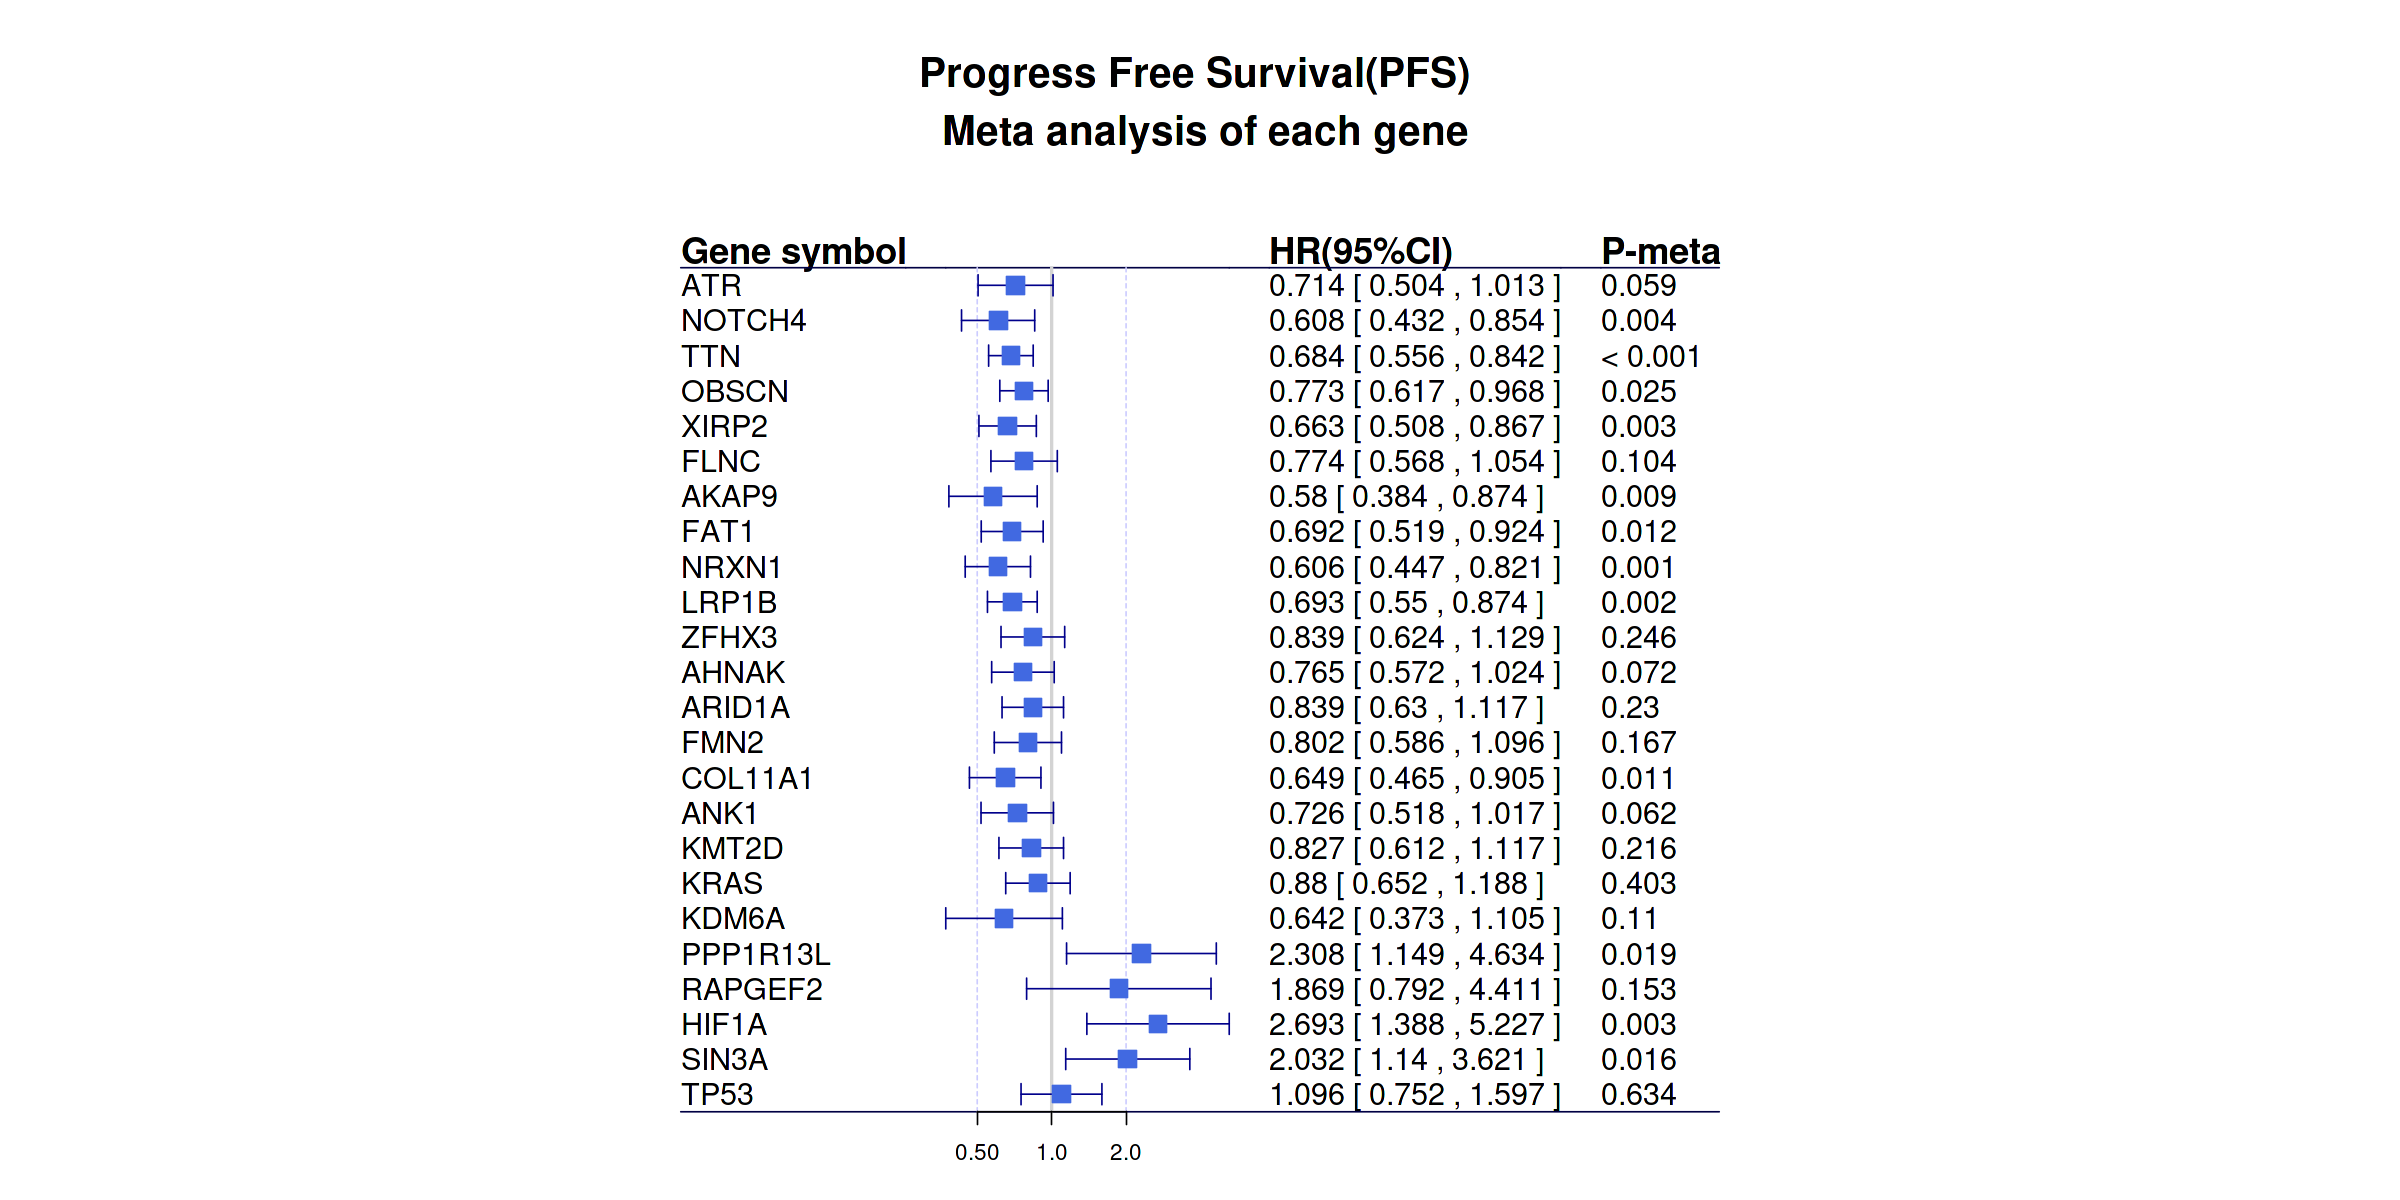

In [75]:
maxup = max(total_cochrane_from_rmeta$upper[!is.infinite(total_cochrane_from_rmeta$upper)],na.rm = T)
minlow = min(total_cochrane_from_rmeta$lower[total_cochrane_from_rmeta$lower != 0],na.rm = T)

    
options(repr.plot.height = 10, repr.plot.width = 20)

tmp_list = list()
tmp_list[["2"]] = gpar(col = "#000044")
tmp_list[[as.character(nrow(total_cochrane_from_rmeta) + 1)]] = gpar(col = "#000044")

p = total_cochrane_from_rmeta %>% 
       forestplot(labeltext = total_tabletext, clip = c(minlow-minlow/10,maxup+maxup/10),xticks = c(0.5,1,2),
                      lty.ci = 1,
                      ci.vertices.height = 0.3,
                     align="l",
                     graphwidth = unit(6,"cm"),
                     lwd.zero = gpar(lwd=2,lty=2),
                     grid = structure(c(0.5, 2), 
                            gp = gpar(lwd = 1,lty = 2, col = "#CCCCFF")),
                     boxsize = 0.5,
                     graph.pos = 2,
#                      zero = 1,
                     title = paste("Progress Free Survival(PFS)","\n","Meta analysis of each gene"),
                     txt_gp = fpTxtGp(title = gpar(cex = 2),ticks=gpar(cex=1.1),summary=gpar(cex = 1.8),label = gpar(cex = 1.5)),
                     is.summary = c(rep(TRUE, 1), rep(FALSE, nrow(total_cochrane_from_rmeta)-1)),
                     xlog = TRUE, 
                     hrzl_lines = tmp_list,
                     vertices = TRUE,
                     col = fpColors(box = "royalblue",
                                    line = "darkblue",
                                    summary = "royalblue")
                     )
p

In [76]:
pdf(paste("Artical_Figure2/Figure 1/SNVSCORE_single_gene_meta_PFS.pdf",sep = ""),width = 10,height = 10)
print(p)
dev.off()

png 
  2

In [77]:
genes = c(names(C)[1:100],names(C)[(length(C)-49):length(C)])
total_cochrane_from_rmeta = vector()
total_tabletext = vector()
for( g in genes ){
    
    gene_name = g

    cohort = vector()
    wildtype = vector()
    mutation = vector()
    HR_mean = vector()
    HR_lower = vector()
    HR_upper = vector()
    HR_text = vector()
    logtest = vector()
    waldtest = vector()
    for(i in setdiff(names(datasets),c("dataset1","dataset3","dataset6"))){
      tmp_cohort = ref_cohort_cal(dataset = datasets[[i]],gene = gene_name,dataset_mu = datasets_mu[[i]],Mut_type = "All",Wild_type = "Wiltype")
      if(length(tmp_cohort$mut) >=3 & length(tmp_cohort$wt) >= 3 & ("PFS_TIME" %in% colnames(datasets[[i]]))){
#         cohort = c(cohort,dataset_name[i])
#         wildtype = c(wildtype,length(tmp_cohort$wt))
#         mutation = c(mutation,length(tmp_cohort$mut))

        tmp_data = datasets[[i]][,c("PFS_TIME","PFS_STATUS")]

        tmp_data$groups = NA
        tmp_data$groups[rownames(tmp_data) %in% tmp_cohort$mut] = "Mutation"
        tmp_data$groups[rownames(tmp_data) %in% tmp_cohort$wt] = "Wildtype"
        tmp_data$groups = factor(tmp_data$groups,levels = c("Wildtype","Mutation"))

        tmp_data = tmp_data[rowSums(is.na(tmp_data)) == 0,]
        if(table(tmp_data$groups)["Mutation"] >= 3 & table(tmp_data$groups)["Wildtype"] >= 3 ){
            cohort = c(cohort,dataset_name[i])
            wildtype = c(wildtype,table(tmp_data$groups)["Wildtype"])
            mutation = c(mutation,table(tmp_data$groups)["Mutation"])
            
            # fit <- do.call(survfit, list(Surv(OS_TIME,OS_STATUS)~groups,data = tmp_data))
            data.survdiff <- do.call(survdiff, list(Surv(PFS_TIME,PFS_STATUS)~groups,data = tmp_data))
            p.val = round(1 - pchisq(data.survdiff$chisq, length(data.survdiff$n) - 1),4)
            coxres <- do.call(coxph, list(Surv(PFS_TIME,PFS_STATUS)~groups,data = tmp_data))
            HR_mean = c(HR_mean,round(summary(coxres)$conf.int[,1],3))
            HR_lower = c(HR_lower,round(summary(coxres)$conf.int[,3],3))
            HR_upper = c(HR_upper,round(summary(coxres)$conf.int[,4],3))
            HR_text = c(HR_text,paste(round(summary(coxres)$conf.int[,1],3),"(",round(summary(coxres)$conf.int[,3],3),"-",round(summary(coxres)$conf.int[,4],3),")"))
            logtest = c(logtest,round(summary(coxres)$logtest[3],3))
            waldtest = c(waldtest,round(summary(coxres)$waldtest[3],3))  
            
            
        }



      }
    }

    ord = order(HR_mean)
    tabletext = cbind(
                      c(NA,"Cohort",cohort[ord],"Common","Random"),
                      c(NA,"Wild type",wildtype[ord],sum(wildtype),sum(wildtype)),
                      c(NA,"Mutation",mutation[ord],sum(mutation),sum(mutation)),
                      c(NA,"HR(95%CI)",HR_text[ord],NA,NA),
    #                   c(NA,"P value(Log rank)",logtest[ord],NA),
                      c(NA,"P value(wald text)",waldtest[ord],NA,NA))
    cochrane_from_rmeta = data.frame("mean" = c(NA,NA,HR_mean[ord],NA,NA),"lower" = c(NA,NA,HR_lower[ord],NA,NA),"upper" = c(NA,NA,HR_upper[ord],NA,NA))

    tmp = cochrane_from_rmeta[3:(nrow(cochrane_from_rmeta)-2),]
    rownames(tmp) = tabletext[3:(nrow(cochrane_from_rmeta)-2),1]
    tmp$se = (log2(tmp$upper) - log2(tmp$lower))/(2*1.96)
    m = metagen(TE = log2(tmp$mean),seTE = tmp$se,studlab = rownames(tmp),sm = "HR",method.tau = "DL")
    k = summary(m)

    if(is.na(k$pval.Q)){
        total_tabletext = rbind(total_tabletext,c(gene_name,rep("--",5),nrow(tmp)))
    }else{
            chtext = paste(round(exp(x = 1)^(k$common$TE),3),"[",round(exp(x = 1)^(k$common$lower),3),",",round(exp(x = 1)^(k$common$upper),3),"]")
            tabletext[nrow(tabletext)-1,4:5] = c(chtext,round(k$common$p,3))
            cochrane_from_rmeta[nrow(tabletext)-1,1:3] = c(round(exp(x = 1)^(k$common$TE),3),round(exp(x = 1)^(k$common$lower),3),round(exp(x = 1)^(k$common$upper),3))
            rhtext = paste(round(exp(x = 1)^(k$random$TE),3),"[",round(exp(x = 1)^(k$random$lower),3),",",round(exp(x = 1)^(k$random$upper),3),"]")
            tabletext[nrow(tabletext),4:5] = c(rhtext,round(k$random$p,3))
            cochrane_from_rmeta[nrow(tabletext),1:3] = c(round(exp(x = 1)^(k$random$TE),3),round(exp(x = 1)^(k$random$lower),3),round(exp(x = 1)^(k$random$upper),3))

            if(k$pval.Q < 0.1){
                total_cochrane_from_rmeta = rbind(total_cochrane_from_rmeta,cochrane_from_rmeta[nrow(tabletext),])
                total_tabletext = rbind(total_tabletext,c(gene_name,tabletext[nrow(tabletext),],nrow(tmp)))
            }else{
                total_cochrane_from_rmeta = rbind(total_cochrane_from_rmeta,cochrane_from_rmeta[nrow(tabletext)-1,])
                total_tabletext = rbind(total_tabletext,c(gene_name,tabletext[nrow(tabletext)-1,],nrow(tmp)))
            }  
    }   
}

Warning message in coxph.fit(X, Y, istrat, offset, init, control, weights = weights, :
“Loglik converged before variable  1 ; coefficient may be infinite. ”
Warning message in coxph.fit(X, Y, istrat, offset, init, control, weights = weights, :
“Loglik converged before variable  1 ; coefficient may be infinite. ”
Warning message in coxph.fit(X, Y, istrat, offset, init, control, weights = weights, :
“Loglik converged before variable  1 ; coefficient may be infinite. ”
Warning message in coxph.fit(X, Y, istrat, offset, init, control, weights = weights, :
“Loglik converged before variable  1 ; coefficient may be infinite. ”
Warning message in coxph.fit(X, Y, istrat, offset, init, control, weights = weights, :
“Loglik converged before variable  1 ; coefficient may be infinite. ”
Warning message in coxph.fit(X, Y, istrat, offset, init, control, weights = weights, :
“Loglik converged before variable  1 ; coefficient may be infinite. ”
Warning message in coxph.fit(X, Y, istrat, offset, init, c

Warning message in coxph.fit(X, Y, istrat, offset, init, control, weights = weights, :
“Loglik converged before variable  1 ; coefficient may be infinite. ”
Warning message in coxph.fit(X, Y, istrat, offset, init, control, weights = weights, :
“Loglik converged before variable  1 ; coefficient may be infinite. ”
Warning message in coxph.fit(X, Y, istrat, offset, init, control, weights = weights, :
“Loglik converged before variable  1 ; coefficient may be infinite. ”
Warning message in coxph.fit(X, Y, istrat, offset, init, control, weights = weights, :
“Loglik converged before variable  1 ; coefficient may be infinite. ”
Warning message in coxph.fit(X, Y, istrat, offset, init, control, weights = weights, :
“Loglik converged before variable  1 ; coefficient may be infinite. ”
Warning message in coxph.fit(X, Y, istrat, offset, init, control, weights = weights, :
“Loglik converged before variable  1 ; coefficient may be infinite. ”
Warning message in coxph.fit(X, Y, istrat, offset, init, c

In [78]:
total_tabletext = cbind(total_tabletext,C[genes])
colnames(total_tabletext) = c("Gene Symbol","Meta model(PFS)","Mutation","Wildtype","HR[95%CI,PFS]","P-meta(PFS)","Num of datasets(PFS)","SNVscore")
PFS_total_tabletext = total_tabletext

In [80]:
write.table(cbind(OS_total_tabletext[,c(1,2,5,6,7)],PFS_total_tabletext[,c(2,5,6,7,8)]),file = "./Artical_Figure2/Figure 1/Single_Gene_PanCancer.txt",sep = "\t",quote = F,row.names = F,col.names = T)

#### RESPONSE + RECIST

In [81]:
n1 = 10
n2 = 10
# genes = c(names(C)[1:10],names(C)[(length(C)-9):length(C)])

genes = c(  "ATR",
            "NOTCH4",
            "TTN",
            "OBSCN",
            "XIRP2",
            "FLNC",
            "AKAP9",
            "FAT1",
            "NRXN1",
            "LRP1B",
            "ZFHX3",
            "AHNAK",
            "ARID1A",
            "FMN2",
            "COL11A1",
            "ANK1",
            "KMT2D",
            "KRAS",
            "KDM6A",
            "PPP1R13L",
            "RAPGEF2",
            "HIF1A",
            "SIN3A",
            "TP53")

In [82]:
library(epitools)
total_cochrane_from_rmeta = vector()
total_tabletext = vector()
for( g in genes ){
    gene_name = g
    cohort = vector()
    NCB = vector()
    DCB = vector()
    OR_mean = vector()
    OR_lower = vector()
    OR_upper = vector()
    OR_text = vector()
    midp.exact = vector()
    chi.square = vector()
    fisher.exact = vector()
    for(i in setdiff(names(datasets),c("dataset1","dataset3","dataset6"))){
      tmp_cohort = ref_cohort_cal(dataset = datasets[[i]],gene = gene_name,dataset_mu = datasets_mu[[i]],Mut_type = "All",Wild_type = "Wiltype")
      if(length(tmp_cohort$mut) >= 3 & length(tmp_cohort$wt) >= 3 & ("RESPONSE" %in% colnames(datasets[[i]]))){

#         cohort = c(cohort,dataset_name[i])


        tmp_data = datasets[[i]][c("RESPONSE")]

        tmp_data$groups = NA
        tmp_data$groups[rownames(tmp_data) %in% tmp_cohort$mut] = "Mutation"
        tmp_data$groups[rownames(tmp_data) %in% tmp_cohort$wt] = "Wildtype"
        tmp_data$groups = factor(tmp_data$groups,levels = c("Wildtype","Mutation"))
        
        tmp_data = tmp_data[rowSums(is.na(tmp_data)) == 0,]
        if(table(tmp_data$groups)["Mutation"] >= 3 & table(tmp_data$groups)["Wildtype"] >= 3 ){
            cohort = c(cohort,dataset_name[i])

            wildtype = c(wildtype,table(tmp_data$groups)["Wildtype"])
            mutation = c(mutation,table(tmp_data$groups)["Mutation"])
            
            contingency = table(tmp_data$groups,tmp_data$RESPONSE)
            tmp_chi = chisq.test(contingency,correct = F)

            if(sum(tmp_chi$expected < 5) > 0){

                    rr_RESPONSE = oddsratio(contingency,correction = T,rev = "both",method = c( "fisher"))
            }else{

                    rr_RESPONSE = oddsratio(contingency,correction = F,rev = "both",method = c( "fisher"))
            }


              NCB = c(NCB,paste(rr_RESPONSE$data["Mutation","nonresponse"],rr_RESPONSE$data["Total","nonresponse"],sep = "/"))
              DCB = c(DCB,paste(rr_RESPONSE$data["Mutation","response"],rr_RESPONSE$data["Total","response"],sep = "/"))

              OR_mean = c(OR_mean,rr_RESPONSE$measure[2,1])
              OR_lower = c(OR_lower,rr_RESPONSE$measure[2,2])
              OR_upper = c(OR_upper,rr_RESPONSE$measure[2,3])
              OR_text = c(OR_text,paste(round(rr_RESPONSE$measure[2,1],digits = 3),"(",round(rr_RESPONSE$measure[2,2],digits = 3),"-",round(rr_RESPONSE$measure[2,3],digits = 3),")"))
              midp.exact = c(midp.exact,round(rr_RESPONSE$p.value[2,1],digits = 3))
              chi.square = c(chi.square,round(rr_RESPONSE$p.value[2,3],digits = 3))
              fisher.exact = c(fisher.exact,round(rr_RESPONSE$p.value[2,2],digits = 3))
            
        
        }
        



      }else if(length(tmp_cohort$mut) >= 3 & length(tmp_cohort$wt) >= 3 & ("RECIST" %in% colnames(datasets[[i]]))){
#           cohort = c(cohort,dataset_name[i])


          tmp_data = datasets[[i]][c("RECIST")]

          tmp_data$groups = NA
          tmp_data$groups[rownames(tmp_data) %in% tmp_cohort$mut] = "Mutation"
          tmp_data$groups[rownames(tmp_data) %in% tmp_cohort$wt] = "Wildtype"
          tmp_data$groups = factor(tmp_data$groups,levels = c("Wildtype","Mutation"))

          
          tmp_data = tmp_data[rowSums(is.na(tmp_data)) == 0,]
          if(table(tmp_data$groups)["Mutation"] >= 3 & table(tmp_data$groups)["Wildtype"] >= 3 ){
              cohort = c(cohort,dataset_name[i])

              wildtype = c(wildtype,table(tmp_data$groups)["Wildtype"])
              mutation = c(mutation,table(tmp_data$groups)["Mutation"])
            
              contingency = table(tmp_data$groups,tmp_data$RECIST)
              tmp_chi = chisq.test(contingency,correct = F)

              if(sum(tmp_chi$expected < 5) > 0){

                    rr_RECIST = oddsratio(contingency,correction = T,rev = "row",method = c( "fisher"))
              }else{

                    rr_RECIST = oddsratio(contingency,correction = F,rev = "row",method = c( "fisher"))
              }



                NCB = c(NCB,paste(rr_RECIST$data["Mutation","PD/SD"],rr_RECIST$data["Total","PD/SD"],sep = "/"))
                DCB = c(DCB,paste(rr_RECIST$data["Mutation","CR/PR"],rr_RECIST$data["Total","CR/PR"],sep = "/"))

                OR_mean = c(OR_mean,rr_RECIST$measure[2,1])
                OR_lower = c(OR_lower,rr_RECIST$measure[2,2])
                OR_upper = c(OR_upper,rr_RECIST$measure[2,3])
                OR_text = c(OR_text,paste(round(rr_RECIST$measure[2,1],digits = 3),"(",round(rr_RECIST$measure[2,2],digits = 3),"-",round(rr_RECIST$measure[2,3],digits = 3),")"))
                midp.exact = c(midp.exact,round(rr_RECIST$p.value[2,1],digits = 3))
                chi.square = c(chi.square,round(rr_RECIST$p.value[2,3],digits = 3))
                fisher.exact = c(fisher.exact,round(rr_RECIST$p.value[2,2],digits = 3))
          }

      }
    }

    ord = order(OR_mean)
    tabletext = cbind(
        c(NA,"Cohort",cohort[ord],"Common","Random"),
        c(NA,"NCB\n(Mutation/total)",NCB[ord],NA,NA),
        c(NA,"DCB\n(Mutation/total)",DCB[ord],NA,NA),
        c(NA,"OR(95%CI)",OR_text[ord],NA,NA),
        c(NA,"P value\n(midp.exact)",midp.exact[ord],NA,NA),
        c(NA,"P value\n(chi.square)",chi.square[ord],NA,NA),
        c(NA,"P value\n(fisher.exact)",fisher.exact[ord],NA,NA))
    cochrane_from_rmeta = data.frame("mean" = c(NA,NA,OR_mean[ord],NA,NA),"lower" = c(NA,NA,OR_lower[ord],NA,NA),"upper" = c(NA,NA,OR_upper[ord],NA,NA))

    tmp = cochrane_from_rmeta[3:(nrow(cochrane_from_rmeta)-2),]
    rownames(tmp) = tabletext[3:(nrow(cochrane_from_rmeta)-2),1]
    tmp$se = (log2(tmp$upper) - log2(tmp$lower))/(2*1.96)
    m = metagen(TE = log2(tmp$mean),seTE = tmp$se,studlab = rownames(tmp),sm = "OR", method.tau = "DL")
    k = summary(m)

    chtext = paste(round(exp(x = 1)^(k$common$TE),3),"[",round(exp(x = 1)^(k$common$lower),3),",",round(exp(x = 1)^(k$common$upper),3),"]")
    tabletext[nrow(tabletext)-1,4:5] = c(chtext,round(k$common$p,3))
    cochrane_from_rmeta[nrow(tabletext)-1,1:3] = c(round(exp(x = 1)^(k$common$TE),3),round(exp(x = 1)^(k$common$lower),3),round(exp(x = 1)^(k$common$upper),3))
    rhtext = paste(round(exp(x = 1)^(k$random$TE),3),"[",round(exp(x = 1)^(k$random$lower),3),",",round(exp(x = 1)^(k$random$upper),3),"]")
    tabletext[nrow(tabletext),4:5] = c(rhtext,round(k$random$p,3))
    cochrane_from_rmeta[nrow(tabletext),1:3] = c(round(exp(x = 1)^(k$random$TE),3),round(exp(x = 1)^(k$random$lower),3),round(exp(x = 1)^(k$random$upper),3))


    if(k$pval.Q < 0.1){
        total_cochrane_from_rmeta = rbind(total_cochrane_from_rmeta,cochrane_from_rmeta[nrow(tabletext),])
        total_tabletext = rbind(total_tabletext,c(gene_name,tabletext[nrow(tabletext),]))
    }else{
        total_cochrane_from_rmeta = rbind(total_cochrane_from_rmeta,cochrane_from_rmeta[nrow(tabletext)-1,])
        total_tabletext = rbind(total_tabletext,c(gene_name,tabletext[nrow(tabletext)-1,]))
    }    
}

total_tabletext = total_tabletext[,c(1,5,6)]
total_tabletext[,3][as.numeric(total_tabletext[,3]) < 0.001] = "< 0.001"
total_tabletext = rbind(c("Gene symbol","OR(95%CI)","P-meta"),total_tabletext)
total_cochrane_from_rmeta = rbind(c(NA,NA,NA),total_cochrane_from_rmeta)


Attaching package: ‘epitools’


The following object is masked from ‘package:survival’:

    ratetable


Warning message in chisq.test(contingency, correct = F):
“Chi-squared approximation may be incorrect”
Warning message in chisq.test(xx, correct = correction):
“Chi-squared approximation may be incorrect”
Warning message in chisq.test(contingency, correct = F):
“Chi-squared approximation may be incorrect”
Warning message in chisq.test(xx, correct = correction):
“Chi-squared approximation may be incorrect”
Warning message in chisq.test(contingency, correct = F):
“Chi-squared approximation may be incorrect”
Warning message in chisq.test(xx, correct = correction):
“Chi-squared approximation may be incorrect”
Warning message in chisq.test(contingency, correct = F):
“Chi-squared approximation may be incorrect”
Warning message in chisq.test(xx, correct = correction):
“Chi-squared approximation may be incorrect”
Warning message in chisq.test(contingency, correct = F):
“Chi-squared approxim

Warning message in chisq.test(contingency, correct = F):
“Chi-squared approximation may be incorrect”
Warning message in chisq.test(xx, correct = correction):
“Chi-squared approximation may be incorrect”
Warning message in chisq.test(contingency, correct = F):
“Chi-squared approximation may be incorrect”
Warning message in chisq.test(xx, correct = correction):
“Chi-squared approximation may be incorrect”
Warning message in chisq.test(contingency, correct = F):
“Chi-squared approximation may be incorrect”
Warning message in chisq.test(xx, correct = correction):
“Chi-squared approximation may be incorrect”
Warning message in chisq.test(contingency, correct = F):
“Chi-squared approximation may be incorrect”
Warning message in chisq.test(xx, correct = correction):
“Chi-squared approximation may be incorrect”
Warning message in chisq.test(contingency, correct = F):
“Chi-squared approximation may be incorrect”
Warning message in chisq.test(xx, correct = correction):
“Chi-squared approximatio

Warning message in chisq.test(xx, correct = correction):
“Chi-squared approximation may be incorrect”
Warning message in chisq.test(contingency, correct = F):
“Chi-squared approximation may be incorrect”
Warning message in chisq.test(xx, correct = correction):
“Chi-squared approximation may be incorrect”
Warning message in chisq.test(contingency, correct = F):
“Chi-squared approximation may be incorrect”
Warning message in chisq.test(xx, correct = correction):
“Chi-squared approximation may be incorrect”
Warning message in chisq.test(contingency, correct = F):
“Chi-squared approximation may be incorrect”
Warning message in chisq.test(xx, correct = correction):
“Chi-squared approximation may be incorrect”
Warning message in chisq.test(contingency, correct = F):
“Chi-squared approximation may be incorrect”
Warning message in chisq.test(xx, correct = correction):
“Chi-squared approximation may be incorrect”
Warning message in chisq.test(contingency, correct = F):
“Chi-squared approximatio

Warning message in chisq.test(contingency, correct = F):
“Chi-squared approximation may be incorrect”
Warning message in chisq.test(xx, correct = correction):
“Chi-squared approximation may be incorrect”
Warning message in chisq.test(contingency, correct = F):
“Chi-squared approximation may be incorrect”
Warning message in chisq.test(xx, correct = correction):
“Chi-squared approximation may be incorrect”
Warning message in chisq.test(contingency, correct = F):
“Chi-squared approximation may be incorrect”
Warning message in chisq.test(xx, correct = correction):
“Chi-squared approximation may be incorrect”
Warning message in chisq.test(contingency, correct = F):
“Chi-squared approximation may be incorrect”
Warning message in chisq.test(xx, correct = correction):
“Chi-squared approximation may be incorrect”
Warning message in chisq.test(contingency, correct = F):
“Chi-squared approximation may be incorrect”
Warning message in chisq.test(xx, correct = correction):
“Chi-squared approximatio

Warning message in chisq.test(xx, correct = correction):
“Chi-squared approximation may be incorrect”
Warning message in chisq.test(contingency, correct = F):
“Chi-squared approximation may be incorrect”
Warning message in chisq.test(xx, correct = correction):
“Chi-squared approximation may be incorrect”
Warning message in chisq.test(contingency, correct = F):
“Chi-squared approximation may be incorrect”
Warning message in chisq.test(xx, correct = correction):
“Chi-squared approximation may be incorrect”
Warning message in chisq.test(contingency, correct = F):
“Chi-squared approximation may be incorrect”
Warning message in chisq.test(xx, correct = correction):
“Chi-squared approximation may be incorrect”
Warning message in chisq.test(contingency, correct = F):
“Chi-squared approximation may be incorrect”
Warning message in chisq.test(xx, correct = correction):
“Chi-squared approximation may be incorrect”
Warning message in chisq.test(contingency, correct = F):
“Chi-squared approximatio

Warning message in chisq.test(contingency, correct = F):
“Chi-squared approximation may be incorrect”
Warning message in chisq.test(xx, correct = correction):
“Chi-squared approximation may be incorrect”
Warning message in chisq.test(contingency, correct = F):
“Chi-squared approximation may be incorrect”
Warning message in chisq.test(xx, correct = correction):
“Chi-squared approximation may be incorrect”
Warning message in chisq.test(contingency, correct = F):
“Chi-squared approximation may be incorrect”
Warning message in chisq.test(xx, correct = correction):
“Chi-squared approximation may be incorrect”
Warning message in chisq.test(contingency, correct = F):
“Chi-squared approximation may be incorrect”
Warning message in chisq.test(xx, correct = correction):
“Chi-squared approximation may be incorrect”
Warning message in chisq.test(contingency, correct = F):
“Chi-squared approximation may be incorrect”
Warning message in chisq.test(xx, correct = correction):
“Chi-squared approximatio

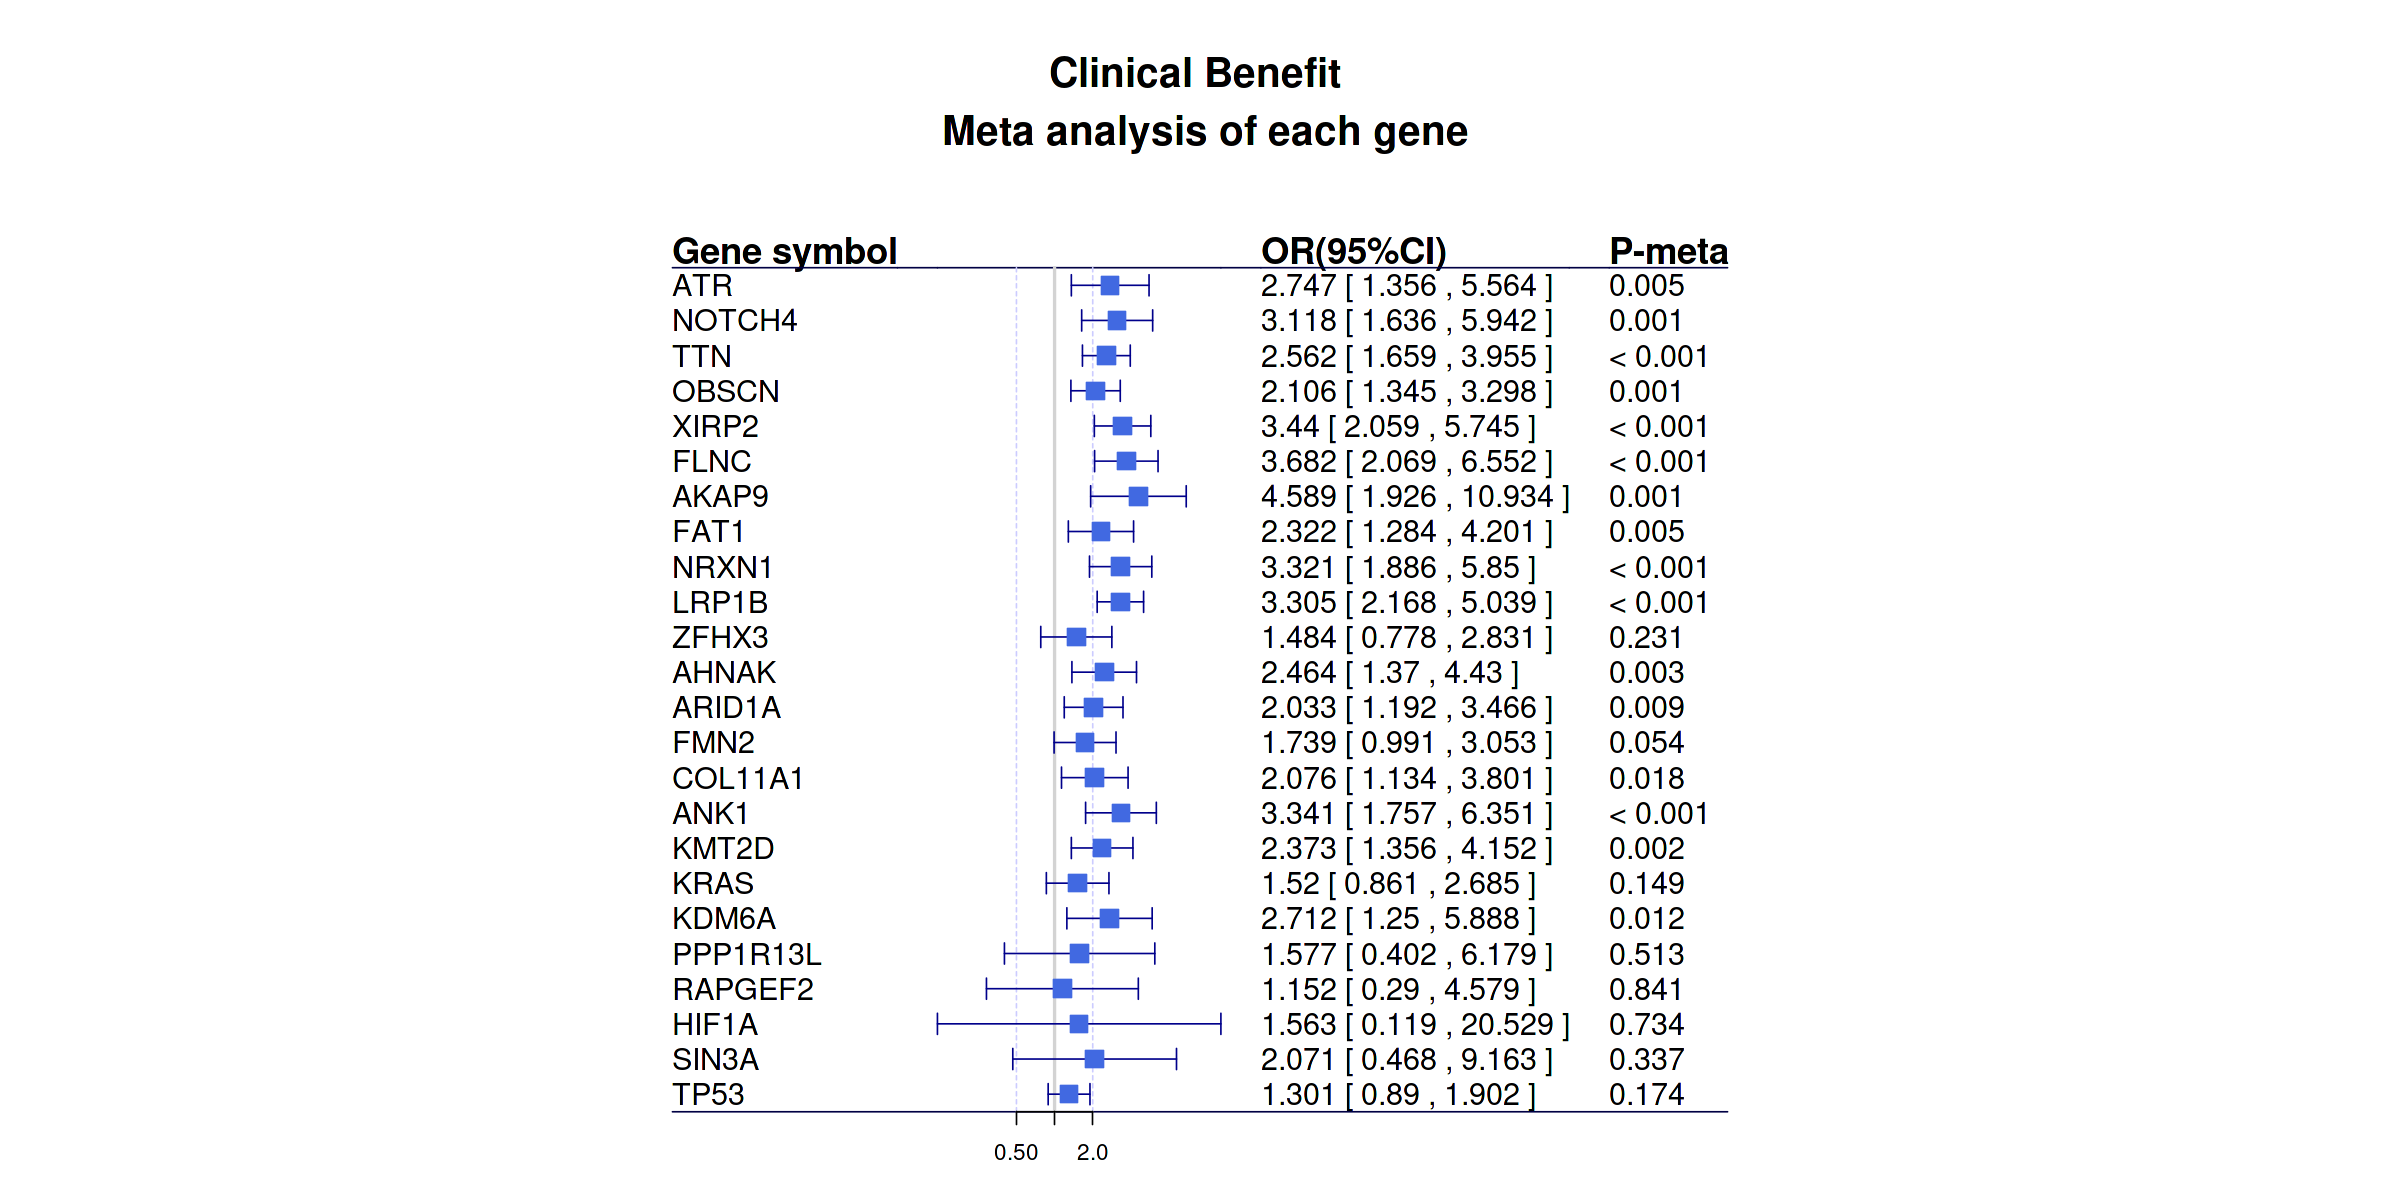

In [83]:
maxup = max(total_cochrane_from_rmeta$upper[!is.infinite(total_cochrane_from_rmeta$upper)],na.rm = T)
minlow = min(total_cochrane_from_rmeta$lower[total_cochrane_from_rmeta$lower != 0],na.rm = T)

    
options(repr.plot.height = 10, repr.plot.width = 20)

tmp_list = list()
tmp_list[["2"]] = gpar(col = "#000044")
tmp_list[[as.character(nrow(total_cochrane_from_rmeta) + 1)]] = gpar(col = "#000044")

p = total_cochrane_from_rmeta %>% 
       forestplot(labeltext = total_tabletext, clip = c(minlow-minlow/10,maxup+maxup/10),xticks = c(0.5,1,2),
                      lty.ci = 1,
                      ci.vertices.height = 0.3,
                     align="l",
                     graphwidth = unit(6,"cm"),
                     lwd.zero = gpar(lwd=2,lty=2),
                     grid = structure(c(0.5, 2), 
                            gp = gpar(lwd = 1,lty = 2, col = "#CCCCFF")),
                     boxsize = 0.5,
                     graph.pos = 2,
#                      zero = 1,
                     title = paste("Clinical Benefit","\n","Meta analysis of each gene"),
                     txt_gp = fpTxtGp(title = gpar(cex = 2),ticks=gpar(cex=1.1),summary=gpar(cex = 1.8),label = gpar(cex = 1.5)),
                     is.summary = c(rep(TRUE, 1), rep(FALSE, nrow(total_cochrane_from_rmeta)-1)),
                     xlog = TRUE, 
                     hrzl_lines = tmp_list,
                     vertices = TRUE,
                     col = fpColors(box = "royalblue",
                                    line = "darkblue",
                                    summary = "royalblue")
                     )
p

In [84]:
pdf(paste("Artical_Figure2/Figure 1/SNVSCORE_single_gene_meta_CB.pdf",sep = ""),width = 10,height = 10)
print(p)
dev.off()

png 
  2